<a href="https://colab.research.google.com/github/FelixHAUD/ecommerce_eda/blob/main/ecommerce_eda_mgmt172.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sourcing the data**

The data is being taken from [Harvard Dataverse](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/YGLYDY).

# **The Imports**

First, the proper imports are needed and laid out. We'll be using pandas, numpy, matplotlib, datetime, and seaborn. These may not be installed, so use pip install to ensure that it is. If you do have it installed, it will note "Requirement already satistifed:".


In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

# Style
import typing as typ

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

pd.core.common.is_list_like = pd.api.types.is_list_like
%matplotlib inline


# **Reading the data**

Depending on how you do this, it may be different. If you are using a normal filesystem and not google colab, just use the file path. Note: you may have to add ./ even if its in the same folder.  

If you are using Google Colab, import the drive and mount the drive and follow and type the path manually. Note: you only have to mount the drive once, hence the separate code section.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
amazon_purchases = pd.read_csv('/content/drive/MyDrive/MGMT 172 Team Folder/Final Project/dataverse_files/amazon-purchases.csv')
fields = pd.read_csv('/content/drive/MyDrive/MGMT 172 Team Folder/Final Project/dataverse_files/fields.csv')
survey = pd.read_csv('/content/drive/MyDrive/MGMT 172 Team Folder/Final Project/dataverse_files/survey.csv')


In [ ]:
# If you wish to view samples of the CSVs...

amazon_purchases.head(20)
fields.head()
# survey.head()

Unnamed: 0                                             fields
0  Survey ResponseID                                        Response ID
1        Q-demos-age                            What is your age group?
2   Q-demos-hispanic    Are you of Spanish, Hispanic, or Latino origin?
3       Q-demos-race  Choose one or more races that you consider you...
4  Q-demos-education  What is the highest level of education you hav...

# **Cleaning and combining data**

Now, depending on what the goal is, we have to combine and clean the CSV files.

In [ ]:
df = amazon_purchases.merge(survey, on="Survey ResponseID", how='left')

# The CSV does not have dates converted to datetime format so we have to clean it here.
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# This is just making it easier to sort the seasons
def sort_by_szn(m):
  if m in [12, 1, 2]:
    return 'Winter'
  elif m in [3, 4, 5]:
    return 'Spring'
  elif m in [6, 7, 8]:
    return 'Summer'
  else:
    return 'Fall'

# Map the season to which month it is
# Future note: Here you could also do this according to date, say like Christmas...
df['Season'] = df['Order Date'].dt.month.map(sort_by_szn)
df.head(20)

Order Date  Purchase Price Per Unit  Quantity Shipping Address State  \
0  2018-12-04                     7.98       1.0                     NJ   
1  2018-12-22                    13.99       1.0                     NJ   
2  2018-12-24                     8.99       1.0                     NJ   
3  2018-12-25                    10.45       1.0                     NJ   
4  2018-12-25                    10.00       1.0                     NJ   
5  2019-02-18                    10.99       1.0                     NJ   
6  2019-02-18                     4.99       1.0                     NJ   
7  2019-03-15                   124.99       1.0                     NJ   
8  2019-04-23                    12.99       1.0                     NJ   
9  2019-04-23                    24.69       1.0                     NJ   
10 2019-05-02                     9.99       1.0                     NJ   
11 2019-05-02                    12.79       1.0                     NJ   
12 2019-05-11                     9.14       1.0                     NJ   
13 2019-05-16                     9.99       1.0                     NJ   
14 2019-06-15                    19.99       1.0                     NJ   
15 2019-06-15                    14.72       1.0                     NJ   
16 2019-06-25                     9.99       1.0                     NJ   
17 2019-07-14                    26.77       1.0                     NJ   
18 2019-08-02                    12.99       1.0                     NJ   
19 2019-08-10                     7.95       1.0                     NJ   

                                                Title  \
0   SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...   
1   Betron BS10 Earphones Wired Headphones in Ear ...   
2                                                 NaN   
3   Perfecto Stainless Steel Shaving Bowl. Durable...   
4                       Proraso Shaving Cream for Men   
5   Micro USB Cable Android Charger - Syncwire [2-...   
6   Amazon Basics USB 2.0 Charger Cable - A-Male t...   
7   Fire HD 8 Tablet (8" HD Display, 32 GB, withou...   
8   Men's Leather Belt, Ratchet Dress Belt with Au...   
9                                                 NaN   
10  UGREEN Tablet Stand Holder Adjustable Portable...   
11  Betron B25 in-Ear Headphones Earphones with Mi...   
12  NEW Norpro Instant Immersion Heater Coffee/Tea...   
13  Betron BS10 Earphones Wired Headphones in Ear ...   
14  SanDisk 128GB Ultra MicroSDXC UHS-I Memory Car...   
15  Slippery Stuff, 16 oz Gel, Clear, Pound , Unsc...   
16  Betron BS10 Earphones Wired Headphones in Ear ...   
17  Logitech M570 Wireless Trackball Mouse – Ergon...   
18  Betron BS10 Earphones Wired in Ear Earbud Head...   
19  TUDIA Motorola Moto G6 Case, Full-Matte Lightw...   

   ASIN/ISBN (Product Code)                          Category  \
0                B0143RTB1E                      FLASH_MEMORY   
1                B01MA1MJ6H                        HEADPHONES   
2                B078JZTFN3                               NaN   
3                B06XWF9HML                     DISHWARE_BOWL   
4                B00837ZOI0                     SHAVING_AGENT   
5                B01GFB2E9M                COMPUTER_PROCESSOR   
6                B00NH13S44                   COMPUTER_ADD_ON   
7                B077H6L7T9                     AMAZON_TABLET   
8                B07L84ZZXC                      APPAREL_BELT   
9                B06XKNWJN2                               NaN   
10               B07CG71KQ1  PORTABLE_ELECTRONIC_DEVICE_STAND   
11               B079GFF4HZ                        HEADPHONES   
12               B01M0Q84BR                  IMMERSION_HEATER   
13               B01MA1MJ6H                        HEADPHONES   
14               B073JYC4XM                      FLASH_MEMORY   
15               B00I7DT454                    BODY_LUBRICANT   
16               B01MA1MJ6H                        HEADPHONES   
17               B0043T7FXE                       INPUT_MOU

# **Overall Topic**

Our team chose to analyze the 2018-2022 seasonal product performance on Amazon by examining trends across their different product categories and consumer demographics. Seasonality plays a significant role in consumer behavior and market trends. Certain products and industries experience increased demand during specific seasons and holidays. Understanding these seasonal patterns can help businesses adjust their strategies.

# **Questions**

Which products exhibit seasonal purchasing patterns?

In [ ]:
# df['Season'].value_counts()
season_cols = ['Fall','Spring','Summer','Winter']
# This is done considering quantity
pivot_quantity = df.pivot_table(
    index=['ASIN/ISBN (Product Code)'],
    columns='Season',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

pivot_quantity['CV_SCORE'] = pivot_quantity.std(axis=1) / pivot_quantity.mean(axis=1)

# Filter out low value products (not enough sales or not sold through enough seasons to cross check)
min_total = 10
min_seasons = 2
mask_quantity = (
    (pivot_quantity.sum(axis=1)      >= min_total) &
    (pivot_quantity[season_cols].gt(0).sum(axis=1) >= min_seasons)
)
pivot_filtered_total = pivot_quantity[mask_quantity].copy()
# CV values of 2.0 indicate that there is a heavy lean towards certain seasons essentially
pivot_filtered_total = pivot_filtered_total.sort_values(by='CV_SCORE', ascending=False)

# Merged the title in as well just so it is easier to know what the product is
# also gets rid of duplicates
pivot_filtered_total = pivot_filtered_total.merge(df[['ASIN/ISBN (Product Code)', 'Title']].drop_duplicates(subset=['ASIN/ISBN (Product Code)']), on='ASIN/ISBN (Product Code)', how='left')
pivot_filtered_total.head(20)

ASIN/ISBN (Product Code)  Fall  Spring  Summer  Winter  CV_SCORE  \
0                B093RV4X4Z   0.0   102.0     0.0     1.0  1.974195   
1                B08CYVLD85   1.0     0.0     0.0    66.0  1.960401   
2                B09F1XPPHH   1.0     0.0     0.0    49.0  1.947032   
3                B07BHKP8C9   0.0    34.0     1.0     0.0  1.924564   
4                B00GHNJ1HC   0.0     1.0     0.0    31.0  1.917572   
5                B01KIG1O8W   0.0     2.0     1.0    91.0  1.915209   
6                B071R3H9WB   1.0     0.0     0.0    30.0  1.914945   
7                B01N5DIRSF  24.0     0.0     0.0     1.0  1.894835   
8                B08YP5MKY4  24.0     0.0     0.0     1.0  1.894835   
9                B07YJFWNBR   0.0     0.0     1.0    24.0  1.894835   
10               B07RWBFTB9   0.0    23.0     1.0     0.0  1.890522   
11               B01MY472LW  22.0     0.0     0.0     1.0  1.885841   
12               B000GUQKGC  21.0     1.0     0.0     0.0  1.880742   
13               B000RGYJ6I   1.0     0.0    20.0     0.0  1.875167   
14               B074MFT2LX   1.0     0.0    20.0     0.0  1.875167   
15               B014KLSBDW   0.0     1.0     0.0    20.0  1.875167   
16               B08CZ2SGBF   1.0     0.0     0.0    19.0  1.869046   
17               B002TTLENM   1.0    19.0     0.0     0.0  1.869046   
18               B071CGD1TX   0.0     0.0    19.0     1.0  1.869046   
19               B086HM49PB  18.0     0.0     1.0     0.0  1.862295   

                                                Title  
0                            Growing Up in a Pandemic  
1                  Amazon eGift Card - Decorated Tree  
2                               Amazon.com eGift Card  
3                               Amazon.com eGift Card  
4   EO Products Hand Sanitizer Spray for Everyone,...  
5   Baby Proofing Cabinet Locks for Babies [12 Pac...  
6   Casio FX 260 Solar II Scientific Calculator 5"...  
7   La Colombe Vanilla Draft Latte - 9 Fluid Ounce...  
8   Kasa Smart Bulb, Dimmable Color Changing Light...  
9                               Amazon.com eGift Card  
10  Joycenie Great Tin Sign Aluminum Metal Sign 19...  
11  Muscle Milk Pro Series Protein Shake, Intense ...  
12  Ademco 945T-WH Miniature Surface Mount with Sc...  
13                                        White Peach  
14  365 Everyday Value, Organic Almondmilk Vanilla...  
15  N-Bone 1 Pouch Ferret Soft Treats Chicken Flav...  
16                              Amazon.com eGift Card  
17                           Pasilla (Poblano) Pepper  
18  Gonex Canvas Duffle Bag for Travel, 50L Duffel...  
19   Roman's Bakehouse Pita Bread Original Mini, 200g

In [ ]:
df = df.assign(
    _revenue = df['Quantity'] * df['Purchase Price Per Unit']
)

# This is done considering revenue
pivot_revenue = pd.pivot_table(
    df,
    index='ASIN/ISBN (Product Code)',
    columns='Season',
    values='_revenue',
    aggfunc='sum',
    fill_value=0
)

pivot_revenue['CV_SCORE'] = pivot_revenue.std(axis=1) / pivot_revenue.mean(axis=1)

# Filter out low value products (not enough sales or not sold through enough seasons to cross check)
min_revenue = 100
min_seasons = 2
mask_revenue = (
    (pivot_revenue.sum(axis=1)      >= min_revenue) &
    (pivot_revenue[season_cols].gt(0).sum(axis=1) >= min_seasons)
)
pivot_revenue_filtered_total = pivot_revenue[mask_revenue].copy()
# CV values of 2.0 indicate that there is a heavy lean towards certain seasons essentially
pivot_revenue_filtered_total = pivot_revenue_filtered_total.sort_values(by='CV_SCORE', ascending=False)

# Merged the title in as well just so it is easier to know what the product is
# also gets rid of duplicates
pivot_revenue_filtered_total = pivot_revenue_filtered_total.merge(df[['ASIN/ISBN (Product Code)', 'Title']].drop_duplicates(subset=['ASIN/ISBN (Product Code)']), on='ASIN/ISBN (Product Code)', how='left')


pivot_revenue_filtered_total.head(20)

ASIN/ISBN (Product Code)    Fall   Spring  Summer   Winter  CV_SCORE  \
0                B0871WS93H  231.99     0.00    0.00     0.13  1.998507   
1                B07YJFWNBR    0.00     0.00    1.00  1346.96  1.998022   
2                B07HHVR8RR    0.00     1.00    0.00   685.00  1.996115   
3                B094Q7RNLV    0.00     1.00  355.00     0.00  1.992516   
4                B09F1S3QVS  138.02     1.00    0.00     0.00  1.980865   
5                B09DCN7KLZ    0.00     1.00    0.00   100.00  1.973686   
6                B0001TJ0WE    0.00     0.00   11.19   962.90  1.969485   
7                B09BQRTGV6    2.00     0.00  120.00     0.00  1.956528   
8                B08CZ2SGBF   10.00     0.00    0.00   585.00  1.955439   
9                B09F1SDFQ3    3.00     0.00    0.00   156.18  1.950066   
10               B09PDZPLL8    0.00   505.00    0.00    10.00  1.948564   
11               B079GQSMMY    0.00     1.99  100.00     0.00  1.948316   
12               B08YP5MKY4  547.89     0.00    0.00    12.65  1.940287   
13               B01KIG1O8W    0.00    35.98    9.49  1822.09  1.935349   
14               B093RV4X4Z    0.00   385.00    0.00    10.00  1.933079   
15               B071R3H9WB    8.47     0.00    0.00   269.70  1.919661   
16               B07MDQHZ7W    0.00   150.00    5.00     0.00  1.914945   
17               B06X6HSVDY    5.00     0.00  147.00     0.00  1.913286   
18               B07BHKP8C9    0.00  1405.11   50.00     0.00  1.909469   
19               B09F1XPPHH   50.00     0.00    0.00  1370.50  1.907292   

                                                Title  
0   WestForce Electric Pressure Washer, 3000 PSI 1...  
1                               Amazon.com eGift Card  
2                               Amazon.com eGift Card  
3                               Amazon.com eGift Card  
4                               Amazon.com eGift Card  
5                               Amazon.com eGift Card  
6   Herbal Conditioner for Normal Hair, with botan...  
7                               Amazon.com eGift Card  
8                               Amazon.com eGift Card  
9                               Amazon.com eGift Card  
10                              Amazon.com eGift Card  
11                  Amazon Gift Card - Rainbow Hearts  
12  Kasa Smart Bulb, Dimmable Color Changing Light...  
13  Baby Proofing Cabinet Locks for Babies [12 Pac...  
14                           Growing Up in a Pandemic  
15  Casio FX 260 Solar II Scientific Calculator 5"...  
16                              Amazon.com eGift Card  
17        Amazon eGift Card - Congratulations Bouquet  
18                              Amazon.com eGift Card  
19                              Amazon.com eGift Card

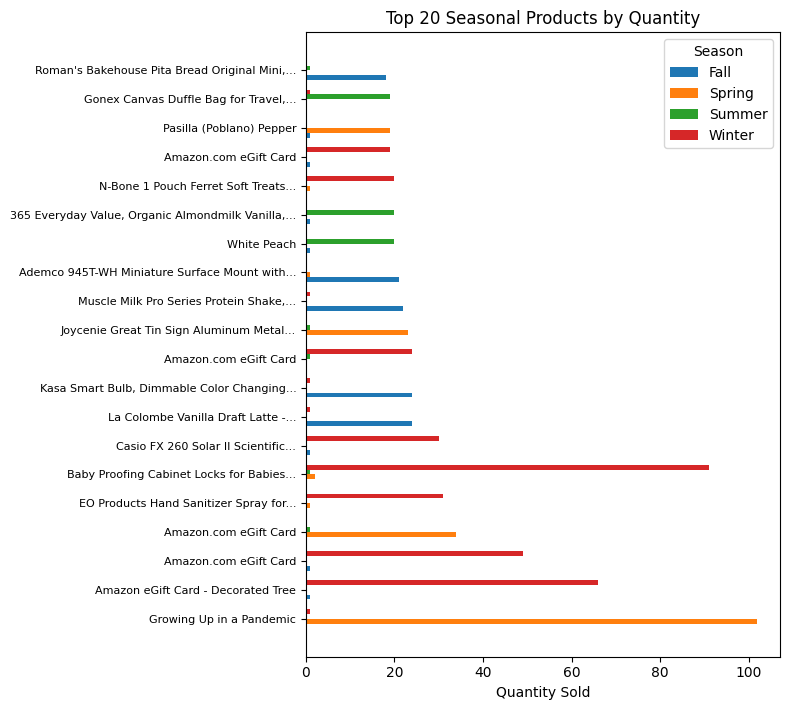

In [ ]:
top_n = 20 # Change this to see as many products as you want

qty_pivot = pivot_filtered_total.copy().head(20)
rev_pivot = pivot_revenue_filtered_total.copy().head(20)

# Shortens the title so that on the charts everything fits nicely
def truncate_title(title, n_words=6):
    words = title.split()
    if len(words) <= n_words:
        return title
    return ' '.join(words[:n_words]) + '...'

titles = qty_pivot['Title'].tolist()
titles = [truncate_title(title) for title in titles] # Calls the function in a list comprehension

n_products = len(qty_pivot)
# Array of evenly spaced values
x = np.arange(n_products) # makes it so that there will be certain amount of columns
height = 0.2

cluster_height = height * 4 # 4 Seasons
gap = 0.4
cluster_pos = np.arange(n_products) * (cluster_height + gap)

# Initialized the actual chart
fig, ax = plt.subplots(figsize=(8, n_products * (cluster_height + gap) * 0.3))
for i, szn in enumerate(season_cols):
    ax.barh(cluster_pos + i * height, qty_pivot[szn], height, label=szn)

tick_positions = cluster_pos + (cluster_height / 2) - (height / 2)
ax.set_yticks(tick_positions)
ax.set_yticklabels(titles, fontsize=8)

ax.set_xlabel('Quantity Sold')
ax.set_title(f'Top {n_products} Seasonal Products by Quantity')
ax.legend(title='Season', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()


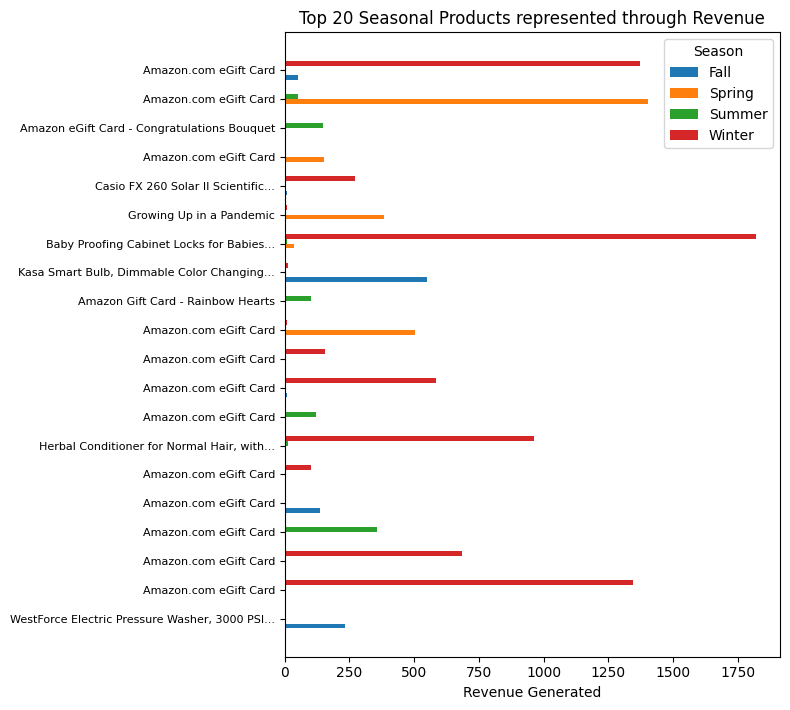

In [ ]:
# Repeating the same activity but by revenue

rev_titles = rev_pivot['Title'].tolist()
rev_titles = [truncate_title(title) for title in rev_titles]

fig, bx = plt.subplots(figsize=(8, n_products * (cluster_height + gap) * 0.3))
for i, szn in enumerate(season_cols):
    bx.barh(cluster_pos + i * height, rev_pivot[szn], height, label=szn)
tick_positions = cluster_pos + (cluster_height / 2) - (height / 2)
bx.set_yticks(tick_positions)
bx.set_yticklabels(rev_titles, fontsize=8)

bx.set_xlabel('Revenue Generated')
bx.set_title(f'Top {n_products} Seasonal Products represented through Revenue')
bx.legend(title='Season', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

# Next on the list:

Now that we've found the products that perform seasonally, let's look at which products are in the:

**Fall
Spring
Summer
Winter**

In [ ]:
# Find the top 5 products doing the best in each season

qty_long = pivot_filtered_total.copy()[['ASIN/ISBN (Product Code)', 'Title'] + season_cols]
qty_long = qty_long.melt(id_vars=['ASIN/ISBN (Product Code)', 'Title'],
              value_vars=season_cols,
              var_name = 'Season',
              value_name='Quantity',
              )
top5_qty = (
    qty_long
      .groupby('Season', group_keys=False)
      .apply(lambda x: x.nlargest(5, 'Quantity'))
      .reset_index(drop=True)
)
top5_qty

<ipython-input-113-93a4026f8d57>:12: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



ASIN/ISBN (Product Code)                                          Title  \
0                B086KKT3RX                                  Amazon Reload   
1                B00IX1I3G6            Amazon.com Gift Card Balance Reload   
2                B079NF2NFW  Photo Prints – Glossy – Standard Size (4x5.3)   
3                B07PCMWTSG                          Amazon.com eGift Card   
4                B0711H8L7V    Photo Prints – Glossy – Standard Size (4x6)   
5                B00IX1I3G6            Amazon.com Gift Card Balance Reload   
6                B086KKT3RX                                  Amazon Reload   
7                B0711H8L7V    Photo Prints – Glossy – Standard Size (4x6)   
8                B07PCMWTSG                          Amazon.com eGift Card   
9                B004LLIKVU                          Amazon.com eGift Card   
10               B00IX1I3G6            Amazon.com Gift Card Balance Reload   
11               B086KKT3RX                                  Amazon Reload   
12               B0711H8L7V    Photo Prints – Glossy – Standard Size (4x6)   
13               B079NF2NFW  Photo Prints – Glossy – Standard Size (4x5.3)   
14               B071DPM9RD                Group Gift Wedding Contribution   
15               B00IX1I3G6            Amazon.com Gift Card Balance Reload   
16               B086KKT3RX                                  Amazon Reload   
17               B0711H8L7V    Photo Prints – Glossy – Standard Size (4x6)   
18               B079NF2NFW  Photo Prints – Glossy – Standard Size (4x5.3)   
19               B004LLIKVU                          Amazon.com eGift Card   

    Season  Quantity  
0     Fall    2287.0  
1     Fall    2094.0  
2     Fall     457.0  
3     Fall     371.0  
4     Fall     330.0  
5   Spring    3062.0  
6   Spring     975.0  
7   Spring     525.0  
8   Spring     416.0  
9   Spring     378.0  
10  Summer    3250.0  
11  Summer    1307.0  
12  Summer     961.0  
13  Summer     596.0  
14  Summer     540.0  
15  Winter    2967.0  
16  Winter    1737.0  
17  Winter     520.0  
18  Winter     460.0  
19  Winter     407.0

In [ ]:
# Same as above, but using revenue as a measurement.

rev_long = pivot_revenue_filtered_total.copy()[['ASIN/ISBN (Product Code)', 'Title'] + season_cols]
rev_long = rev_long.melt(id_vars=['ASIN/ISBN (Product Code)', 'Title'],
              value_vars=season_cols,
              var_name = 'Season',
              value_name='Revenue',
              )
top5_rev = (
    rev_long
      .groupby('Season', group_keys=False)
      .apply(lambda x: x.nlargest(5, 'Revenue'))
      .reset_index(drop=True)
)
top5_rev

<ipython-input-114-1aadef4b31c3>:12: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



ASIN/ISBN (Product Code)  \
0                B00IX1I3G6   
1                B086KKT3RX   
2                B09BZ4VF5R   
3                B07PXGQC1Q   
4                B07PCMWTSG   
5                B00IX1I3G6   
6                B086KKT3RX   
7                B07PCMWTSG   
8                B004LLIKVU   
9                B074T91QTZ   
10               B00IX1I3G6   
11               B086KKT3RX   
12               B07PCMWTSG   
13               B004LLIKVU   
14               B074T91QTZ   
15               B00IX1I3G6   
16               B086KKT3RX   
17               B004LLIKVU   
18               B074T91QTZ   
19               B07PCMWTSG   

                                                Title  Season   Revenue  
0                 Amazon.com Gift Card Balance Reload    Fall  50031.46  
1                                       Amazon Reload    Fall  42639.82  
2                               Amazon.com eGift Card    Fall  17335.00  
3   Apple AirPods (2nd Generation) Wireless Earbud...    Fall  15734.28  
4                               Amazon.com eGift Card    Fall  15524.37  
5                 Amazon.com Gift Card Balance Reload  Spring  64481.06  
6                                       Amazon Reload  Spring  20481.48  
7                               Amazon.com eGift Card  Spring  10568.45  
8                               Amazon.com eGift Card  Spring  10447.26  
9   Google Play gift code - give the gift of games...  Spring   7824.54  
10                Amazon.com Gift Card Balance Reload  Summer  63982.97  
11                                      Amazon Reload  Summer  26096.67  
12                              Amazon.com eGift Card  Summer  19851.79  
13                              Amazon.com eGift Card  Summer  11140.34  
14  Google Play gift code - give the gift of games...  Summer   9974.75  
15                Amazon.com Gift Card Balance Reload  Winter  61016.31  
16                                      Amazon Reload  Winter  39917.71  
17                              Amazon.com eGift Card  Winter  10177.93  
18  Google Play gift code - give the gift of games...  Winter   8460.60  
19                              Amazon.com eGift Card  Winter   8080.89

Create a loop to create all the tables in one ago considering that they are all similar formats!

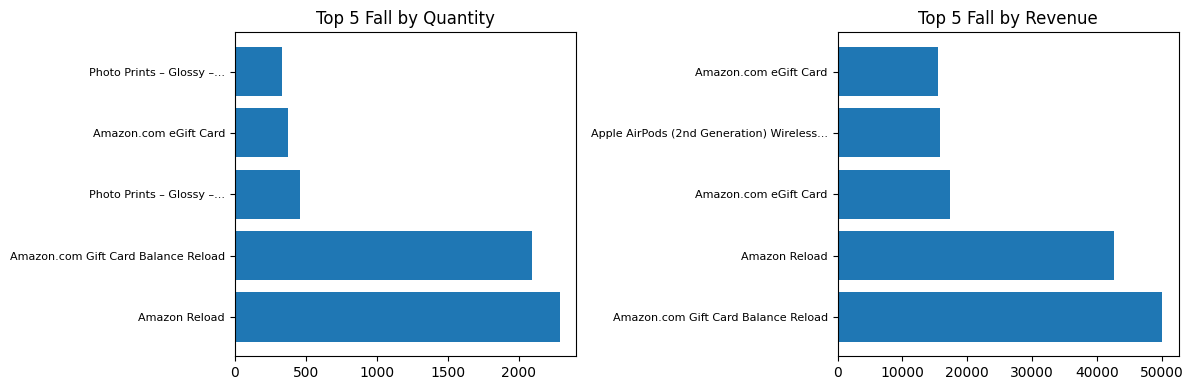

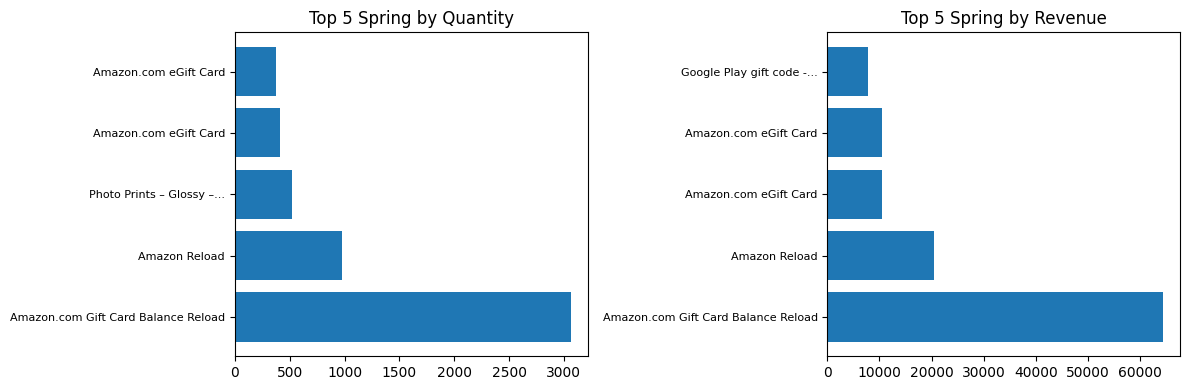

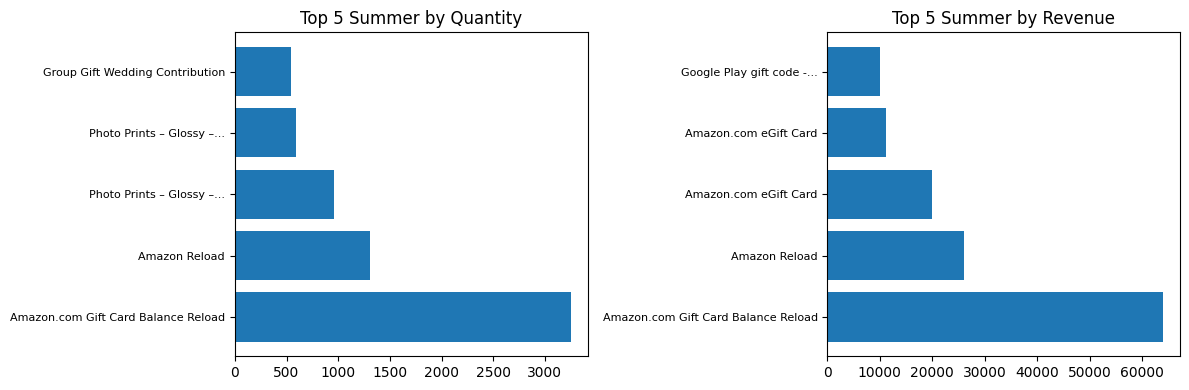

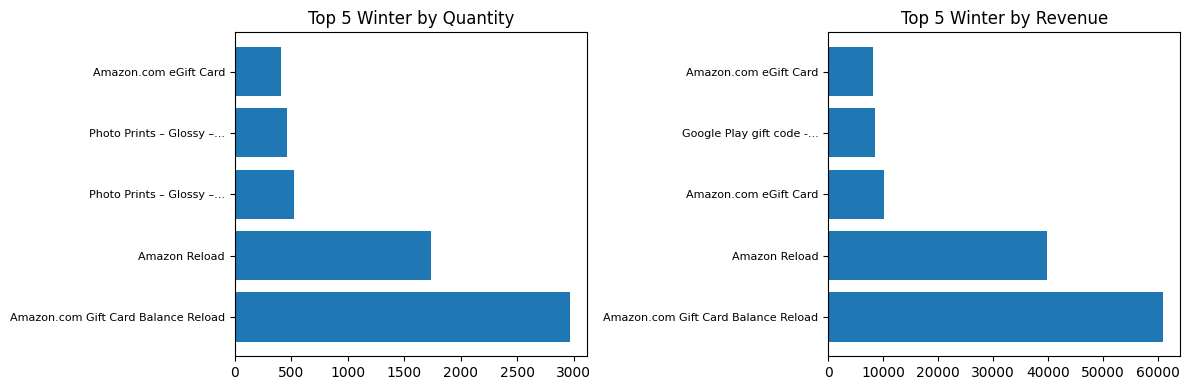

In [ ]:
set_bars = 5 # If you happen to take more products above and they have the same name, you need to adjust this as well
for season in season_cols:
  y = np.arange(set_bars)

  df_qty = top5_qty[top5_qty['Season'] == season].copy()
  df_rev = top5_rev[top5_rev['Season'] == season].copy()

  df_qty['ShortTitle'] = df_qty['Title'].apply(lambda t: truncate_title(t, n_words=5))
  df_rev['ShortTitle'] = df_rev['Title'].apply(lambda t: truncate_title(t, n_words=5))

  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
  ax1.barh(y, df_qty['Quantity'], height=0.8)
  ax1.set_yticks(y)
  ax1.set_yticklabels(df_qty['ShortTitle'], fontsize=8)
  ax1.set_title(f"Top 5 {season} by Quantity")

  ax2.barh(y, df_rev['Revenue'], height=0.8)
  ax2.set_yticks(y)
  ax2.set_yticklabels(df_rev['ShortTitle'], fontsize=8)
  ax2.set_title(f"Top 5 {season} by Revenue")

  fig.tight_layout()
  plt.show()



# Why are these products specifically trending?


---



---


Now we're going to check if across the demographic data that was provided by the harvard dataset. This could provide some insights on why certain products are being pushed so hard.

# First we'll take a look based on age demographics.


In [ ]:
def get_column_label_for_demographic(demographic):
  '''
  Lookup table so that the text can match up with the column title and its easier to create the charts
  '''
  lookup = {
      "Age Group": "Q-demos-age",
      "Income Bracket": "Q-demos-income",
      "Gender": "Q-demos-gender",
      "Sexual Orientation": "Q-sexual-orientation",
      "Education Level": "Q-demos-education",
      "State": "Q-demos-state"
  }
  try:
    return lookup[demographic]
  except KeyError:
    raise ValueError(f"Unknown demographic “{demographic}”")

In [ ]:
df = df.assign(_revenue = df['Quantity'] * df['Purchase Price Per Unit'])
# So that there is a title in the table for readability
title_map = (
    df[['ASIN/ISBN (Product Code)', 'Title']]
      .drop_duplicates(subset='ASIN/ISBN (Product Code)')
      .set_index('ASIN/ISBN (Product Code)')['Title']
)
# season_cols defined as [summer, fall...]
def demographic_breakdown_df(df, title_map, top5_qty, top5_rev, demographic=None) -> typ.Tuple[pd.DataFrame, pd.DataFrame]:
  demographic_column_label = get_column_label_for_demographic(demographic)
  qty_by_season = {}
  rev_by_season = {}
  for season in season_cols:
    print(f"\n---- {season} Demographic Breakdown ----\n")

    top_asins_qty = top5_qty[top5_qty['Season']==season]['ASIN/ISBN (Product Code)']
    top_asins_rev = top5_rev[top5_rev['Season']==season]['ASIN/ISBN (Product Code)']

    df_season_qty = df[(df['Season']==season) & df['ASIN/ISBN (Product Code)'].isin(top_asins_qty)]

    df_season_rev = df[(df['Season']==season) & df['ASIN/ISBN (Product Code)'].isin(top_asins_rev)]
    d_qty = (
          df_season_qty
          .groupby(['ASIN/ISBN (Product Code)', demographic_column_label])['Quantity']
          .sum()
          .unstack(fill_value=0)
      )
    d_qty['Title'] = d_qty.index.map(title_map)
    d_rev = (
          df_season_rev
          .groupby(['ASIN/ISBN (Product Code)', demographic_column_label])['_revenue']
          .sum()
          .unstack(fill_value=0)
      )
    d_rev['Title'] = d_rev.index.map(title_map)

    print(f"Quantity by {demographic}:")
    display(d_qty)
    print(f"Revenue by {demographic}:")
    display(d_rev)
    qty_by_season[season] = d_qty
    rev_by_season[season] = d_rev

  return qty_by_season, rev_by_season

age_qty, age_rev = demographic_breakdown_df(df, title_map, top5_qty, top5_rev, demographic="Age Group")




---- Fall Demographic Breakdown ----

Quantity by Age Group:


Q-demos-age               18 - 24 years  25 - 34 years  35 - 44 years  \
ASIN/ISBN (Product Code)                                                
B00IX1I3G6                        108.0          912.0          670.0   
B0711H8L7V                          0.0          106.0          219.0   
B079NF2NFW                          0.0          100.0          353.0   
B07PCMWTSG                         18.0          117.0          163.0   
B086KKT3RX                        145.0          914.0          716.0   

Q-demos-age               45 - 54 years  55 - 64 years  65 and older  \
ASIN/ISBN (Product Code)                                               
B00IX1I3G6                        234.0          111.0          59.0   
B0711H8L7V                          5.0            0.0           0.0   
B079NF2NFW                          0.0            4.0           0.0   
B07PCMWTSG                         38.0           19.0          16.0   
B086KKT3RX                        305.0          165.0          42.0   

Q-demos-age                                                       Title  
ASIN/ISBN (Product Code)                                                 
B00IX1I3G6                          Amazon.com Gift Card Balance Reload  
B0711H8L7V                  Photo Prints – Glossy – Standard Size (4x6)  
B079NF2NFW                Photo Prints – Glossy – Standard Size (4x5.3)  
B07PCMWTSG                                        Amazon.com eGift Card  
B086KKT3RX                                                Amazon Reload

Revenue by Age Group:


Q-demos-age               18 - 24 years  25 - 34 years  35 - 44 years  \
ASIN/ISBN (Product Code)                                                
B00IX1I3G6                      2949.20       15061.28       16982.58   
B07PCMWTSG                       488.34        3141.81        8453.11   
B07PXGQC1Q                      2640.85        5337.78        4166.83   
B086KKT3RX                      2506.45       13900.26       15661.99   
B09BZ4VF5R                        28.00         155.00       16907.00   

Q-demos-age               45 - 54 years  55 - 64 years  65 and older  \
ASIN/ISBN (Product Code)                                               
B00IX1I3G6                      7860.44        5006.99       2170.97   
B07PCMWTSG                      1608.80        1041.82        790.49   
B07PXGQC1Q                      2539.89         939.93        109.00   
B086KKT3RX                      5249.59        3485.77       1835.76   
B09BZ4VF5R                       245.00           0.00          0.00   

Q-demos-age                                                           Title  
ASIN/ISBN (Product Code)                                                     
B00IX1I3G6                              Amazon.com Gift Card Balance Reload  
B07PCMWTSG                                            Amazon.com eGift Card  
B07PXGQC1Q                Apple AirPods (2nd Generation) Wireless Earbud...  
B086KKT3RX                                                    Amazon Reload  
B09BZ4VF5R                                            Amazon.com eGift Card


---- Spring Demographic Breakdown ----

Quantity by Age Group:


Q-demos-age               18 - 24 years  25 - 34 years  35 - 44 years  \
ASIN/ISBN (Product Code)                                                
B004LLIKVU                          9.0           74.0          167.0   
B00IX1I3G6                        149.0         1251.0         1020.0   
B0711H8L7V                         37.0          383.0           13.0   
B07PCMWTSG                         39.0          123.0          108.0   
B086KKT3RX                         34.0          358.0          333.0   

Q-demos-age               45 - 54 years  55 - 64 years  65 and older  \
ASIN/ISBN (Product Code)                                               
B004LLIKVU                         45.0           73.0          10.0   
B00IX1I3G6                        414.0          163.0          65.0   
B0711H8L7V                         92.0            0.0           0.0   
B07PCMWTSG                        111.0           23.0          12.0   
B086KKT3RX                        147.0           71.0          32.0   

Q-demos-age                                                     Title  
ASIN/ISBN (Product Code)                                               
B004LLIKVU                                      Amazon.com eGift Card  
B00IX1I3G6                        Amazon.com Gift Card Balance Reload  
B0711H8L7V                Photo Prints – Glossy – Standard Size (4x6)  
B07PCMWTSG                                      Amazon.com eGift Card  
B086KKT3RX                                              Amazon Reload

Revenue by Age Group:


Q-demos-age               18 - 24 years  25 - 34 years  35 - 44 years  \
ASIN/ISBN (Product Code)                                                
B004LLIKVU                       499.73        2135.13        3371.94   
B00IX1I3G6                      4426.84       17660.70       21970.83   
B074T91QTZ                       307.00        2488.66        4818.88   
B07PCMWTSG                       973.51        3707.83        2566.54   
B086KKT3RX                      1116.57        6931.78        6272.51   

Q-demos-age               45 - 54 years  55 - 64 years  65 and older  \
ASIN/ISBN (Product Code)                                               
B004LLIKVU                      2396.02        1743.59        300.85   
B00IX1I3G6                     11035.24        7552.94       1834.51   
B074T91QTZ                        30.00         155.00         25.00   
B07PCMWTSG                      2158.28         874.29        288.00   
B086KKT3RX                      3483.23        1291.36       1386.03   

Q-demos-age                                                           Title  
ASIN/ISBN (Product Code)                                                     
B004LLIKVU                                            Amazon.com eGift Card  
B00IX1I3G6                              Amazon.com Gift Card Balance Reload  
B074T91QTZ                Google Play gift code - give the gift of games...  
B07PCMWTSG                                            Amazon.com eGift Card  
B086KKT3RX                                                    Amazon Reload


---- Summer Demographic Breakdown ----

Quantity by Age Group:


Q-demos-age               18 - 24 years  25 - 34 years  35 - 44 years  \
ASIN/ISBN (Product Code)                                                
B00IX1I3G6                        187.0         1624.0          854.0   
B0711H8L7V                          9.0          360.0          486.0   
B071DPM9RD                         11.0          476.0           50.0   
B079NF2NFW                          1.0          305.0          102.0   
B086KKT3RX                         85.0          532.0          431.0   

Q-demos-age               45 - 54 years  55 - 64 years  65 and older  \
ASIN/ISBN (Product Code)                                               
B00IX1I3G6                        350.0          166.0          69.0   
B0711H8L7V                        102.0            4.0           0.0   
B071DPM9RD                          3.0            0.0           0.0   
B079NF2NFW                        188.0            0.0           0.0   
B086KKT3RX                        153.0           83.0          23.0   

Q-demos-age                                                       Title  
ASIN/ISBN (Product Code)                                                 
B00IX1I3G6                          Amazon.com Gift Card Balance Reload  
B0711H8L7V                  Photo Prints – Glossy – Standard Size (4x6)  
B071DPM9RD                              Group Gift Wedding Contribution  
B079NF2NFW                Photo Prints – Glossy – Standard Size (4x5.3)  
B086KKT3RX                                                Amazon Reload

Revenue by Age Group:


Q-demos-age               18 - 24 years  25 - 34 years  35 - 44 years  \
ASIN/ISBN (Product Code)                                                
B004LLIKVU                       709.98        3619.84        4385.75   
B00IX1I3G6                      3685.43       21376.53       19923.52   
B074T91QTZ                       458.21        2609.54        6700.00   
B07PCMWTSG                      1328.57        7721.28        6242.44   
B086KKT3RX                      1907.98        8248.38        8609.58   

Q-demos-age               45 - 54 years  55 - 64 years  65 and older  \
ASIN/ISBN (Product Code)                                               
B004LLIKVU                      1161.79        1045.55        217.43   
B00IX1I3G6                     10056.84        6701.64       2239.01   
B074T91QTZ                       107.00          75.00         25.00   
B07PCMWTSG                      1669.89        2574.61        315.00   
B086KKT3RX                      3548.19        2338.19       1444.35   

Q-demos-age                                                           Title  
ASIN/ISBN (Product Code)                                                     
B004LLIKVU                                            Amazon.com eGift Card  
B00IX1I3G6                              Amazon.com Gift Card Balance Reload  
B074T91QTZ                Google Play gift code - give the gift of games...  
B07PCMWTSG                                            Amazon.com eGift Card  
B086KKT3RX                                                    Amazon Reload


---- Winter Demographic Breakdown ----

Quantity by Age Group:


Q-demos-age               18 - 24 years  25 - 34 years  35 - 44 years  \
ASIN/ISBN (Product Code)                                                
B004LLIKVU                         19.0           97.0          166.0   
B00IX1I3G6                        139.0         1312.0          957.0   
B0711H8L7V                          0.0          151.0          198.0   
B079NF2NFW                          0.0           88.0          168.0   
B086KKT3RX                        112.0          676.0          546.0   

Q-demos-age               45 - 54 years  55 - 64 years  65 and older  \
ASIN/ISBN (Product Code)                                               
B004LLIKVU                         49.0           72.0           4.0   
B00IX1I3G6                        339.0          134.0          86.0   
B0711H8L7V                        171.0            0.0           0.0   
B079NF2NFW                        204.0            0.0           0.0   
B086KKT3RX                        275.0           76.0          52.0   

Q-demos-age                                                       Title  
ASIN/ISBN (Product Code)                                                 
B004LLIKVU                                        Amazon.com eGift Card  
B00IX1I3G6                          Amazon.com Gift Card Balance Reload  
B0711H8L7V                  Photo Prints – Glossy – Standard Size (4x6)  
B079NF2NFW                Photo Prints – Glossy – Standard Size (4x5.3)  
B086KKT3RX                                                Amazon Reload

Revenue by Age Group:


Q-demos-age               18 - 24 years  25 - 34 years  35 - 44 years  \
ASIN/ISBN (Product Code)                                                
B004LLIKVU                       330.94        3380.78        3309.52   
B00IX1I3G6                      3181.88       20535.51       19626.33   
B074T91QTZ                       581.42        2804.18        4635.00   
B07PCMWTSG                       533.51        2614.02        2766.34   
B086KKT3RX                      2566.10       12939.41       14272.61   

Q-demos-age               45 - 54 years  55 - 64 years  65 and older  \
ASIN/ISBN (Product Code)                                               
B004LLIKVU                      1214.16        1782.63        159.90   
B00IX1I3G6                      9109.16        5609.03       2954.40   
B074T91QTZ                       265.00         150.00         25.00   
B07PCMWTSG                      1324.07         626.33        216.62   
B086KKT3RX                      5529.45        2371.05       2239.09   

Q-demos-age                                                           Title  
ASIN/ISBN (Product Code)                                                     
B004LLIKVU                                            Amazon.com eGift Card  
B00IX1I3G6                              Amazon.com Gift Card Balance Reload  
B074T91QTZ                Google Play gift code - give the gift of games...  
B07PCMWTSG                                            Amazon.com eGift Card  
B086KKT3RX                                                    Amazon Reload

In [ ]:
def plot_by_group(age_rev_df, figsize=(10, None), bar_width=0.8, value_type=None, demographic=None) -> typ.Tuple[plt.figure, plt.axes]:
  age_rev_reset = age_rev_df.reset_index()
  age_rev_reset['ShortTitle'] = age_rev_reset['Title'].apply(lambda t: truncate_title(t, n_words=5))
  plot_df = age_rev_reset.set_index('ShortTitle')

  age_groups = [col for col in plot_df.columns if col not in ['ASIN/ISBN (Product Code)']]
  plot_df = plot_df[age_groups]

  fig, ax = plt.subplots(figsize=(10, len(plot_df)*0.4 + 1))
  plot_df.plot(kind='barh', ax=ax, width=0.8)

  xlabel = f"{value_type}" + (" ($)" if value_type == 'Revenue' else "")
  ax.set_xlabel(xlabel)
  ax.set_ylabel('Product Title')
  ax.set_title(f'{value_type} by {demographic} for Top Season Products')
  ax.legend(
    title=demographic,
    bbox_to_anchor=(1.0, 1.0, 0.2, 0.3),
    loc='upper left',
    bbox_transform=ax.transAxes,
    borderaxespad=0.5,
    frameon=True
  )
  return fig, ax


<ipython-input-119-2c89fbfc650e>:12: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



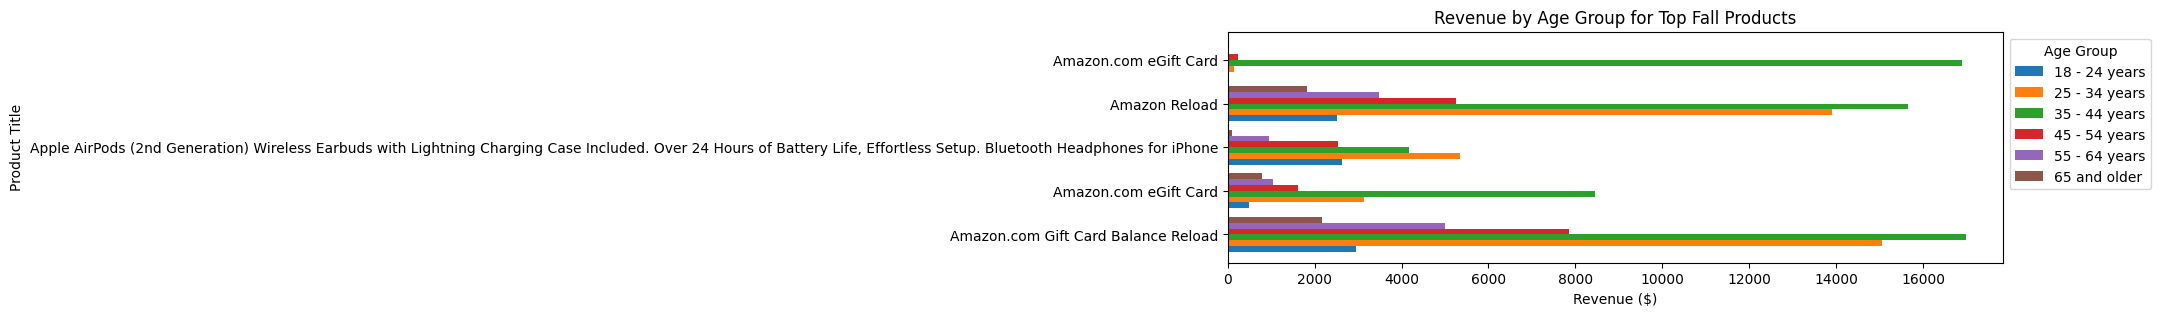

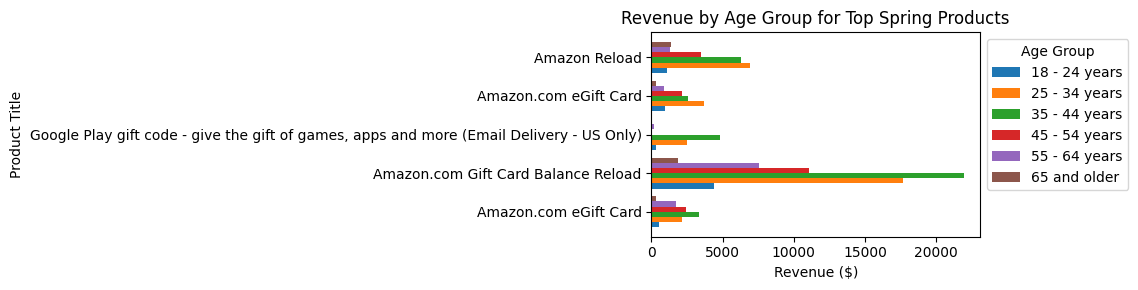

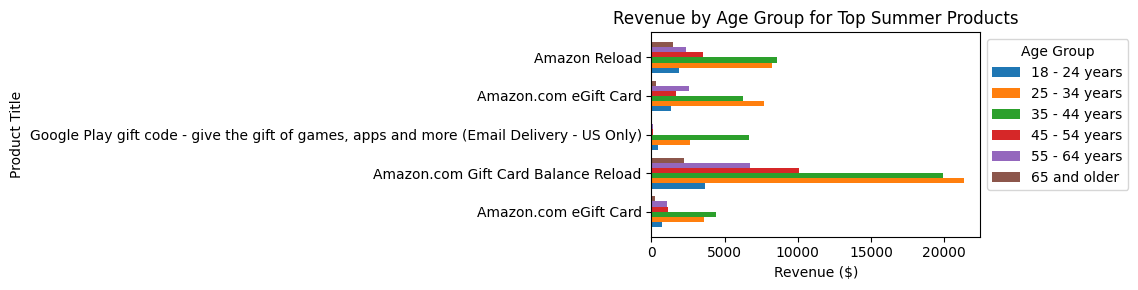

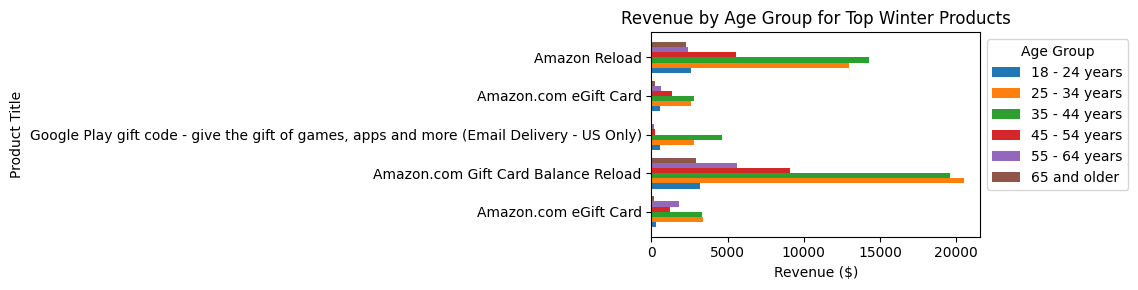

In [ ]:
# Age | Revenue | Chart

for season, age_rev_df in age_rev.items():
    # create the figure/axes
    fig, ax = plot_by_group(
        age_rev_df,
        value_type="Revenue",
        demographic="Age Group"
    )
    # override the title to include the season
    ax.set_title(f"Revenue by Age Group for Top {season} Products")
    plt.tight_layout()
    plt.show()

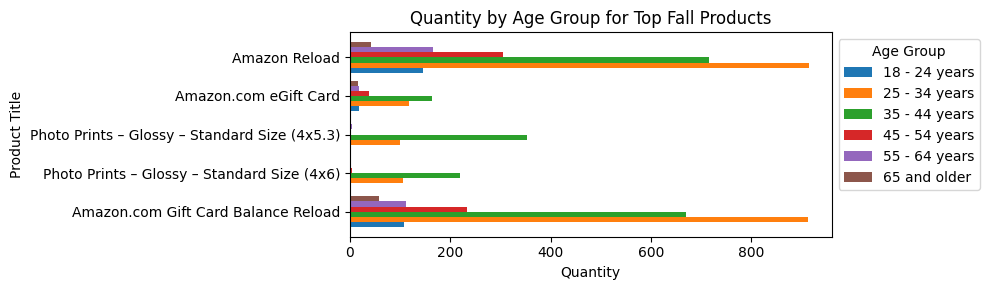

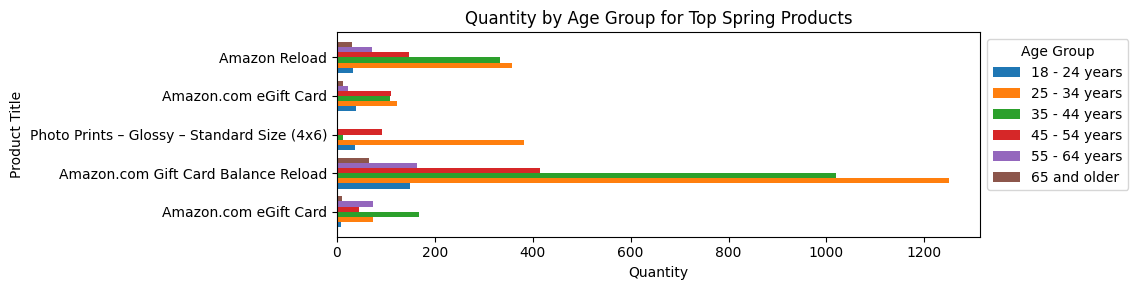

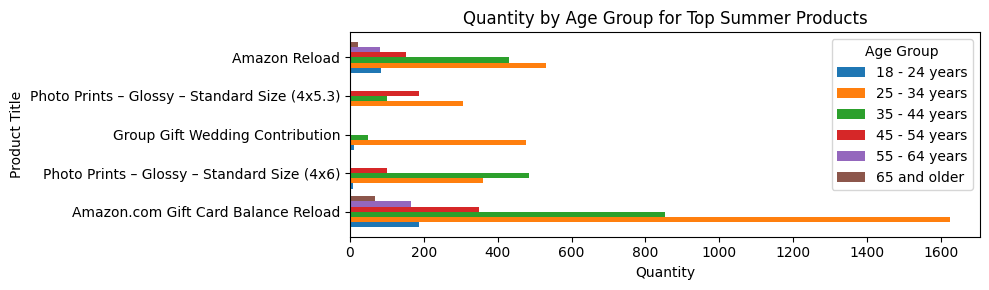

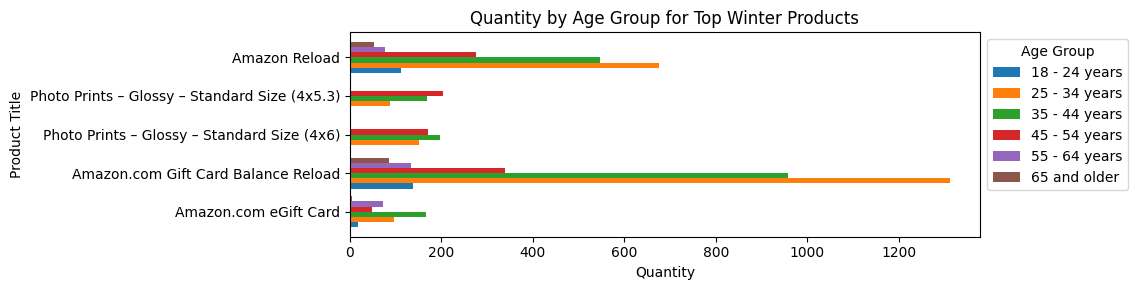

In [ ]:
# Age | Quantity | Chart

for season, age_qty_df in age_qty.items():
    # create the figure/axes
    fig, ax = plot_by_group(
        age_qty_df,
        value_type="Quantity",
        demographic="Age Group"
    )
    # override the title to include the season
    ax.set_title(f"Quantity by Age Group for Top {season} Products")
    plt.tight_layout()
    plt.show()

# Income Charts

In [ ]:
inc_qty, inc_rev = demographic_breakdown_df(df, title_map, top5_qty, top5_rev, demographic="Income Bracket")


---- Fall Demographic Breakdown ----

Quantity by Income Bracket:


Q-demos-income            $100,000 - $149,999  $150,000 or more  \
ASIN/ISBN (Product Code)                                          
B00IX1I3G6                              318.0             383.0   
B0711H8L7V                              211.0               0.0   
B079NF2NFW                               11.0               0.0   
B07PCMWTSG                               51.0             125.0   
B086KKT3RX                              374.0             585.0   

Q-demos-income            $25,000 - $49,999  $50,000 - $74,999  \
ASIN/ISBN (Product Code)                                         
B00IX1I3G6                            365.0              409.0   
B0711H8L7V                             11.0                0.0   
B079NF2NFW                             23.0              127.0   
B07PCMWTSG                             58.0               55.0   
B086KKT3RX                            321.0              305.0   

Q-demos-income            $75,000 - $99,999  Less than $25,000  \
ASIN/ISBN (Product Code)                                         
B00IX1I3G6                            249.0              225.0   
B0711H8L7V                            108.0                0.0   
B079NF2NFW                            296.0                0.0   
B07PCMWTSG                             29.0               46.0   
B086KKT3RX                            399.0              238.0   

Q-demos-income            Prefer not to say  \
ASIN/ISBN (Product Code)                      
B00IX1I3G6                            145.0   
B0711H8L7V                              0.0   
B079NF2NFW                              0.0   
B07PCMWTSG                              7.0   
B086KKT3RX                             65.0   

Q-demos-income                                                    Title  
ASIN/ISBN (Product Code)                                                 
B00IX1I3G6                          Amazon.com Gift Card Balance Reload  
B0711H8L7V                  Photo Prints – Glossy – Standard Size (4x6)  
B079NF2NFW                Photo Prints – Glossy – Standard Size (4x5.3)  
B07PCMWTSG                                        Amazon.com eGift Card  
B086KKT3RX                                                Amazon Reload

Revenue by Income Bracket:


Q-demos-income            $100,000 - $149,999  $150,000 or more  \
ASIN/ISBN (Product Code)                                          
B00IX1I3G6                           11697.98           5049.83   
B07PCMWTSG                            2142.81           7734.58   
B07PXGQC1Q                            5539.77           2905.88   
B086KKT3RX                            8561.44           6229.74   
B09BZ4VF5R                             250.00          16855.00   

Q-demos-income            $25,000 - $49,999  $50,000 - $74,999  \
ASIN/ISBN (Product Code)                                         
B00IX1I3G6                          7927.61           10879.32   
B07PCMWTSG                          1672.27            1968.00   
B07PXGQC1Q                          2008.94            2195.91   
B086KKT3RX                          8281.50            8086.45   
B09BZ4VF5R                             5.00             105.00   

Q-demos-income            $75,000 - $99,999  Less than $25,000  \
ASIN/ISBN (Product Code)                                         
B00IX1I3G6                          8652.12            4519.16   
B07PCMWTSG                          1395.92             490.79   
B07PXGQC1Q                          2244.79             838.99   
B086KKT3RX                          7623.17            3603.85   
B09BZ4VF5R                           120.00               0.00   

Q-demos-income            Prefer not to say  \
ASIN/ISBN (Product Code)                      
B00IX1I3G6                          1305.44   
B07PCMWTSG                           120.00   
B07PXGQC1Q                             0.00   
B086KKT3RX                           253.67   
B09BZ4VF5R                             0.00   

Q-demos-income                                                        Title  
ASIN/ISBN (Product Code)                                                     
B00IX1I3G6                              Amazon.com Gift Card Balance Reload  
B07PCMWTSG                                            Amazon.com eGift Card  
B07PXGQC1Q                Apple AirPods (2nd Generation) Wireless Earbud...  
B086KKT3RX                                                    Amazon Reload  
B09BZ4VF5R                                            Amazon.com eGift Card


---- Spring Demographic Breakdown ----

Quantity by Income Bracket:


Q-demos-income            $100,000 - $149,999  $150,000 or more  \
ASIN/ISBN (Product Code)                                          
B004LLIKVU                              105.0              19.0   
B00IX1I3G6                              389.0             660.0   
B0711H8L7V                              466.0              10.0   
B07PCMWTSG                               85.0             109.0   
B086KKT3RX                              170.0             261.0   

Q-demos-income            $25,000 - $49,999  $50,000 - $74,999  \
ASIN/ISBN (Product Code)                                         
B004LLIKVU                             58.0               49.0   
B00IX1I3G6                            482.0              525.0   
B0711H8L7V                              2.0                3.0   
B07PCMWTSG                             56.0               74.0   
B086KKT3RX                            145.0              146.0   

Q-demos-income            $75,000 - $99,999  Less than $25,000  \
ASIN/ISBN (Product Code)                                         
B004LLIKVU                             83.0               62.0   
B00IX1I3G6                            331.0              414.0   
B0711H8L7V                             29.0                0.0   
B07PCMWTSG                             49.0               40.0   
B086KKT3RX                            102.0              112.0   

Q-demos-income            Prefer not to say  \
ASIN/ISBN (Product Code)                      
B004LLIKVU                              2.0   
B00IX1I3G6                            261.0   
B0711H8L7V                             15.0   
B07PCMWTSG                              3.0   
B086KKT3RX                             39.0   

Q-demos-income                                                  Title  
ASIN/ISBN (Product Code)                                               
B004LLIKVU                                      Amazon.com eGift Card  
B00IX1I3G6                        Amazon.com Gift Card Balance Reload  
B0711H8L7V                Photo Prints – Glossy – Standard Size (4x6)  
B07PCMWTSG                                      Amazon.com eGift Card  
B086KKT3RX                                              Amazon Reload

Revenue by Income Bracket:


Q-demos-income            $100,000 - $149,999  $150,000 or more  \
ASIN/ISBN (Product Code)                                          
B004LLIKVU                            2345.30           1070.57   
B00IX1I3G6                            7755.00           6967.63   
B074T91QTZ                            2163.00            927.66   
B07PCMWTSG                            1830.02           1865.70   
B086KKT3RX                            5131.86           2073.37   

Q-demos-income            $25,000 - $49,999  $50,000 - $74,999  \
ASIN/ISBN (Product Code)                                         
B004LLIKVU                          1788.84            1195.53   
B00IX1I3G6                         11737.89           12242.22   
B074T91QTZ                          2312.00             762.80   
B07PCMWTSG                          2410.01            1812.99   
B086KKT3RX                          4320.09            3772.23   

Q-demos-income            $75,000 - $99,999  Less than $25,000  \
ASIN/ISBN (Product Code)                                         
B004LLIKVU                          2925.48            1118.50   
B00IX1I3G6                         12860.45           12675.98   
B074T91QTZ                            25.00            1634.08   
B07PCMWTSG                          1856.34             731.10   
B086KKT3RX                          2498.02            2424.41   

Q-demos-income            Prefer not to say  \
ASIN/ISBN (Product Code)                      
B004LLIKVU                             3.04   
B00IX1I3G6                           241.89   
B074T91QTZ                             0.00   
B07PCMWTSG                            62.29   
B086KKT3RX                           261.50   

Q-demos-income                                                        Title  
ASIN/ISBN (Product Code)                                                     
B004LLIKVU                                            Amazon.com eGift Card  
B00IX1I3G6                              Amazon.com Gift Card Balance Reload  
B074T91QTZ                Google Play gift code - give the gift of games...  
B07PCMWTSG                                            Amazon.com eGift Card  
B086KKT3RX                                                    Amazon Reload


---- Summer Demographic Breakdown ----

Quantity by Income Bracket:


Q-demos-income            $100,000 - $149,999  $150,000 or more  \
ASIN/ISBN (Product Code)                                          
B00IX1I3G6                              427.0             610.0   
B0711H8L7V                              296.0              93.0   
B071DPM9RD                               35.0               0.0   
B079NF2NFW                              345.0             114.0   
B086KKT3RX                              192.0             312.0   

Q-demos-income            $25,000 - $49,999  $50,000 - $74,999  \
ASIN/ISBN (Product Code)                                         
B00IX1I3G6                            448.0              517.0   
B0711H8L7V                            158.0              156.0   
B071DPM9RD                            288.0               17.0   
B079NF2NFW                              3.0              127.0   
B086KKT3RX                            190.0              185.0   

Q-demos-income            $75,000 - $99,999  Less than $25,000  \
ASIN/ISBN (Product Code)                                         
B00IX1I3G6                            583.0              270.0   
B0711H8L7V                            232.0               26.0   
B071DPM9RD                            197.0                3.0   
B079NF2NFW                              7.0                0.0   
B086KKT3RX                            272.0              101.0   

Q-demos-income            Prefer not to say  \
ASIN/ISBN (Product Code)                      
B00IX1I3G6                            395.0   
B0711H8L7V                              0.0   
B071DPM9RD                              0.0   
B079NF2NFW                              0.0   
B086KKT3RX                             55.0   

Q-demos-income                                                    Title  
ASIN/ISBN (Product Code)                                                 
B00IX1I3G6                          Amazon.com Gift Card Balance Reload  
B0711H8L7V                  Photo Prints – Glossy – Standard Size (4x6)  
B071DPM9RD                              Group Gift Wedding Contribution  
B079NF2NFW                Photo Prints – Glossy – Standard Size (4x5.3)  
B086KKT3RX                                                Amazon Reload

Revenue by Income Bracket:


Q-demos-income            $100,000 - $149,999  $150,000 or more  \
ASIN/ISBN (Product Code)                                          
B004LLIKVU                            2840.78           2049.77   
B00IX1I3G6                           10104.02           9467.83   
B074T91QTZ                            2226.00           1182.54   
B07PCMWTSG                            4280.75           3729.20   
B086KKT3RX                            6210.06           2966.34   

Q-demos-income            $25,000 - $49,999  $50,000 - $74,999  \
ASIN/ISBN (Product Code)                                         
B004LLIKVU                          1841.33            1840.70   
B00IX1I3G6                         13154.38           12239.43   
B074T91QTZ                          2126.21            1616.00   
B07PCMWTSG                          2733.34            2727.93   
B086KKT3RX                          5518.55            4543.36   

Q-demos-income            $75,000 - $99,999  Less than $25,000  \
ASIN/ISBN (Product Code)                                         
B004LLIKVU                          1882.48             685.28   
B00IX1I3G6                         13416.43            5105.30   
B074T91QTZ                           125.00            2674.00   
B07PCMWTSG                          5135.00            1050.57   
B086KKT3RX                          5143.24            1613.79   

Q-demos-income            Prefer not to say  \
ASIN/ISBN (Product Code)                      
B004LLIKVU                             0.00   
B00IX1I3G6                           495.58   
B074T91QTZ                            25.00   
B07PCMWTSG                           195.00   
B086KKT3RX                           101.33   

Q-demos-income                                                        Title  
ASIN/ISBN (Product Code)                                                     
B004LLIKVU                                            Amazon.com eGift Card  
B00IX1I3G6                              Amazon.com Gift Card Balance Reload  
B074T91QTZ                Google Play gift code - give the gift of games...  
B07PCMWTSG                                            Amazon.com eGift Card  
B086KKT3RX                                                    Amazon Reload


---- Winter Demographic Breakdown ----

Quantity by Income Bracket:


Q-demos-income            $100,000 - $149,999  $150,000 or more  \
ASIN/ISBN (Product Code)                                          
B004LLIKVU                              122.0              56.0   
B00IX1I3G6                              410.0             638.0   
B0711H8L7V                              143.0             143.0   
B079NF2NFW                               85.0               0.0   
B086KKT3RX                              303.0             343.0   

Q-demos-income            $25,000 - $49,999  $50,000 - $74,999  \
ASIN/ISBN (Product Code)                                         
B004LLIKVU                             43.0               52.0   
B00IX1I3G6                            454.0              556.0   
B0711H8L7V                             47.0              118.0   
B079NF2NFW                             43.0              330.0   
B086KKT3RX                            340.0              306.0   

Q-demos-income            $75,000 - $99,999  Less than $25,000  \
ASIN/ISBN (Product Code)                                         
B004LLIKVU                             57.0               77.0   
B00IX1I3G6                            331.0              345.0   
B0711H8L7V                             61.0                8.0   
B079NF2NFW                              2.0                0.0   
B086KKT3RX                            199.0              193.0   

Q-demos-income            Prefer not to say  \
ASIN/ISBN (Product Code)                      
B004LLIKVU                              0.0   
B00IX1I3G6                            233.0   
B0711H8L7V                              0.0   
B079NF2NFW                              0.0   
B086KKT3RX                             53.0   

Q-demos-income                                                    Title  
ASIN/ISBN (Product Code)                                                 
B004LLIKVU                                        Amazon.com eGift Card  
B00IX1I3G6                          Amazon.com Gift Card Balance Reload  
B0711H8L7V                  Photo Prints – Glossy – Standard Size (4x6)  
B079NF2NFW                Photo Prints – Glossy – Standard Size (4x5.3)  
B086KKT3RX                                                Amazon Reload

Revenue by Income Bracket:


Q-demos-income            $100,000 - $149,999  $150,000 or more  \
ASIN/ISBN (Product Code)                                          
B004LLIKVU                            2569.48           2558.90   
B00IX1I3G6                           10038.87          10195.38   
B074T91QTZ                            3230.00           1200.03   
B07PCMWTSG                            1240.81           1712.88   
B086KKT3RX                           10067.94           4723.35   

Q-demos-income            $25,000 - $49,999  $50,000 - $74,999  \
ASIN/ISBN (Product Code)                                         
B004LLIKVU                          1032.86            1700.37   
B00IX1I3G6                         11629.27           11818.45   
B074T91QTZ                          1348.99            1210.48   
B07PCMWTSG                          1800.15            1333.28   
B086KKT3RX                          8504.12            8760.39   

Q-demos-income            $75,000 - $99,999  Less than $25,000  \
ASIN/ISBN (Product Code)                                         
B004LLIKVU                          1303.10            1013.22   
B00IX1I3G6                          9746.99            6700.50   
B074T91QTZ                           376.15            1094.95   
B07PCMWTSG                          1341.11             615.37   
B086KKT3RX                          4664.94            2950.13   

Q-demos-income            Prefer not to say  \
ASIN/ISBN (Product Code)                      
B004LLIKVU                             0.00   
B00IX1I3G6                           886.85   
B074T91QTZ                             0.00   
B07PCMWTSG                            37.29   
B086KKT3RX                           246.84   

Q-demos-income                                                        Title  
ASIN/ISBN (Product Code)                                                     
B004LLIKVU                                            Amazon.com eGift Card  
B00IX1I3G6                              Amazon.com Gift Card Balance Reload  
B074T91QTZ                Google Play gift code - give the gift of games...  
B07PCMWTSG                                            Amazon.com eGift Card  
B086KKT3RX                                                    Amazon Reload

<ipython-input-122-0af6d9b4f2d7>:12: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



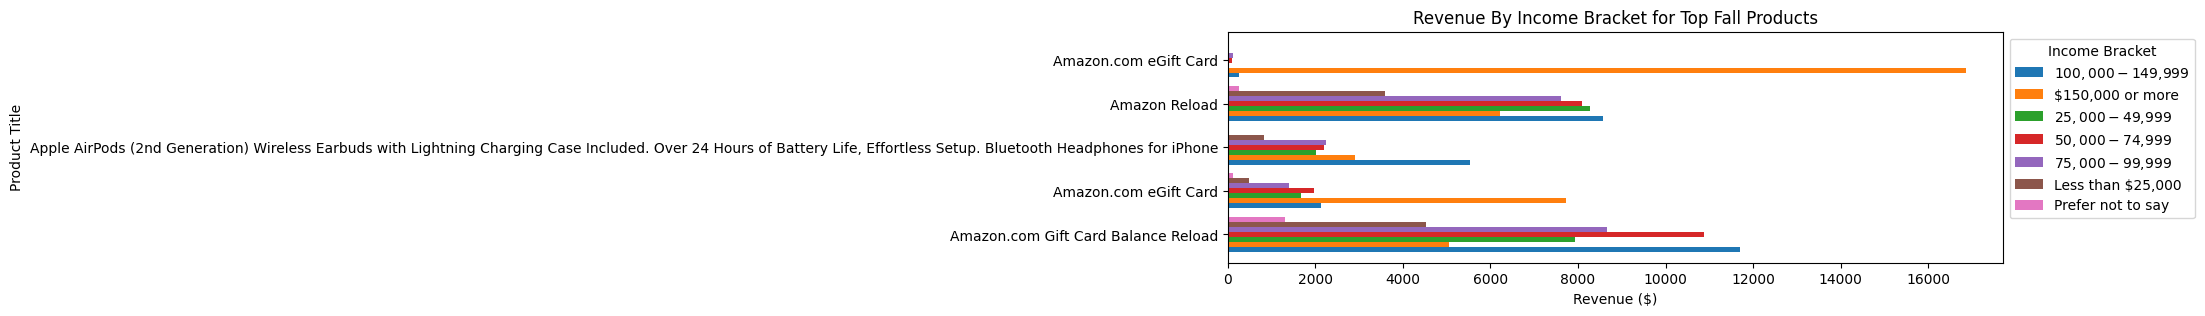

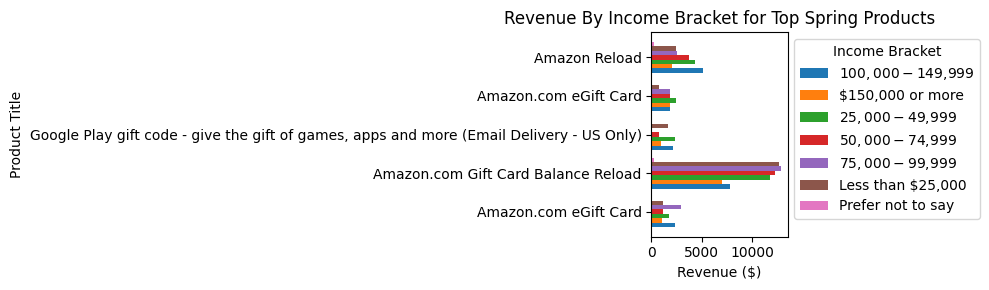

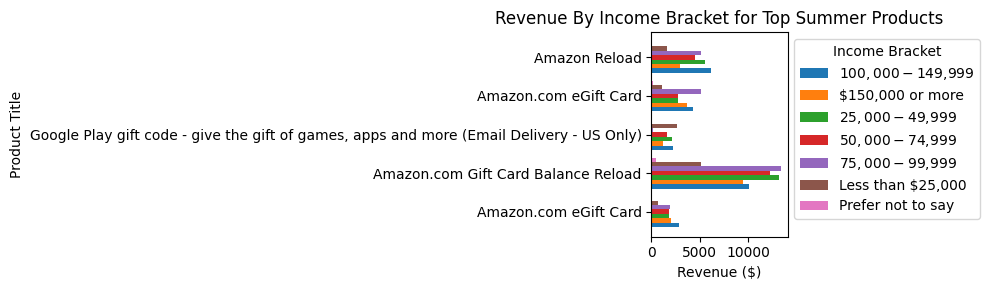

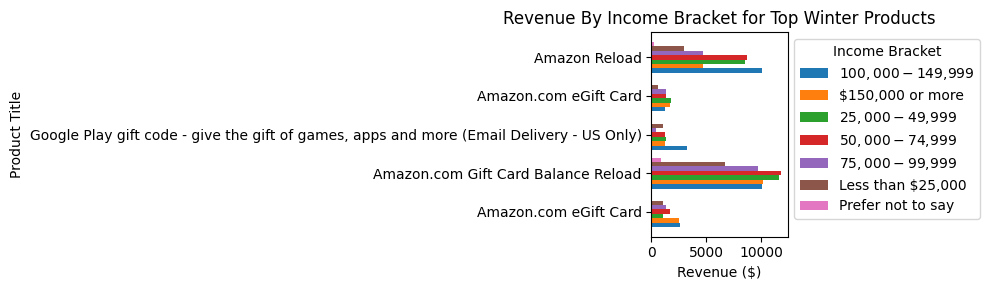

In [ ]:
# Income | Revenue | Chart

for season, inc_rev_df in inc_rev.items():
    # create the figure/axes
    fig, ax = plot_by_group(
        inc_rev_df,
        value_type="Revenue",
        demographic="Income Bracket"
    )
    # override the title to include the season
    ax.set_title(f"Revenue By Income Bracket for Top {season} Products")
    plt.tight_layout()
    plt.show()

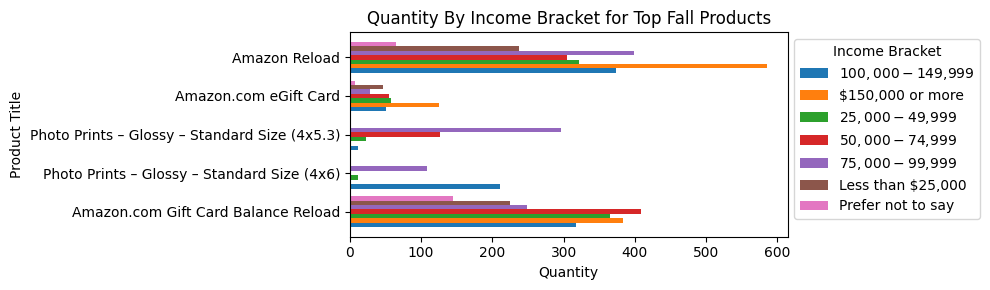

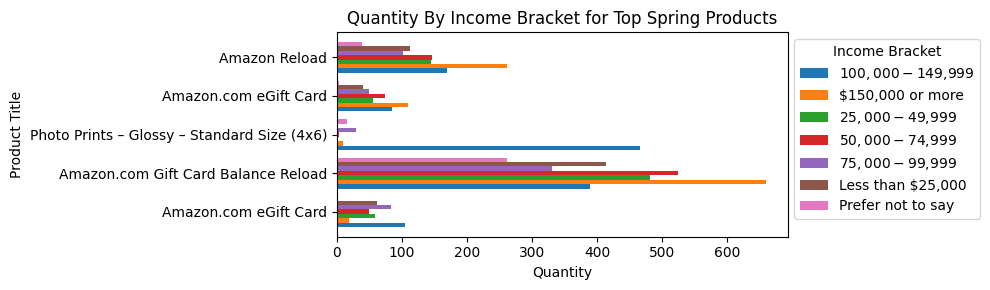

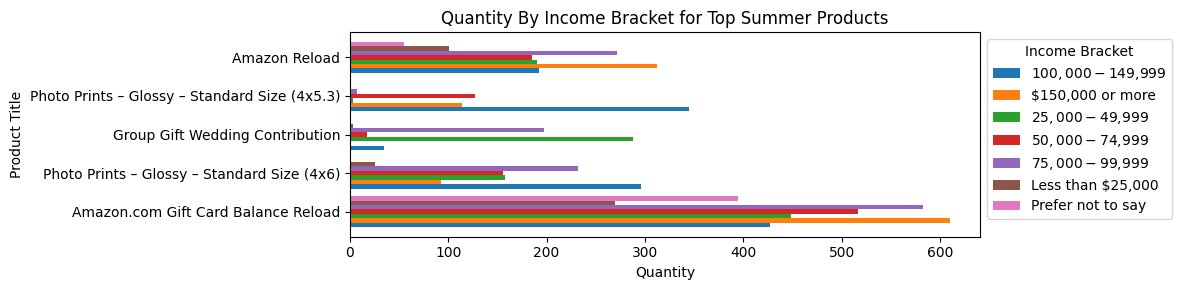

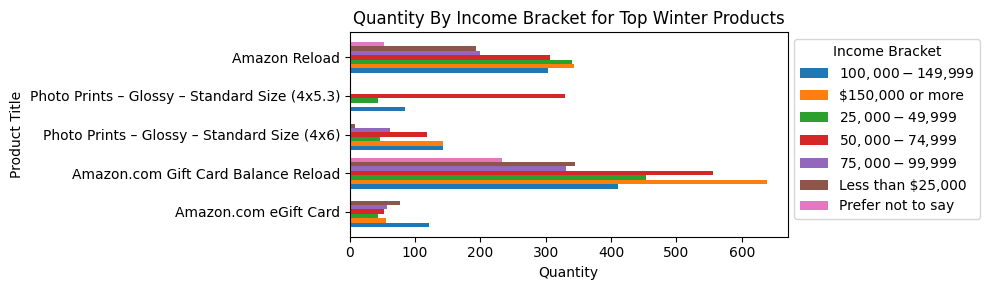

In [ ]:
# Income | Quantity | Chart

for season, inc_qty_df in inc_qty.items():
    # create the figure/axes
    fig, ax = plot_by_group(
        inc_qty_df,
        value_type="Quantity",
        demographic="Income Bracket"
    )
    # override the title to include the season
    ax.set_title(f"Quantity By Income Bracket for Top {season} Products")
    plt.tight_layout()
    plt.show()

# Education Charts



In [ ]:
edu_qty, edu_rev = demographic_breakdown_df(df, title_map, top5_qty, top5_rev, demographic="Education Level")


---- Fall Demographic Breakdown ----

Quantity by Education Level:


Q-demos-education         Bachelor's degree  \
ASIN/ISBN (Product Code)                      
B00IX1I3G6                            959.0   
B0711H8L7V                            263.0   
B079NF2NFW                            311.0   
B07PCMWTSG                            129.0   
B086KKT3RX                           1100.0   

Q-demos-education         Graduate or professional degree (MA, MS, MBA, PhD, JD, MD, DDS, etc)  \
ASIN/ISBN (Product Code)                                                                         
B00IX1I3G6                                                            386.0                      
B0711H8L7V                                                             67.0                      
B079NF2NFW                                                            134.0                      
B07PCMWTSG                                                             46.0                      
B086KKT3RX                                                            538.0                      

Q-demos-education         High school diploma or GED  Prefer not to say  \
ASIN/ISBN (Product Code)                                                  
B00IX1I3G6                                     661.0               13.0   
B0711H8L7V                                       0.0                0.0   
B079NF2NFW                                      12.0                0.0   
B07PCMWTSG                                     194.0                2.0   
B086KKT3RX                                     595.0               12.0   

Q-demos-education         Some high school or less  \
ASIN/ISBN (Product Code)                             
B00IX1I3G6                                    75.0   
B0711H8L7V                                     0.0   
B079NF2NFW                                     0.0   
B07PCMWTSG                                     0.0   
B086KKT3RX                                    42.0   

Q-demos-education                                                 Title  
ASIN/ISBN (Product Code)                                                 
B00IX1I3G6                          Amazon.com Gift Card Balance Reload  
B0711H8L7V                  Photo Prints – Glossy – Standard Size (4x6)  
B079NF2NFW                Photo Prints – Glossy – Standard Size (4x5.3)  
B07PCMWTSG                                        Amazon.com eGift Card  
B086KKT3RX                                                Amazon Reload

Revenue by Education Level:


Q-demos-education         Bachelor's degree  \
ASIN/ISBN (Product Code)                      
B00IX1I3G6                         24509.81   
B07PCMWTSG                          5713.50   
B07PXGQC1Q                          8886.56   
B086KKT3RX                         21905.58   
B09BZ4VF5R                           250.00   

Q-demos-education         Graduate or professional degree (MA, MS, MBA, PhD, JD, MD, DDS, etc)  \
ASIN/ISBN (Product Code)                                                                         
B00IX1I3G6                                                          9227.38                      
B07PCMWTSG                                                          1742.12                      
B07PXGQC1Q                                                          3885.81                      
B086KKT3RX                                                          7570.08                      
B09BZ4VF5R                                                            32.00                      

Q-demos-education         High school diploma or GED  Prefer not to say  \
ASIN/ISBN (Product Code)                                                  
B00IX1I3G6                                  15147.75             494.31   
B07PCMWTSG                                   7943.75             125.00   
B07PXGQC1Q                                   2862.91              99.00   
B086KKT3RX                                  11844.65             947.00   
B09BZ4VF5R                                  17053.00               0.00   

Q-demos-education         Some high school or less  \
ASIN/ISBN (Product Code)                             
B00IX1I3G6                                  652.21   
B07PCMWTSG                                    0.00   
B07PXGQC1Q                                    0.00   
B086KKT3RX                                  372.51   
B09BZ4VF5R                                    0.00   

Q-demos-education                                                     Title  
ASIN/ISBN (Product Code)                                                     
B00IX1I3G6                              Amazon.com Gift Card Balance Reload  
B07PCMWTSG                                            Amazon.com eGift Card  
B07PXGQC1Q                Apple AirPods (2nd Generation) Wireless Earbud...  
B086KKT3RX                                                    Amazon Reload  
B09BZ4VF5R                                            Amazon.com eGift Card


---- Spring Demographic Breakdown ----

Quantity by Education Level:


Q-demos-education         Bachelor's degree  \
ASIN/ISBN (Product Code)                      
B004LLIKVU                            117.0   
B00IX1I3G6                           1527.0   
B0711H8L7V                            433.0   
B07PCMWTSG                            214.0   
B086KKT3RX                            420.0   

Q-demos-education         Graduate or professional degree (MA, MS, MBA, PhD, JD, MD, DDS, etc)  \
ASIN/ISBN (Product Code)                                                                         
B004LLIKVU                                                            120.0                      
B00IX1I3G6                                                            591.0                      
B0711H8L7V                                                              4.0                      
B07PCMWTSG                                                             69.0                      
B086KKT3RX                                                            263.0                      

Q-demos-education         High school diploma or GED  Prefer not to say  \
ASIN/ISBN (Product Code)                                                  
B004LLIKVU                                     140.0                0.0   
B00IX1I3G6                                     875.0               18.0   
B0711H8L7V                                      88.0                0.0   
B07PCMWTSG                                     129.0                4.0   
B086KKT3RX                                     276.0                2.0   

Q-demos-education         Some high school or less  \
ASIN/ISBN (Product Code)                             
B004LLIKVU                                     1.0   
B00IX1I3G6                                    51.0   
B0711H8L7V                                     0.0   
B07PCMWTSG                                     0.0   
B086KKT3RX                                    14.0   

Q-demos-education                                               Title  
ASIN/ISBN (Product Code)                                               
B004LLIKVU                                      Amazon.com eGift Card  
B00IX1I3G6                        Amazon.com Gift Card Balance Reload  
B0711H8L7V                Photo Prints – Glossy – Standard Size (4x6)  
B07PCMWTSG                                      Amazon.com eGift Card  
B086KKT3RX                                              Amazon Reload

Revenue by Education Level:


Q-demos-education         Bachelor's degree  \
ASIN/ISBN (Product Code)                      
B004LLIKVU                          3788.19   
B00IX1I3G6                         29202.23   
B074T91QTZ                          1239.00   
B07PCMWTSG                          3851.62   
B086KKT3RX                         10217.18   

Q-demos-education         Graduate or professional degree (MA, MS, MBA, PhD, JD, MD, DDS, etc)  \
ASIN/ISBN (Product Code)                                                                         
B004LLIKVU                                                          3365.67                      
B00IX1I3G6                                                          8399.33                      
B074T91QTZ                                                           427.80                      
B07PCMWTSG                                                          2818.80                      
B086KKT3RX                                                          5102.24                      

Q-demos-education         High school diploma or GED  Prefer not to say  \
ASIN/ISBN (Product Code)                                                  
B004LLIKVU                                   3292.40               0.00   
B00IX1I3G6                                  25334.95             302.94   
B074T91QTZ                                   5985.08             172.66   
B07PCMWTSG                                   3736.12             161.91   
B086KKT3RX                                   4955.89              50.00   

Q-demos-education         Some high school or less  \
ASIN/ISBN (Product Code)                             
B004LLIKVU                                    1.00   
B00IX1I3G6                                 1241.61   
B074T91QTZ                                    0.00   
B07PCMWTSG                                    0.00   
B086KKT3RX                                  156.17   

Q-demos-education                                                     Title  
ASIN/ISBN (Product Code)                                                     
B004LLIKVU                                            Amazon.com eGift Card  
B00IX1I3G6                              Amazon.com Gift Card Balance Reload  
B074T91QTZ                Google Play gift code - give the gift of games...  
B07PCMWTSG                                            Amazon.com eGift Card  
B086KKT3RX                                                    Amazon Reload


---- Summer Demographic Breakdown ----

Quantity by Education Level:


Q-demos-education         Bachelor's degree  \
ASIN/ISBN (Product Code)                      
B00IX1I3G6                           1771.0   
B0711H8L7V                            602.0   
B071DPM9RD                             52.0   
B079NF2NFW                            278.0   
B086KKT3RX                            658.0   

Q-demos-education         Graduate or professional degree (MA, MS, MBA, PhD, JD, MD, DDS, etc)  \
ASIN/ISBN (Product Code)                                                                         
B00IX1I3G6                                                            603.0                      
B0711H8L7V                                                            171.0                      
B071DPM9RD                                                            145.0                      
B079NF2NFW                                                            244.0                      
B086KKT3RX                                                            317.0                      

Q-demos-education         High school diploma or GED  Prefer not to say  \
ASIN/ISBN (Product Code)                                                  
B00IX1I3G6                                     831.0                8.0   
B0711H8L7V                                     188.0                0.0   
B071DPM9RD                                     331.0               12.0   
B079NF2NFW                                      74.0                0.0   
B086KKT3RX                                     319.0                2.0   

Q-demos-education         Some high school or less  \
ASIN/ISBN (Product Code)                             
B00IX1I3G6                                    37.0   
B0711H8L7V                                     0.0   
B071DPM9RD                                     0.0   
B079NF2NFW                                     0.0   
B086KKT3RX                                    11.0   

Q-demos-education                                                 Title  
ASIN/ISBN (Product Code)                                                 
B00IX1I3G6                          Amazon.com Gift Card Balance Reload  
B0711H8L7V                  Photo Prints – Glossy – Standard Size (4x6)  
B071DPM9RD                              Group Gift Wedding Contribution  
B079NF2NFW                Photo Prints – Glossy – Standard Size (4x5.3)  
B086KKT3RX                                                Amazon Reload

Revenue by Education Level:


Q-demos-education         Bachelor's degree  \
ASIN/ISBN (Product Code)                      
B004LLIKVU                          4680.13   
B00IX1I3G6                         32252.58   
B074T91QTZ                          1726.00   
B07PCMWTSG                          8865.21   
B086KKT3RX                         15220.55   

Q-demos-education         Graduate or professional degree (MA, MS, MBA, PhD, JD, MD, DDS, etc)  \
ASIN/ISBN (Product Code)                                                                         
B004LLIKVU                                                          3345.03                      
B00IX1I3G6                                                         11722.00                      
B074T91QTZ                                                          1558.00                      
B07PCMWTSG                                                          4827.76                      
B086KKT3RX                                                          4321.68                      

Q-demos-education         High school diploma or GED  Prefer not to say  \
ASIN/ISBN (Product Code)                                                  
B004LLIKVU                                   3109.18               6.00   
B00IX1I3G6                                  19683.52              89.03   
B074T91QTZ                                   6190.21             475.54   
B07PCMWTSG                                   6033.82             100.00   
B086KKT3RX                                   6461.58              11.04   

Q-demos-education         Some high school or less  \
ASIN/ISBN (Product Code)                             
B004LLIKVU                                    0.00   
B00IX1I3G6                                  235.84   
B074T91QTZ                                   25.00   
B07PCMWTSG                                   25.00   
B086KKT3RX                                   81.82   

Q-demos-education                                                     Title  
ASIN/ISBN (Product Code)                                                     
B004LLIKVU                                            Amazon.com eGift Card  
B00IX1I3G6                              Amazon.com Gift Card Balance Reload  
B074T91QTZ                Google Play gift code - give the gift of games...  
B07PCMWTSG                                            Amazon.com eGift Card  
B086KKT3RX                                                    Amazon Reload


---- Winter Demographic Breakdown ----

Quantity by Education Level:


Q-demos-education         Bachelor's degree  \
ASIN/ISBN (Product Code)                      
B004LLIKVU                            128.0   
B00IX1I3G6                           1398.0   
B0711H8L7V                            132.0   
B079NF2NFW                              7.0   
B086KKT3RX                            788.0   

Q-demos-education         Graduate or professional degree (MA, MS, MBA, PhD, JD, MD, DDS, etc)  \
ASIN/ISBN (Product Code)                                                                         
B004LLIKVU                                                            128.0                      
B00IX1I3G6                                                            578.0                      
B0711H8L7V                                                            328.0                      
B079NF2NFW                                                            210.0                      
B086KKT3RX                                                            366.0                      

Q-demos-education         High school diploma or GED  Prefer not to say  \
ASIN/ISBN (Product Code)                                                  
B004LLIKVU                                     148.0                3.0   
B00IX1I3G6                                     917.0               12.0   
B0711H8L7V                                      60.0                0.0   
B079NF2NFW                                     243.0                0.0   
B086KKT3RX                                     555.0                3.0   

Q-demos-education         Some high school or less  \
ASIN/ISBN (Product Code)                             
B004LLIKVU                                     0.0   
B00IX1I3G6                                    62.0   
B0711H8L7V                                     0.0   
B079NF2NFW                                     0.0   
B086KKT3RX                                    25.0   

Q-demos-education                                                 Title  
ASIN/ISBN (Product Code)                                                 
B004LLIKVU                                        Amazon.com eGift Card  
B00IX1I3G6                          Amazon.com Gift Card Balance Reload  
B0711H8L7V                  Photo Prints – Glossy – Standard Size (4x6)  
B079NF2NFW                Photo Prints – Glossy – Standard Size (4x5.3)  
B086KKT3RX                                                Amazon Reload

Revenue by Education Level:


Q-demos-education         Bachelor's degree  \
ASIN/ISBN (Product Code)                      
B004LLIKVU                          4152.31   
B00IX1I3G6                         28109.50   
B074T91QTZ                          2278.00   
B07PCMWTSG                          3376.54   
B086KKT3RX                         22342.66   

Q-demos-education         Graduate or professional degree (MA, MS, MBA, PhD, JD, MD, DDS, etc)  \
ASIN/ISBN (Product Code)                                                                         
B004LLIKVU                                                          3492.82                      
B00IX1I3G6                                                         11387.96                      
B074T91QTZ                                                           640.00                      
B07PCMWTSG                                                          2317.23                      
B086KKT3RX                                                          5380.80                      

Q-demos-education         High school diploma or GED  Prefer not to say  \
ASIN/ISBN (Product Code)                                                  
B004LLIKVU                                   2468.68              64.12   
B00IX1I3G6                                  20577.90             141.67   
B074T91QTZ                                   5087.57             455.03   
B07PCMWTSG                                   2262.12              75.00   
B086KKT3RX                                  11834.66              51.04   

Q-demos-education         Some high school or less  \
ASIN/ISBN (Product Code)                             
B004LLIKVU                                    0.00   
B00IX1I3G6                                  799.28   
B074T91QTZ                                    0.00   
B07PCMWTSG                                   50.00   
B086KKT3RX                                  308.55   

Q-demos-education                                                     Title  
ASIN/ISBN (Product Code)                                                     
B004LLIKVU                                            Amazon.com eGift Card  
B00IX1I3G6                              Amazon.com Gift Card Balance Reload  
B074T91QTZ                Google Play gift code - give the gift of games...  
B07PCMWTSG                                            Amazon.com eGift Card  
B086KKT3RX                                                    Amazon Reload

<ipython-input-125-3d87254bc977>:12: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



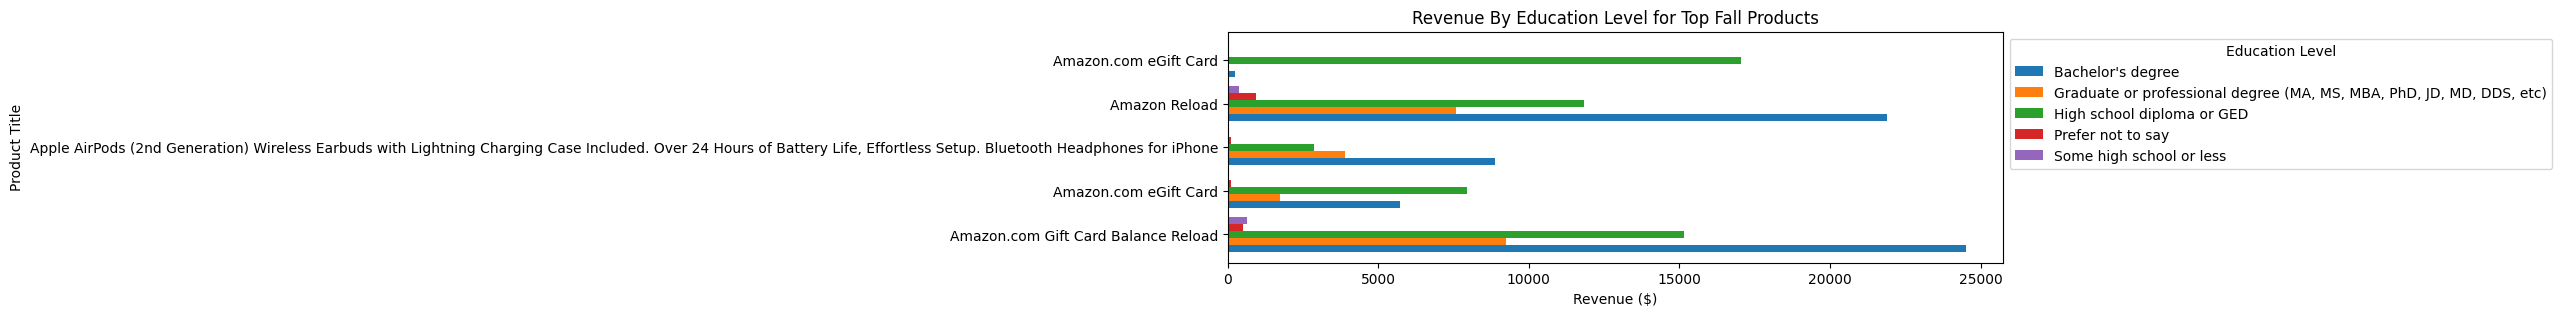

<ipython-input-125-3d87254bc977>:12: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



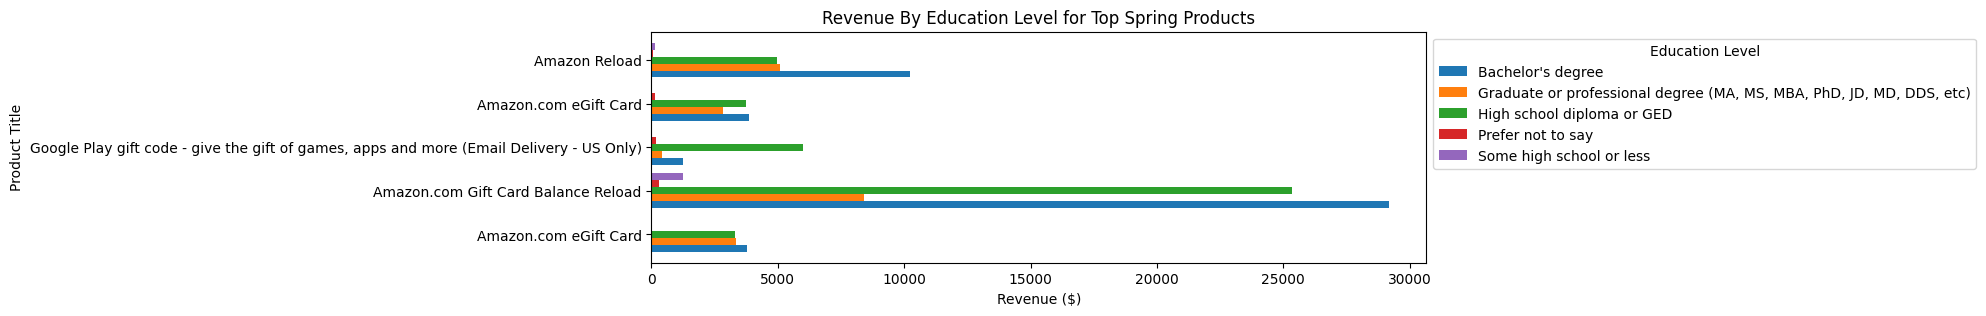

<ipython-input-125-3d87254bc977>:12: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



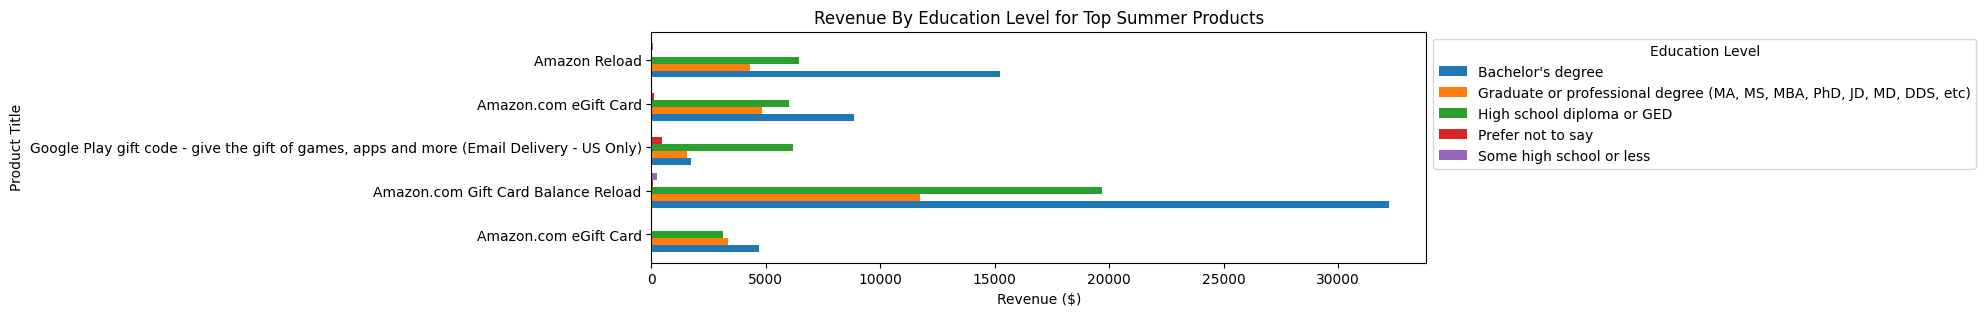

<ipython-input-125-3d87254bc977>:12: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



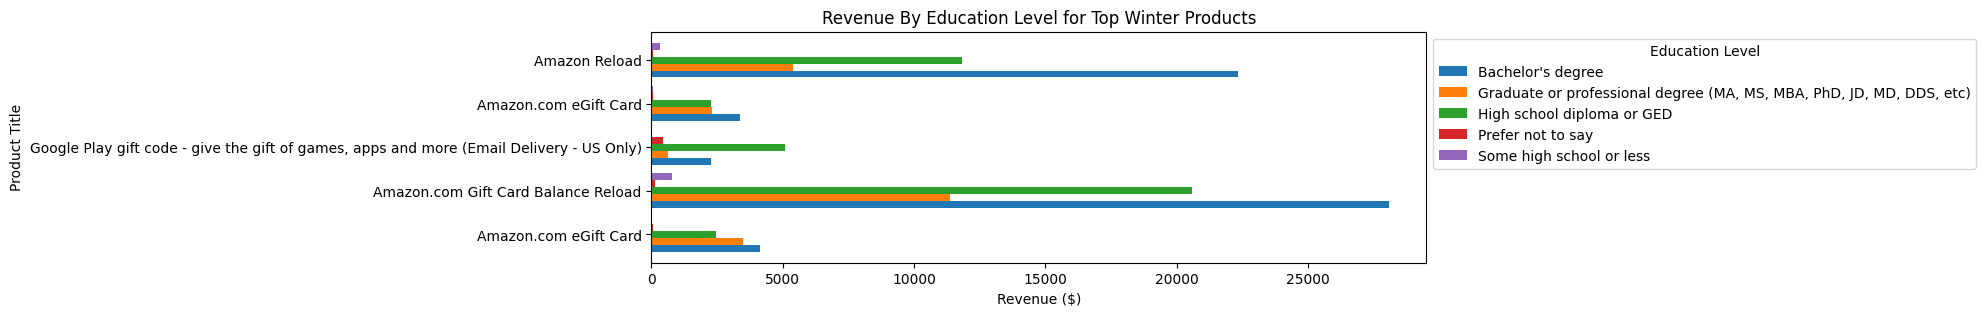

In [ ]:
# Education | Revenue | Chart

for season, edu_rev_df in edu_rev.items():
    # create the figure/axes
    fig, ax = plot_by_group(
        edu_rev_df,
        value_type="Revenue",
        demographic="Education Level"
    )
    # override the title to include the season
    ax.set_title(f"Revenue By Education Level for Top {season} Products")
    plt.tight_layout()
    plt.show()

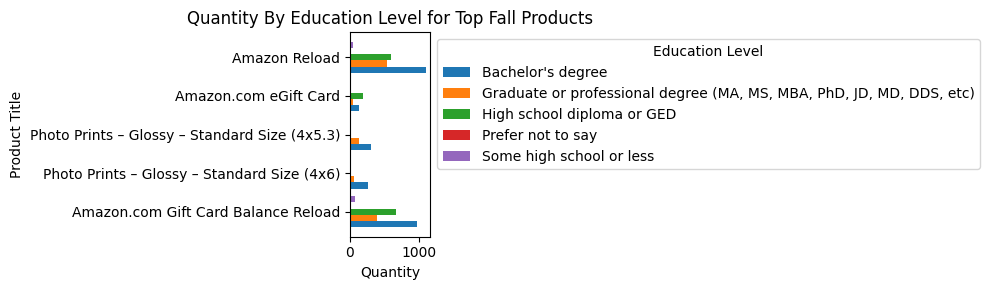

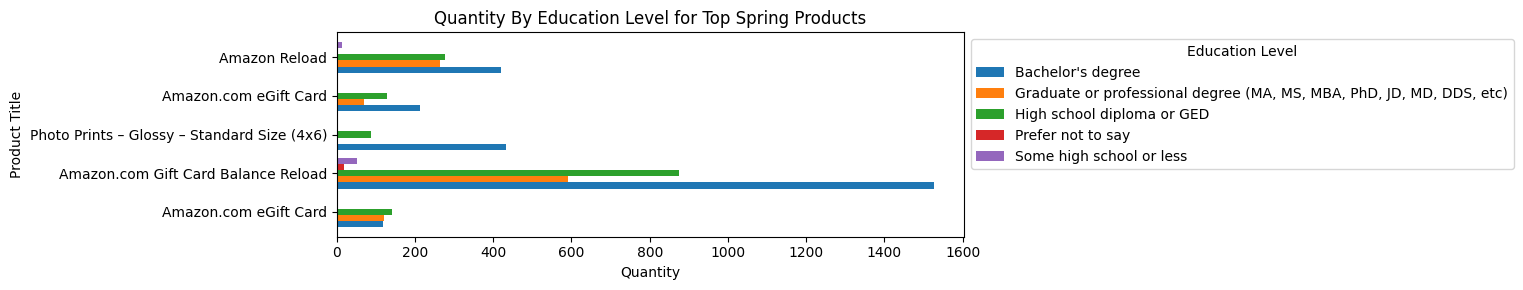

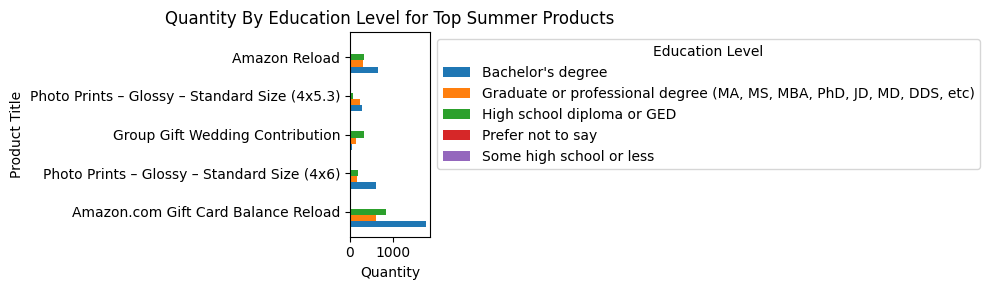

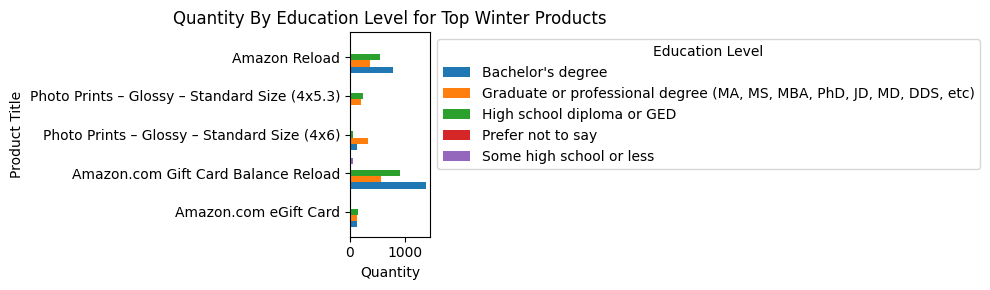

In [ ]:
# Education | Quantity | Chart


for season, edu_qty_df in edu_qty.items():
    # create the figure/axes
    fig, ax = plot_by_group(
        edu_qty_df,
        value_type="Quantity",
        demographic="Education Level"
    )
    # override the title to include the season
    ax.set_title(f"Quantity By Education Level for Top {season} Products")
    plt.tight_layout()
    plt.show()

# Gender Charts

In [ ]:
gender_qty, gender_rev = demographic_breakdown_df(df, title_map, top5_qty, top5_rev, demographic="Gender")


---- Fall Demographic Breakdown ----

Quantity by Gender:


Q-demos-gender            Female    Male  Other  Prefer not to say  \
ASIN/ISBN (Product Code)                                             
B00IX1I3G6                 688.0  1400.0    5.0                1.0   
B0711H8L7V                 287.0    43.0    0.0                0.0   
B079NF2NFW                 417.0    16.0   24.0                0.0   
B07PCMWTSG                 129.0   237.0    5.0                0.0   
B086KKT3RX                 835.0  1442.0   10.0                0.0   

Q-demos-gender                                                    Title  
ASIN/ISBN (Product Code)                                                 
B00IX1I3G6                          Amazon.com Gift Card Balance Reload  
B0711H8L7V                  Photo Prints – Glossy – Standard Size (4x6)  
B079NF2NFW                Photo Prints – Glossy – Standard Size (4x5.3)  
B07PCMWTSG                                        Amazon.com eGift Card  
B086KKT3RX                                                Amazon Reload

Revenue by Gender:


Q-demos-gender              Female      Male   Other  Prefer not to say  \
ASIN/ISBN (Product Code)                                                  
B00IX1I3G6                18098.43  31714.67  199.49              18.87   
B07PCMWTSG                 4349.76  10702.55  472.06               0.00   
B07PXGQC1Q                 8651.57   7082.71    0.00               0.00   
B086KKT3RX                19003.86  23523.25  112.71               0.00   
B09BZ4VF5R                  280.00  17055.00    0.00               0.00   

Q-demos-gender                                                        Title  
ASIN/ISBN (Product Code)                                                     
B00IX1I3G6                              Amazon.com Gift Card Balance Reload  
B07PCMWTSG                                            Amazon.com eGift Card  
B07PXGQC1Q                Apple AirPods (2nd Generation) Wireless Earbud...  
B086KKT3RX                                                    Amazon Reload  
B09BZ4VF5R                                            Amazon.com eGift Card


---- Spring Demographic Breakdown ----

Quantity by Gender:


Q-demos-gender            Female    Male  Other  \
ASIN/ISBN (Product Code)                          
B004LLIKVU                 130.0   247.0    1.0   
B00IX1I3G6                 892.0  2158.0   12.0   
B0711H8L7V                  55.0   470.0    0.0   
B07PCMWTSG                 170.0   242.0    4.0   
B086KKT3RX                 379.0   595.0    1.0   

Q-demos-gender                                                  Title  
ASIN/ISBN (Product Code)                                               
B004LLIKVU                                      Amazon.com eGift Card  
B00IX1I3G6                        Amazon.com Gift Card Balance Reload  
B0711H8L7V                Photo Prints – Glossy – Standard Size (4x6)  
B07PCMWTSG                                      Amazon.com eGift Card  
B086KKT3RX                                              Amazon Reload

Revenue by Gender:


Q-demos-gender              Female      Male   Other  \
ASIN/ISBN (Product Code)                               
B004LLIKVU                 3288.56   7155.75    2.95   
B00IX1I3G6                24988.55  38947.65  544.86   
B074T91QTZ                 4218.74   3605.80    0.00   
B07PCMWTSG                 4785.95   5670.97  111.53   
B086KKT3RX                 9284.20  11193.28    4.00   

Q-demos-gender                                                        Title  
ASIN/ISBN (Product Code)                                                     
B004LLIKVU                                            Amazon.com eGift Card  
B00IX1I3G6                              Amazon.com Gift Card Balance Reload  
B074T91QTZ                Google Play gift code - give the gift of games...  
B07PCMWTSG                                            Amazon.com eGift Card  
B086KKT3RX                                                    Amazon Reload


---- Summer Demographic Breakdown ----

Quantity by Gender:


Q-demos-gender            Female    Male  Other  Prefer not to say  \
ASIN/ISBN (Product Code)                                             
B00IX1I3G6                 917.0  2318.0   14.0                1.0   
B0711H8L7V                 484.0   460.0   17.0                0.0   
B071DPM9RD                 539.0     1.0    0.0                0.0   
B079NF2NFW                 268.0   328.0    0.0                0.0   
B086KKT3RX                 434.0   864.0    9.0                0.0   

Q-demos-gender                                                    Title  
ASIN/ISBN (Product Code)                                                 
B00IX1I3G6                          Amazon.com Gift Card Balance Reload  
B0711H8L7V                  Photo Prints – Glossy – Standard Size (4x6)  
B071DPM9RD                              Group Gift Wedding Contribution  
B079NF2NFW                Photo Prints – Glossy – Standard Size (4x5.3)  
B086KKT3RX                                                Amazon Reload

Revenue by Gender:


Q-demos-gender              Female      Male   Other  Prefer not to say  \
ASIN/ISBN (Product Code)                                                  
B004LLIKVU                 2783.70   8188.41  168.23               0.00   
B00IX1I3G6                24420.60  39191.20  366.66               4.51   
B074T91QTZ                 3590.54   6384.21    0.00               0.00   
B07PCMWTSG                 5272.46  14351.86  227.47               0.00   
B086KKT3RX                10771.91  15155.18  169.58               0.00   

Q-demos-gender                                                        Title  
ASIN/ISBN (Product Code)                                                     
B004LLIKVU                                            Amazon.com eGift Card  
B00IX1I3G6                              Amazon.com Gift Card Balance Reload  
B074T91QTZ                Google Play gift code - give the gift of games...  
B07PCMWTSG                                            Amazon.com eGift Card  
B086KKT3RX                                                    Amazon Reload


---- Winter Demographic Breakdown ----

Quantity by Gender:


Q-demos-gender            Female    Male  Other  Prefer not to say  \
ASIN/ISBN (Product Code)                                             
B004LLIKVU                 128.0   275.0    4.0                0.0   
B00IX1I3G6                 977.0  1960.0   26.0                4.0   
B0711H8L7V                 396.0   124.0    0.0                0.0   
B079NF2NFW                 458.0     2.0    0.0                0.0   
B086KKT3RX                 683.0  1039.0   14.0                1.0   

Q-demos-gender                                                    Title  
ASIN/ISBN (Product Code)                                                 
B004LLIKVU                                        Amazon.com eGift Card  
B00IX1I3G6                          Amazon.com Gift Card Balance Reload  
B0711H8L7V                  Photo Prints – Glossy – Standard Size (4x6)  
B079NF2NFW                Photo Prints – Glossy – Standard Size (4x5.3)  
B086KKT3RX                                                Amazon Reload

Revenue by Gender:


Q-demos-gender              Female      Male   Other  Prefer not to say  \
ASIN/ISBN (Product Code)                                                  
B004LLIKVU                 2779.66   7294.84  103.43               0.00   
B00IX1I3G6                23957.04  36373.88  556.51             128.88   
B074T91QTZ                 3757.98   4702.62    0.00               0.00   
B07PCMWTSG                 3824.65   4034.22  222.02               0.00   
B086KKT3RX                18973.94  20543.55  375.22              25.00   

Q-demos-gender                                                        Title  
ASIN/ISBN (Product Code)                                                     
B004LLIKVU                                            Amazon.com eGift Card  
B00IX1I3G6                              Amazon.com Gift Card Balance Reload  
B074T91QTZ                Google Play gift code - give the gift of games...  
B07PCMWTSG                                            Amazon.com eGift Card  
B086KKT3RX                                                    Amazon Reload

<ipython-input-128-3a5bd30a3961>:13: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



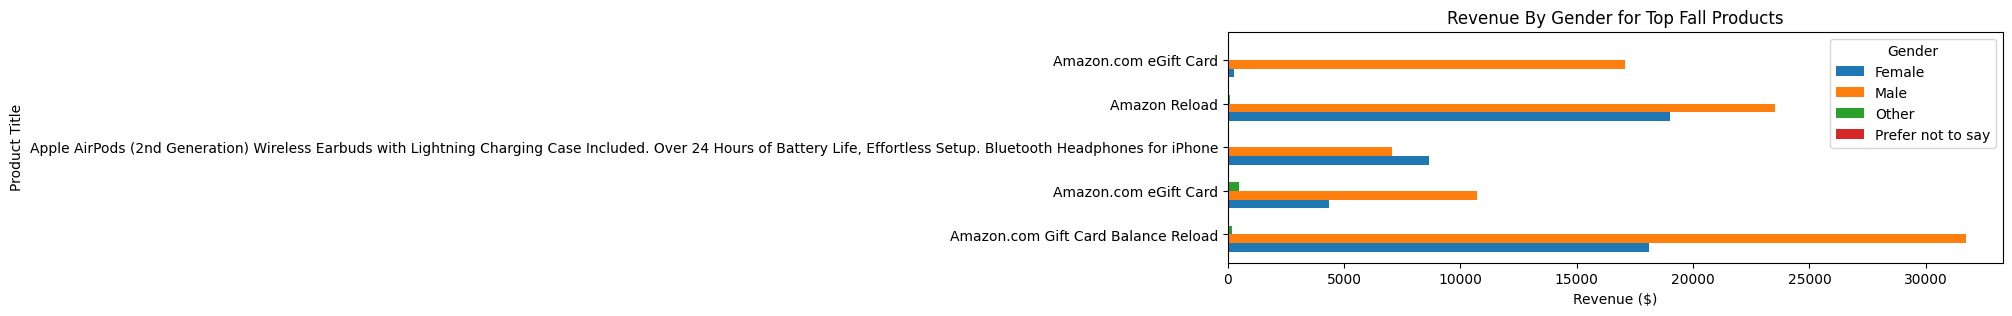

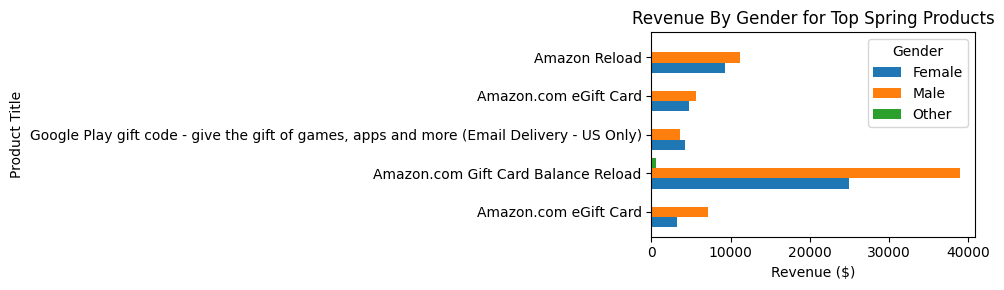

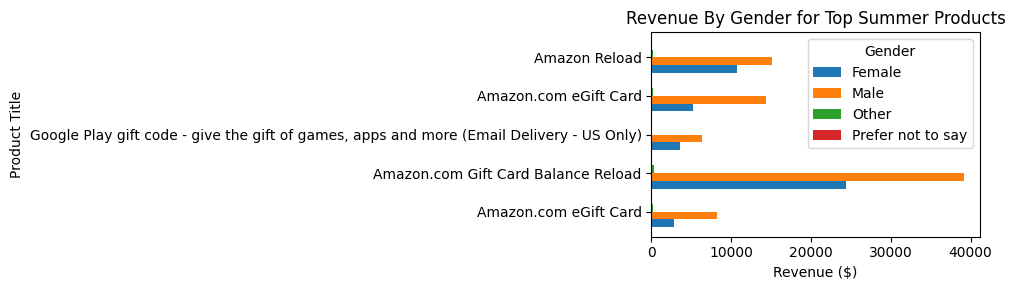

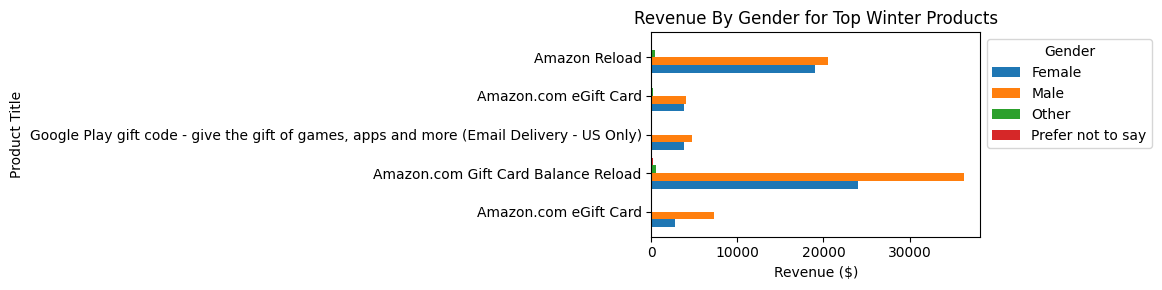

In [ ]:
# Gender | Revenue | Chart


for season, gender_rev_df in gender_rev.items():
    # create the figure/axes
    fig, ax = plot_by_group(
        gender_rev_df,
        value_type="Revenue",
        demographic="Gender"
    )
    # override the title to include the season
    ax.set_title(f"Revenue By Gender for Top {season} Products")
    plt.tight_layout()
    plt.show()

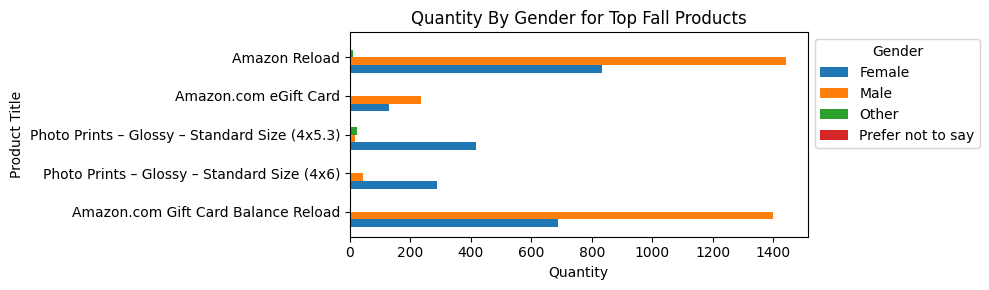

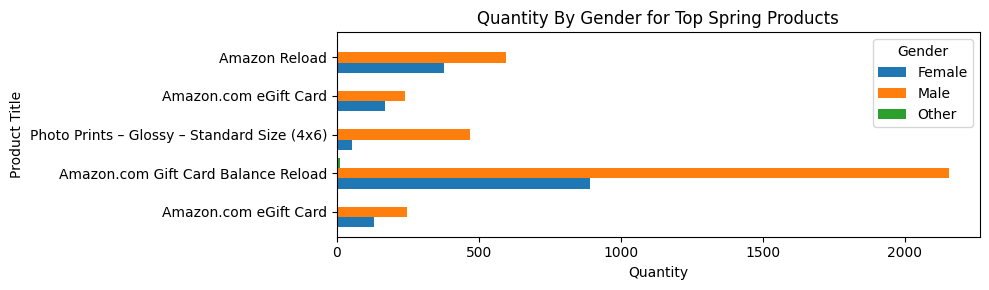

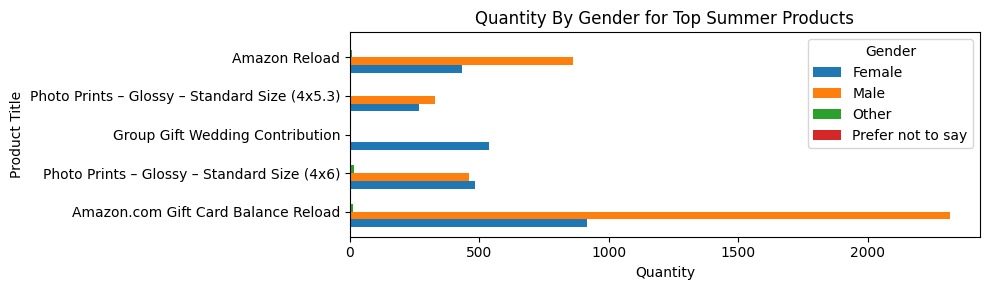

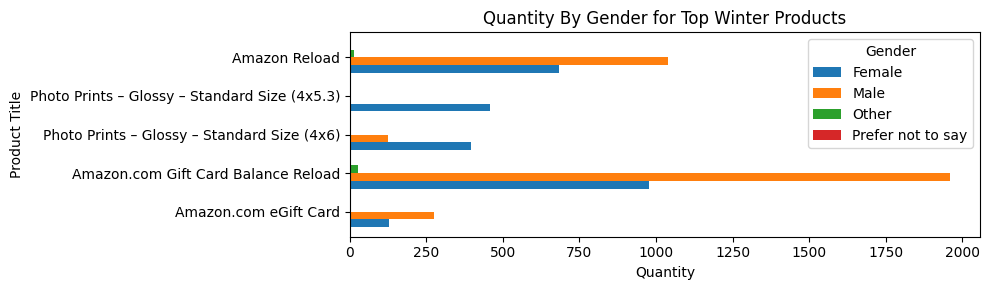

In [ ]:
# Gender | Quantity | Chart

for season, gender_qty_df in gender_qty.items():
    # create the figure/axes
    fig, ax = plot_by_group(
        gender_qty_df,
        value_type="Quantity",
        demographic="Gender"
    )
    # override the title to include the season
    ax.set_title(f"Quantity By Gender for Top {season} Products")
    plt.tight_layout()
    plt.show()

# Sexual Orientation Charts

In [ ]:
sexual_orientation_qty, sexual_orientation_rev = demographic_breakdown_df(df, title_map, top5_qty, top5_rev, demographic="Sexual Orientation")


---- Fall Demographic Breakdown ----

Quantity by Sexual Orientation:


Q-sexual-orientation      LGBTQ+  heterosexual (straight)  prefer not to say  \
ASIN/ISBN (Product Code)                                                       
B00IX1I3G6                 281.0                   1804.0                9.0   
B0711H8L7V                  17.0                    313.0                0.0   
B079NF2NFW                  24.0                    433.0                0.0   
B07PCMWTSG                  78.0                    293.0                0.0   
B086KKT3RX                 281.0                   1991.0               15.0   

Q-sexual-orientation                                              Title  
ASIN/ISBN (Product Code)                                                 
B00IX1I3G6                          Amazon.com Gift Card Balance Reload  
B0711H8L7V                  Photo Prints – Glossy – Standard Size (4x6)  
B079NF2NFW                Photo Prints – Glossy – Standard Size (4x5.3)  
B07PCMWTSG                                        Amazon.com eGift Card  
B086KKT3RX                                                Amazon Reload

Revenue by Sexual Orientation:


Q-sexual-orientation       LGBTQ+  heterosexual (straight)  prefer not to say  \
ASIN/ISBN (Product Code)                                                        
B00IX1I3G6                7441.40                 41319.17            1270.89   
B07PCMWTSG                2351.46                 13172.91               0.00   
B07PXGQC1Q                1628.97                 13762.32             342.99   
B086KKT3RX                4886.74                 37068.12             684.96   
B09BZ4VF5R                   5.00                 17330.00               0.00   

Q-sexual-orientation                                                  Title  
ASIN/ISBN (Product Code)                                                     
B00IX1I3G6                              Amazon.com Gift Card Balance Reload  
B07PCMWTSG                                            Amazon.com eGift Card  
B07PXGQC1Q                Apple AirPods (2nd Generation) Wireless Earbud...  
B086KKT3RX                                                    Amazon Reload  
B09BZ4VF5R                                            Amazon.com eGift Card


---- Spring Demographic Breakdown ----

Quantity by Sexual Orientation:


Q-sexual-orientation      LGBTQ+  heterosexual (straight)  prefer not to say  \
ASIN/ISBN (Product Code)                                                       
B004LLIKVU                  22.0                    355.0                1.0   
B00IX1I3G6                 360.0                   2681.0               21.0   
B0711H8L7V                 354.0                    171.0                0.0   
B07PCMWTSG                  67.0                    347.0                2.0   
B086KKT3RX                 134.0                    835.0                6.0   

Q-sexual-orientation                                            Title  
ASIN/ISBN (Product Code)                                               
B004LLIKVU                                      Amazon.com eGift Card  
B00IX1I3G6                        Amazon.com Gift Card Balance Reload  
B0711H8L7V                Photo Prints – Glossy – Standard Size (4x6)  
B07PCMWTSG                                      Amazon.com eGift Card  
B086KKT3RX                                              Amazon Reload

Revenue by Sexual Orientation:


Q-sexual-orientation        LGBTQ+  heterosexual (straight)  \
ASIN/ISBN (Product Code)                                      
B004LLIKVU                  700.02                  9697.24   
B00IX1I3G6                13410.32                 48790.91   
B074T91QTZ                 2053.08                  5771.46   
B07PCMWTSG                 1560.21                  8932.33   
B086KKT3RX                 3276.73                 16770.02   

Q-sexual-orientation      prefer not to say  \
ASIN/ISBN (Product Code)                      
B004LLIKVU                            50.00   
B00IX1I3G6                          2279.83   
B074T91QTZ                             0.00   
B07PCMWTSG                            75.91   
B086KKT3RX                           434.73   

Q-sexual-orientation                                                  Title  
ASIN/ISBN (Product Code)                                                     
B004LLIKVU                                            Amazon.com eGift Card  
B00IX1I3G6                              Amazon.com Gift Card Balance Reload  
B074T91QTZ                Google Play gift code - give the gift of games...  
B07PCMWTSG                                            Amazon.com eGift Card  
B086KKT3RX                                                    Amazon Reload


---- Summer Demographic Breakdown ----

Quantity by Sexual Orientation:


Q-sexual-orientation      LGBTQ+  heterosexual (straight)  prefer not to say  \
ASIN/ISBN (Product Code)                                                       
B00IX1I3G6                 356.0                   2875.0               19.0   
B0711H8L7V                 299.0                    662.0                0.0   
B071DPM9RD                 329.0                    211.0                0.0   
B079NF2NFW                 274.0                    322.0                0.0   
B086KKT3RX                 133.0                   1171.0                3.0   

Q-sexual-orientation                                              Title  
ASIN/ISBN (Product Code)                                                 
B00IX1I3G6                          Amazon.com Gift Card Balance Reload  
B0711H8L7V                  Photo Prints – Glossy – Standard Size (4x6)  
B071DPM9RD                              Group Gift Wedding Contribution  
B079NF2NFW                Photo Prints – Glossy – Standard Size (4x5.3)  
B086KKT3RX                                                Amazon Reload

Revenue by Sexual Orientation:


Q-sexual-orientation       LGBTQ+  heterosexual (straight)  prefer not to say  \
ASIN/ISBN (Product Code)                                                        
B004LLIKVU                1181.19                  9959.15               0.00   
B00IX1I3G6                9711.59                 51133.75            3137.63   
B074T91QTZ                1096.00                  8878.75               0.00   
B07PCMWTSG                3326.16                 16485.63              40.00   
B086KKT3RX                3555.77                 22145.90             395.00   

Q-sexual-orientation                                                  Title  
ASIN/ISBN (Product Code)                                                     
B004LLIKVU                                            Amazon.com eGift Card  
B00IX1I3G6                              Amazon.com Gift Card Balance Reload  
B074T91QTZ                Google Play gift code - give the gift of games...  
B07PCMWTSG                                            Amazon.com eGift Card  
B086KKT3RX                                                    Amazon Reload


---- Winter Demographic Breakdown ----

Quantity by Sexual Orientation:


Q-sexual-orientation      LGBTQ+  heterosexual (straight)  prefer not to say  \
ASIN/ISBN (Product Code)                                                       
B004LLIKVU                  37.0                    369.0                1.0   
B00IX1I3G6                 382.0                   2571.0               14.0   
B0711H8L7V                   7.0                    513.0                0.0   
B079NF2NFW                   2.0                    458.0                0.0   
B086KKT3RX                 210.0                   1496.0               31.0   

Q-sexual-orientation                                              Title  
ASIN/ISBN (Product Code)                                                 
B004LLIKVU                                        Amazon.com eGift Card  
B00IX1I3G6                          Amazon.com Gift Card Balance Reload  
B0711H8L7V                  Photo Prints – Glossy – Standard Size (4x6)  
B079NF2NFW                Photo Prints – Glossy – Standard Size (4x5.3)  
B086KKT3RX                                                Amazon Reload

Revenue by Sexual Orientation:


Q-sexual-orientation        LGBTQ+  heterosexual (straight)  \
ASIN/ISBN (Product Code)                                      
B004LLIKVU                  973.91                  9179.02   
B00IX1I3G6                10780.98                 49087.97   
B074T91QTZ                  856.10                  7566.50   
B07PCMWTSG                 1287.16                  6729.51   
B086KKT3RX                 4913.58                 33790.04   

Q-sexual-orientation      prefer not to say  \
ASIN/ISBN (Product Code)                      
B004LLIKVU                            25.00   
B00IX1I3G6                          1147.36   
B074T91QTZ                            38.00   
B07PCMWTSG                            64.22   
B086KKT3RX                          1214.09   

Q-sexual-orientation                                                  Title  
ASIN/ISBN (Product Code)                                                     
B004LLIKVU                                            Amazon.com eGift Card  
B00IX1I3G6                              Amazon.com Gift Card Balance Reload  
B074T91QTZ                Google Play gift code - give the gift of games...  
B07PCMWTSG                                            Amazon.com eGift Card  
B086KKT3RX                                                    Amazon Reload

<ipython-input-131-6473211b9809>:12: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



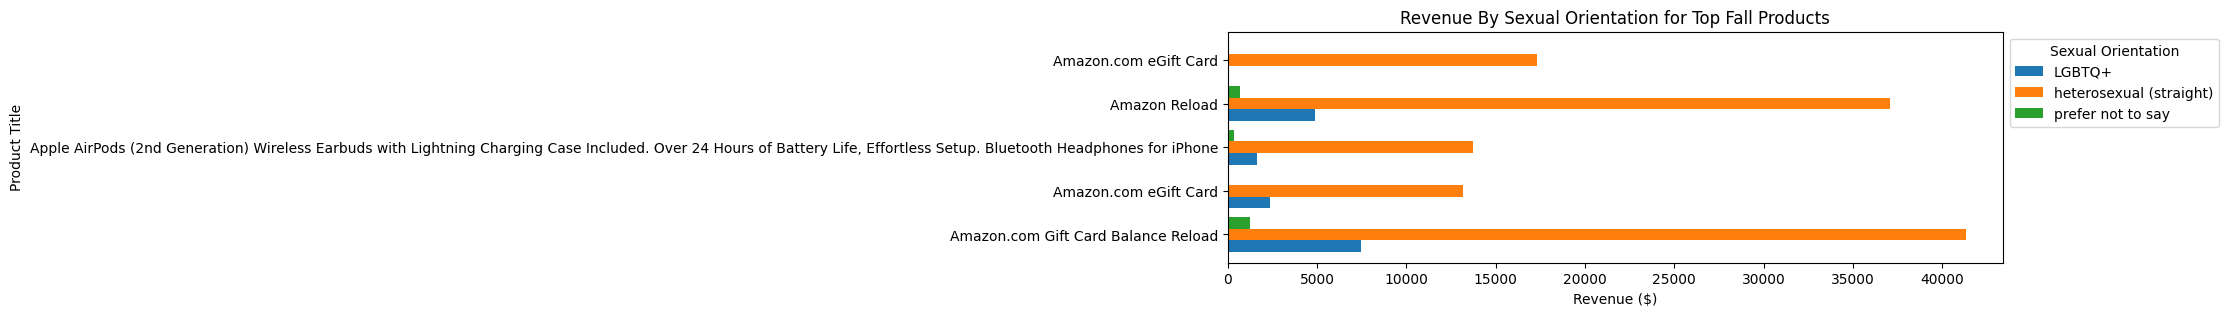

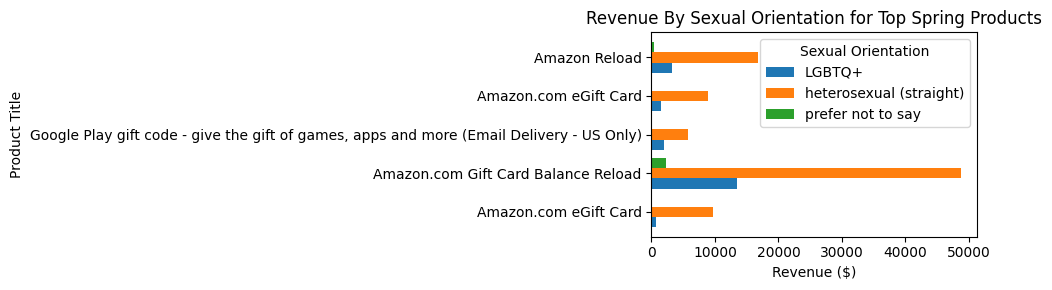

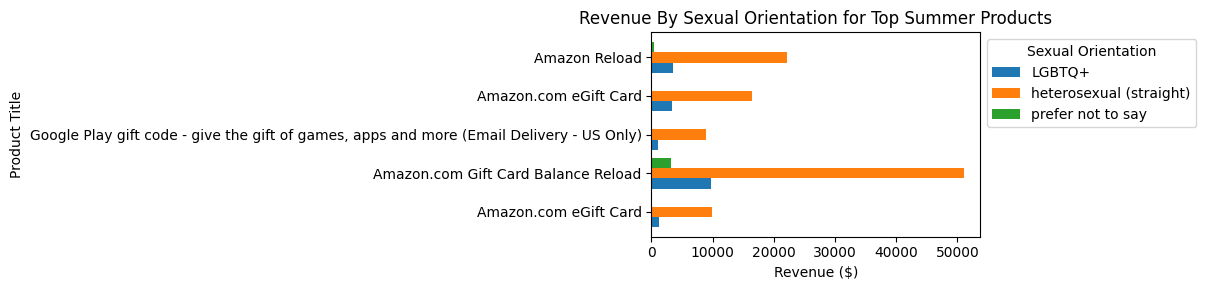

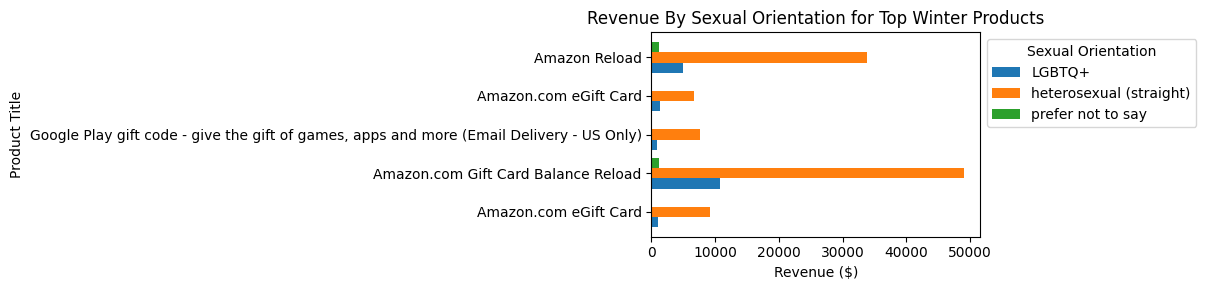

In [ ]:
# Sexual Orientation | Revenue | Chart

for season, sexual_orientation_rev_df in sexual_orientation_rev.items():
    # create the figure/axes
    fig, ax = plot_by_group(
        sexual_orientation_rev_df,
        value_type="Revenue",
        demographic="Sexual Orientation"
    )
    # override the title to include the season
    ax.set_title(f"Revenue By Sexual Orientation for Top {season} Products")
    plt.tight_layout()
    plt.show()

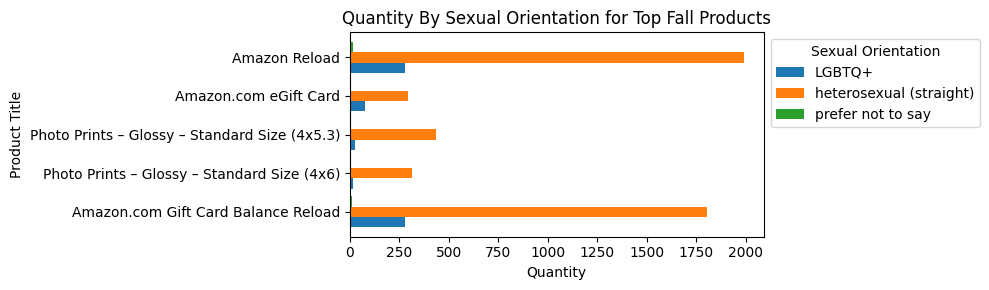

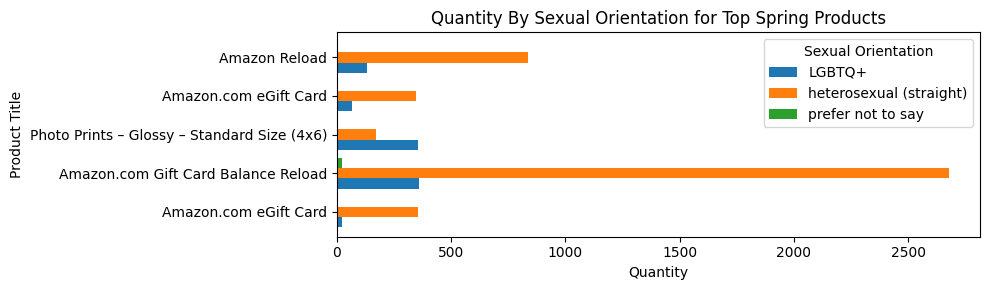

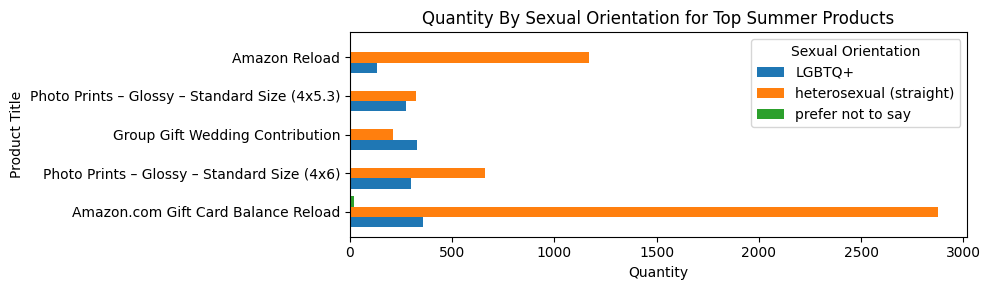

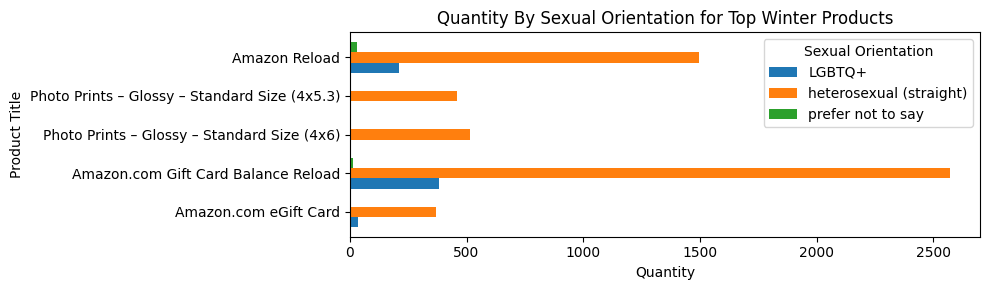

In [ ]:
# Sexual Orientation | Quantity | Chart

for season, sexual_orientation_qty_df in sexual_orientation_qty.items():
    # create the figure/axes
    fig, ax = plot_by_group(
        sexual_orientation_qty_df,
        value_type="Quantity",
        demographic="Sexual Orientation"
    )
    # override the title to include the season
    ax.set_title(f"Quantity By Sexual Orientation for Top {season} Products")
    plt.tight_layout()
    plt.show()

# State Charts

In [ ]:
state_qty, state_rev = demographic_breakdown_df(df, title_map, top5_qty, top5_rev, demographic="State")


---- Fall Demographic Breakdown ----

Quantity by State:


Q-demos-state             Alabama  Alaska  Arizona  Arkansas  California  \
ASIN/ISBN (Product Code)                                                   
B00IX1I3G6                   14.0     5.0      9.0      21.0       189.0   
B0711H8L7V                    5.0     0.0    140.0       0.0         0.0   
B079NF2NFW                    0.0     0.0      0.0       0.0        28.0   
B07PCMWTSG                    3.0     1.0      4.0       1.0       107.0   
B086KKT3RX                   25.0     7.0     28.0      14.0       268.0   

Q-demos-state             Colorado  Connecticut  Delaware  \
ASIN/ISBN (Product Code)                                    
B00IX1I3G6                    14.0         23.0       5.0   
B0711H8L7V                     0.0          0.0       0.0   
B079NF2NFW                     0.0          0.0       0.0   
B07PCMWTSG                     6.0          3.0       0.0   
B086KKT3RX                     9.0          5.0       2.0   

Q-demos-state             District of Columbia  Florida  ...  Tennessee  \
ASIN/ISBN (Product Code)                                 ...              
B00IX1I3G6                                 2.0    146.0  ...       49.0   
B0711H8L7V                                 0.0      0.0  ...        0.0   
B079NF2NFW                                 0.0      0.0  ...        0.0   
B07PCMWTSG                                 1.0     23.0  ...       30.0   
B086KKT3RX                                 2.0    169.0  ...       45.0   

Q-demos-state             Texas  Utah  Vermont  Virginia  Washington  \
ASIN/ISBN (Product Code)                                               
B00IX1I3G6                109.0  13.0      3.0      44.0        47.0   
B0711H8L7V                 32.0   0.0      0.0       0.0         0.0   
B079NF2NFW                 23.0  99.0      0.0       0.0         0.0   
B07PCMWTSG                 18.0   0.0      0.0      13.0         9.0   
B086KKT3RX                134.0  15.0      3.0      19.0        14.0   

Q-demos-state             West Virginia  Wisconsin  Wyoming  \
ASIN/ISBN (Product Code)                                      
B00IX1I3G6                          2.0       65.0      0.0   
B0711H8L7V                          0.0        0.0      0.0   
B079NF2NFW                          0.0        0.0      0.0   
B07PCMWTSG                          0.0        4.0      0.0   
B086KKT3RX                          3.0       57.0      2.0   

Q-demos-state                                                     Title  
ASIN/ISBN (Product Code)                                                 
B00IX1I3G6                          Amazon.com Gift Card Balance Reload  
B0711H8L7V                  Photo Prints – Glossy – Standard Size (4x6)  
B079NF2NFW                Photo Prints – Glossy – Standard Size (4x5.3)  
B07PCMWTSG                                        Amazon.com eGift Card  
B086KKT3RX                                                Amazon Reload  

[5 rows x 51 columns]

Revenue by State:


Q-demos-state             Alabama  Alaska  Arizona  Arkansas  California  \
ASIN/ISBN (Product Code)                                                   
B00IX1I3G6                 597.10  665.03   197.31    222.67     7950.62   
B07PCMWTSG                 222.06   50.00    80.00     50.00     6338.53   
B07PXGQC1Q                 144.00    0.00     0.00      0.00     1144.91   
B086KKT3RX                 973.70   76.10   444.00    249.61     5430.07   
B09BZ4VF5R                   0.00    0.00     0.00      0.00    16802.00   

Q-demos-state             Colorado  Connecticut  Delaware  \
ASIN/ISBN (Product Code)                                    
B00IX1I3G6                  596.38        856.8      80.0   
B07PCMWTSG                  305.00          9.0       0.0   
B07PXGQC1Q                    0.00          0.0       0.0   
B086KKT3RX                  301.00        141.3      19.0   
B09BZ4VF5R                    0.00          0.0       0.0   

Q-demos-state             District of Columbia  Florida  ...  Tennessee  \
ASIN/ISBN (Product Code)                                 ...              
B00IX1I3G6                               20.00  3532.68  ...    1361.24   
B07PCMWTSG                               50.00   984.82  ...     452.06   
B07PXGQC1Q                              223.95   393.98  ...     327.99   
B086KKT3RX                               45.00  4204.41  ...     615.72   
B09BZ4VF5R                                0.00     0.00  ...       0.00   

Q-demos-state               Texas    Utah  Vermont  Virginia  Washington  \
ASIN/ISBN (Product Code)                                                   
B00IX1I3G6                2411.01  158.00   492.00   1726.70     1964.89   
B07PCMWTSG                 682.29    0.00     0.00    171.03      500.00   
B07PXGQC1Q                1191.92  208.00     0.00   2130.93      144.00   
B086KKT3RX                2624.78  676.74    37.51    993.52      498.03   
B09BZ4VF5R                  33.00    0.00     0.00      0.00      220.00   

Q-demos-state             West Virginia  Wisconsin  Wyoming  \
ASIN/ISBN (Product Code)                                      
B00IX1I3G6                        34.30     542.58      0.0   
B07PCMWTSG                         0.00     122.79      0.0   
B07PXGQC1Q                       258.99     481.99      0.0   
B086KKT3RX                        36.22     897.85     65.0   
B09BZ4VF5R                         0.00     100.00      0.0   

Q-demos-state                                                         Title  
ASIN/ISBN (Product Code)                                                     
B00IX1I3G6                              Amazon.com Gift Card Balance Reload  
B07PCMWTSG                                            Amazon.com eGift Card  
B07PXGQC1Q                Apple AirPods (2nd Generation) Wireless Earbud...  
B086KKT3RX                                                    Amazon Reload  
B09BZ4VF5R                                            Amazon.com eGift Card  

[5 rows x 51 columns]


---- Spring Demographic Breakdown ----

Quantity by State:


Q-demos-state             Alabama  Arizona  Arkansas  California  Colorado  \
ASIN/ISBN (Product Code)                                                     
B004LLIKVU                    2.0      2.0       0.0        21.0      13.0   
B00IX1I3G6                   16.0     23.0      22.0       240.0      18.0   
B0711H8L7V                    0.0    339.0       0.0         6.0      37.0   
B07PCMWTSG                    4.0      7.0       1.0        63.0       5.0   
B086KKT3RX                   13.0      9.0       2.0        78.0       7.0   

Q-demos-state             Connecticut  Delaware  District of Columbia  \
ASIN/ISBN (Product Code)                                                
B004LLIKVU                       52.0       0.0                   1.0   
B00IX1I3G6                        7.0       7.0                   0.0   
B0711H8L7V                        0.0       0.0                   0.0   
B07PCMWTSG                        7.0       0.0                   0.0   
B086KKT3RX                        0.0       2.0                   1.0   

Q-demos-state             Florida  Georgia  ...  South Dakota  Tennessee  \
ASIN/ISBN (Product Code)                    ...                            
B004LLIKVU                   12.0      5.0  ...           0.0        7.0   
B00IX1I3G6                  172.0    224.0  ...           2.0       50.0   
B0711H8L7V                    0.0      0.0  ...           0.0        0.0   
B07PCMWTSG                   21.0     69.0  ...           0.0       18.0   
B086KKT3RX                   69.0     30.0  ...           0.0       21.0   

Q-demos-state             Texas  Utah  Vermont  Virginia  Washington  \
ASIN/ISBN (Product Code)                                               
B004LLIKVU                 30.0   2.0      0.0      12.0         7.0   
B00IX1I3G6                210.0  13.0      5.0      44.0        43.0   
B0711H8L7V                  2.0   0.0      0.0       0.0         0.0   
B07PCMWTSG                 40.0   2.0      0.0      30.0         7.0   
B086KKT3RX                 86.0  14.0      4.0       7.0         4.0   

Q-demos-state             West Virginia  Wisconsin  \
ASIN/ISBN (Product Code)                             
B004LLIKVU                          0.0        5.0   
B00IX1I3G6                          5.0       78.0   
B0711H8L7V                          0.0        0.0   
B07PCMWTSG                          1.0        7.0   
B086KKT3RX                          0.0       16.0   

Q-demos-state                                                   Title  
ASIN/ISBN (Product Code)                                               
B004LLIKVU                                      Amazon.com eGift Card  
B00IX1I3G6                        Amazon.com Gift Card Balance Reload  
B0711H8L7V                Photo Prints – Glossy – Standard Size (4x6)  
B07PCMWTSG                                      Amazon.com eGift Card  
B086KKT3RX                                              Amazon Reload  

[5 rows x 48 columns]

Revenue by State:


Q-demos-state             Alabama  Arizona  Arkansas  California  Colorado  \
ASIN/ISBN (Product Code)                                                     
B004LLIKVU                  42.95    10.00      0.00      870.54    344.20   
B00IX1I3G6                 843.26   442.82    379.00     4919.24    423.66   
B074T91QTZ                   0.00     0.00      0.00      415.00     25.00   
B07PCMWTSG                 111.53   291.00      5.00     1613.30    115.00   
B086KKT3RX                 439.60   196.00     22.59     2463.09    185.03   

Q-demos-state             Connecticut  Delaware  District of Columbia  \
ASIN/ISBN (Product Code)                                                
B004LLIKVU                     659.87       0.0                  3.00   
B00IX1I3G6                     279.63      68.0                  0.00   
B074T91QTZ                       0.00       0.0                  0.00   
B07PCMWTSG                      30.00       0.0                  0.00   
B086KKT3RX                       0.00      75.0                  2.12   

Q-demos-state             Florida  Georgia  ...  South Dakota  Tennessee  \
ASIN/ISBN (Product Code)                    ...                            
B004LLIKVU                 647.34   144.03  ...          0.00     218.00   
B00IX1I3G6                3884.23  5040.82  ...         44.86    2929.94   
B074T91QTZ                 122.00     0.00  ...          0.00      25.00   
B07PCMWTSG                 622.70   587.86  ...          0.00     240.00   
B086KKT3RX                1515.72   664.21  ...          0.00     440.96   

Q-demos-state               Texas    Utah  Vermont  Virginia  Washington  \
ASIN/ISBN (Product Code)                                                   
B004LLIKVU                1199.34   52.82     0.00    261.70      373.64   
B00IX1I3G6                5037.51  391.46   275.00   1359.51     2055.97   
B074T91QTZ                 425.00    0.00     0.00     25.00       25.00   
B07PCMWTSG                 848.41  325.00     0.00    483.83      209.00   
B086KKT3RX                2903.40  195.00   420.59    107.14      178.68   

Q-demos-state             West Virginia  Wisconsin  \
ASIN/ISBN (Product Code)                             
B004LLIKVU                         0.00      21.00   
B00IX1I3G6                       404.02     437.31   
B074T91QTZ                         0.00      40.00   
B07PCMWTSG                        50.00      99.98   
B086KKT3RX                         0.00     130.07   

Q-demos-state                                                         Title  
ASIN/ISBN (Product Code)                                                     
B004LLIKVU                                            Amazon.com eGift Card  
B00IX1I3G6                              Amazon.com Gift Card Balance Reload  
B074T91QTZ                Google Play gift code - give the gift of games...  
B07PCMWTSG                                            Amazon.com eGift Card  
B086KKT3RX                                                    Amazon Reload  

[5 rows x 48 columns]


---- Summer Demographic Breakdown ----

Quantity by State:


Q-demos-state             Alabama  Arizona  Arkansas  California  Colorado  \
ASIN/ISBN (Product Code)                                                     
B00IX1I3G6                   18.0     17.0      14.0       487.0      15.0   
B0711H8L7V                    0.0    267.0       0.0        21.0       0.0   
B071DPM9RD                    1.0      0.0       0.0         0.0       0.0   
B079NF2NFW                    0.0    253.0       0.0         0.0       1.0   
B086KKT3RX                   18.0     23.0       8.0       214.0       5.0   

Q-demos-state             Connecticut  Delaware  District of Columbia  \
ASIN/ISBN (Product Code)                                                
B00IX1I3G6                        7.0       8.0                   5.0   
B0711H8L7V                        0.0       0.0                   0.0   
B071DPM9RD                        0.0       0.0                   0.0   
B079NF2NFW                        0.0       0.0                   0.0   
B086KKT3RX                        5.0       0.0                   0.0   

Q-demos-state             Florida  Georgia  ...  South Carolina  Tennessee  \
ASIN/ISBN (Product Code)                    ...                              
B00IX1I3G6                  164.0    142.0  ...            12.0       51.0   
B0711H8L7V                   19.0      0.0  ...             0.0       21.0   
B071DPM9RD                    1.0      0.0  ...             0.0        0.0   
B079NF2NFW                    1.0      0.0  ...             0.0        0.0   
B086KKT3RX                   82.0     33.0  ...             2.0       20.0   

Q-demos-state             Texas   Utah  Vermont  Virginia  Washington  \
ASIN/ISBN (Product Code)                                                
B00IX1I3G6                184.0   10.0      3.0      54.0        45.0   
B0711H8L7V                 43.0   19.0      0.0      50.0         0.0   
B071DPM9RD                  3.0    0.0      0.0       0.0         0.0   
B079NF2NFW                  2.0  100.0      0.0       0.0         0.0   
B086KKT3RX                102.0   15.0      2.0      10.0        15.0   

Q-demos-state             West Virginia  Wisconsin  \
ASIN/ISBN (Product Code)                             
B00IX1I3G6                          5.0       86.0   
B0711H8L7V                          5.0        0.0   
B071DPM9RD                          0.0       34.0   
B079NF2NFW                          0.0        0.0   
B086KKT3RX                          0.0       14.0   

Q-demos-state                                                     Title  
ASIN/ISBN (Product Code)                                                 
B00IX1I3G6                          Amazon.com Gift Card Balance Reload  
B0711H8L7V                  Photo Prints – Glossy – Standard Size (4x6)  
B071DPM9RD                              Group Gift Wedding Contribution  
B079NF2NFW                Photo Prints – Glossy – Standard Size (4x5.3)  
B086KKT3RX                                                Amazon Reload  

[5 rows x 48 columns]

Revenue by State:


Q-demos-state             Alabama  Alaska  Arizona  Arkansas  California  \
ASIN/ISBN (Product Code)                                                   
B004LLIKVU                  23.23     0.0    17.67     19.80      898.75   
B00IX1I3G6                1468.25     0.0  1008.01    170.26     7034.09   
B074T91QTZ                   0.00     0.0    50.00     25.00      435.00   
B07PCMWTSG                 292.47    25.0     5.00      0.00     1880.65   
B086KKT3RX                 963.52     0.0   356.62    339.59     3142.33   

Q-demos-state             Colorado  Connecticut  Delaware  \
ASIN/ISBN (Product Code)                                    
B004LLIKVU                  217.00       860.49       0.0   
B00IX1I3G6                  303.72       283.23     300.0   
B074T91QTZ                   35.00         0.00       0.0   
B07PCMWTSG                  790.00       179.00      40.0   
B086KKT3RX                   57.00       365.00       0.0   

Q-demos-state             District of Columbia  Florida  ...  Tennessee  \
ASIN/ISBN (Product Code)                                 ...              
B004LLIKVU                                0.00   612.41  ...     298.56   
B00IX1I3G6                               63.25  3185.29  ...    1154.07   
B074T91QTZ                                0.00   353.21  ...     250.00   
B07PCMWTSG                               65.00  1345.95  ...     713.00   
B086KKT3RX                                0.00  2128.03  ...     541.02   

Q-demos-state               Texas     Utah  Vermont  Virginia  Washington  \
ASIN/ISBN (Product Code)                                                    
B004LLIKVU                1006.19    26.80   100.00    519.89       85.00   
B00IX1I3G6                4334.52  1121.73   155.00   2424.86     1465.07   
B074T91QTZ                 457.00    25.00     0.00    100.00       25.00   
B07PCMWTSG                2015.30    50.00     0.00   2361.74      421.02   
B086KKT3RX                2712.49   231.03    48.17    315.59      283.40   

Q-demos-state             West Virginia  Wisconsin  Wyoming  \
ASIN/ISBN (Product Code)                                      
B004LLIKVU                         0.00       0.00      0.0   
B00IX1I3G6                       145.23     308.28      0.0   
B074T91QTZ                         0.00       0.00     50.0   
B07PCMWTSG                        50.00     150.00      0.0   
B086KKT3RX                         0.00     640.85      0.0   

Q-demos-state                                                         Title  
ASIN/ISBN (Product Code)                                                     
B004LLIKVU                                            Amazon.com eGift Card  
B00IX1I3G6                              Amazon.com Gift Card Balance Reload  
B074T91QTZ                Google Play gift code - give the gift of games...  
B07PCMWTSG                                            Amazon.com eGift Card  
B086KKT3RX                                                    Amazon Reload  

[5 rows x 51 columns]


---- Winter Demographic Breakdown ----

Quantity by State:


Q-demos-state             Alabama  Alaska  Arizona  Arkansas  California  \
ASIN/ISBN (Product Code)                                                   
B004LLIKVU                    6.0     0.0      1.0       8.0        25.0   
B00IX1I3G6                   17.0     5.0     27.0      18.0       240.0   
B0711H8L7V                    0.0     0.0      8.0       0.0         0.0   
B079NF2NFW                    0.0     0.0      0.0       0.0         0.0   
B086KKT3RX                   35.0     0.0     25.0       4.0       146.0   

Q-demos-state             Colorado  Connecticut  Delaware  \
ASIN/ISBN (Product Code)                                    
B004LLIKVU                     8.0         64.0       0.0   
B00IX1I3G6                    18.0         30.0       2.0   
B0711H8L7V                     0.0          0.0       0.0   
B079NF2NFW                     0.0          0.0       0.0   
B086KKT3RX                     3.0         12.0       2.0   

Q-demos-state             District of Columbia  Florida  ...  South Dakota  \
ASIN/ISBN (Product Code)                                 ...                 
B004LLIKVU                                 0.0     24.0  ...           0.0   
B00IX1I3G6                                 6.0    175.0  ...           2.0   
B0711H8L7V                                 0.0      0.0  ...           0.0   
B079NF2NFW                                 0.0      0.0  ...           0.0   
B086KKT3RX                                 6.0    129.0  ...           0.0   

Q-demos-state             Tennessee  Texas   Utah  Vermont  Virginia  \
ASIN/ISBN (Product Code)                                               
B004LLIKVU                      8.0   22.0    0.0      0.0      12.0   
B00IX1I3G6                     50.0  152.0   18.0      4.0      36.0   
B0711H8L7V                      0.0    2.0  115.0      6.0       0.0   
B079NF2NFW                      0.0    3.0  124.0      2.0       0.0   
B086KKT3RX                     30.0  131.0    5.0      5.0       7.0   

Q-demos-state             Washington  West Virginia  Wisconsin  \
ASIN/ISBN (Product Code)                                         
B004LLIKVU                      15.0            1.0        7.0   
B00IX1I3G6                      48.0            0.0       76.0   
B0711H8L7V                       0.0            0.0       66.0   
B079NF2NFW                       0.0            0.0        0.0   
B086KKT3RX                      21.0            2.0       27.0   

Q-demos-state                                                     Title  
ASIN/ISBN (Product Code)                                                 
B004LLIKVU                                        Amazon.com eGift Card  
B00IX1I3G6                          Amazon.com Gift Card Balance Reload  
B0711H8L7V                  Photo Prints – Glossy – Standard Size (4x6)  
B079NF2NFW                Photo Prints – Glossy – Standard Size (4x5.3)  
B086KKT3RX                                                Amazon Reload  

[5 rows x 49 columns]

Revenue by State:


Q-demos-state             Alabama  Alaska  Arizona  Arkansas  California  \
ASIN/ISBN (Product Code)                                                   
B004LLIKVU                 118.43    0.00     5.00    201.40      828.89   
B00IX1I3G6                 655.21  607.26   476.85    277.00     8541.42   
B074T91QTZ                   0.00    0.00     0.00     40.00     1680.00   
B07PCMWTSG                  11.23    0.00     0.00     52.25     1248.97   
B086KKT3RX                 830.05    0.00   605.64     24.50     3627.61   

Q-demos-state             Colorado  Connecticut  Delaware  \
ASIN/ISBN (Product Code)                                    
B004LLIKVU                  263.28      1223.77       0.0   
B00IX1I3G6                 1108.64      1972.00      50.0   
B074T91QTZ                    0.00         0.00       0.0   
B07PCMWTSG                    0.00         0.00       0.0   
B086KKT3RX                  168.89       529.59     108.0   

Q-demos-state             District of Columbia  Florida  ...  Tennessee  \
ASIN/ISBN (Product Code)                                 ...              
B004LLIKVU                                0.00   373.76  ...      79.90   
B00IX1I3G6                               83.00  4247.15  ...    1124.04   
B074T91QTZ                                0.00   352.14  ...     160.00   
B07PCMWTSG                                0.00   326.00  ...     331.00   
B086KKT3RX                               59.19  2797.32  ...     653.98   

Q-demos-state               Texas    Utah  Vermont  Virginia  Washington  \
ASIN/ISBN (Product Code)                                                   
B004LLIKVU                 453.73    0.00     0.00    237.80      595.32   
B00IX1I3G6                2496.65  557.36   165.00   1293.12     1643.37   
B074T91QTZ                 350.00   25.00    25.00    154.95      125.00   
B07PCMWTSG                 458.65   55.00    70.00    136.46      258.13   
B086KKT3RX                3310.85  303.70    95.56    165.00      602.17   

Q-demos-state             West Virginia  Wisconsin  Wyoming  \
ASIN/ISBN (Product Code)                                      
B004LLIKVU                        15.00      60.90      0.0   
B00IX1I3G6                         0.00     402.92      0.0   
B074T91QTZ                         0.00     120.00     25.0   
B07PCMWTSG                         0.00       0.00      0.0   
B086KKT3RX                        38.31     826.05      0.0   

Q-demos-state                                                         Title  
ASIN/ISBN (Product Code)                                                     
B004LLIKVU                                            Amazon.com eGift Card  
B00IX1I3G6                              Amazon.com Gift Card Balance Reload  
B074T91QTZ                Google Play gift code - give the gift of games...  
B07PCMWTSG                                            Amazon.com eGift Card  
B086KKT3RX                                                    Amazon Reload  

[5 rows x 50 columns]

In [ ]:
# State | Revenue | Chart

import geopandas as gpd
import plotly.express as px
# mapping stuff cause gpd is silly and can only handle acronyms
_STATE_ABBREV = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI',
    'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME',
    'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE',
    'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
    'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

def plot_state_choropleth(state_rev_df, product_code, title_map, value_type=None, season=None):
  try:
      row = state_rev_df.loc[product_code]
  except KeyError:
      raise ValueError(f"Product code {product_code} not found in DataFrame.")
  if value_type is None:
      raise ValueError("Value type not specified.")
  if season is None:
      raise ValueError("Value type not specified.")

  state_values = row.drop(labels=["Title"])
  df_totals = state_values.reset_index()
  df_totals.columns = ["State", "Value"]
  df_totals["Value"] = pd.to_numeric(df_totals["Value"], errors="coerce")
  df_totals["state_code"] = df_totals["State"].map(_STATE_ABBREV)

  fig = px.choropleth(
    df_totals,
    locations="state_code",
    locationmode="USA-states",
    color="Value",
    scope="usa",
    color_continuous_scale="Blues",
    labels={"Value": value_type},
    title=f"{season} | {title_map.get(product_code, product_code)} — {value_type} by State"
    )
  fig.show()

# To change to a certain season, just replace the loop with the season...
for season in season_cols:
  product_codes = state_rev[season].index.tolist()
  for code in product_codes:
    plot_state_choropleth(state_rev[season], code, title_map, value_type="Revenue", season=season)



In [ ]:
# State | Quantity | Chart

# To change to a certain season, just replace the loop with the season...
for season in season_cols:
  product_codes = state_qty[season].index.tolist()
  for code in product_codes:
    plot_state_choropleth(state_qty[season], code, title_map, value_type="Quantity", season=season)


# Cleaning Amazon Gift Cards out

In [ ]:
# This one is by revenue and no gift cards

df_pr = pivot_revenue.copy()
df_pr = df_pr.merge(df[['ASIN/ISBN (Product Code)', 'Title']].drop_duplicates(subset=['ASIN/ISBN (Product Code)']), on='ASIN/ISBN (Product Code)', how='left')

is_gift = (
    df_pr['Title'].str.contains('Amazon', na=False) &
    df_pr['Title'].str.contains('Gift Card', na=False)
)
df_pr['IsGift'] = is_gift

df_no_gift = df_pr[~df_pr['IsGift']].copy()

df_no_gift['CV_SCORE'] = df_no_gift[season_cols].std(axis=1) / df_no_gift[season_cols].mean(axis=1)

df_no_gift = df_no_gift.sort_values('CV_SCORE', ascending=False)
df_no_gift



ASIN/ISBN (Product Code)   Fall  Spring  Summer  Winter  CV_SCORE  \
94610                B0017LQOQU   0.00    0.00   18.49    0.00       2.0   
412101               B077S8NYT1   0.00    0.00   19.94    0.00       2.0   
264543               B01CKICB10  20.93    0.00    0.00    0.00       2.0   
264523               B01CKFVJES   0.00    0.00   30.79    0.00       2.0   
751515               B08CQMLNZW   0.00   18.99    0.00    0.00       2.0   
...                         ...    ...     ...     ...     ...       ...   
446820               B07BN53LBC  29.99   29.99   29.99   29.99       0.0   
38002                1530051126   9.99    9.99    9.99    9.99       0.0   
289200               B01J0WCHFE  19.95   19.95   19.95   19.95       0.0   
375062               B074H5J9NF   2.99    2.99    2.99    2.99       0.0   
796250               B08MQYF736  12.99   12.99   12.99   12.99       0.0   

                                                    Title  IsGift  
94610   Pierre Cardin by Pierre Cardin for Men - 2.8 o...   False  
412101  Flipazoo AS Seen On TV Slippers Unicorn Transf...   False  
264543  Creative Hobbies 3228x25 (25 Pack) - 7C7/CL, 7...   False  
264523  Red Co. 16 to 28 inch Expandable Steel Metal 6...   False  
751515  Evridwear Exfoliating Back Scrubber Heavy Duty...   False  
...                                                   ...     ...  
446820                                                NaN   False  
38002    Python for Everybody: Exploring Data in Python 3   False  
289200  Magnetic Knife Holder for Wall - Stainless Ste...   False  
375062  365 by Whole Foods Market, Haricot Vert Organi...   False  
796250  Allstate 4-Year Auto Accessory Protection Plan...   False  

[938175 rows x 8 columns]

In [ ]:
# This one is by quantity and no gift cards
# Uses pivot quantity/revenue because those aren't filtered and will allow for accurate calculations
df_pft = pivot_quantity.copy()
df_pft = df_pft.merge(df[['ASIN/ISBN (Product Code)', 'Title']].drop_duplicates(subset=['ASIN/ISBN (Product Code)']), on='ASIN/ISBN (Product Code)', how='left')
is_gift_qty = (
    df_pft['Title'].str.contains('Amazon', na=False) &
    df_pft['Title'].str.contains('Gift Card', na=False)
)

df_pft['IsGift'] = is_gift_qty
# removes all gift cards labeled as a gift
df_no_gift_pft = df_pft[~df_pft['IsGift']].copy()

df_no_gift_pft['CV_SCORE'] = df_no_gift_pft[season_cols].std(axis=1) / df_no_gift_pft[season_cols].mean(axis=1)

df_no_gift_pft = df_no_gift_pft.sort_values('CV_SCORE', ascending=False)
df_no_gift_pft


ASIN/ISBN (Product Code)  Fall  Spring  Summer  Winter  CV_SCORE  \
939072               BGARED801T   0.0     1.0     0.0     0.0       2.0   
0                    000004458X   1.0     0.0     0.0     0.0       2.0   
1                    000217653X   2.0     0.0     0.0     0.0       2.0   
2                    0002727463   0.0     1.0     0.0     0.0       2.0   
3                    0004983289   0.0     0.0     1.0     0.0       2.0   
...                         ...   ...     ...     ...     ...       ...   
459854               B07CS172F5   1.0     1.0     1.0     1.0       0.0   
792543               B08LV7YLV7   1.0     1.0     1.0     1.0       0.0   
129184               B004T4LY8U   1.0     1.0     1.0     1.0       0.0   
149395               B008BOX5MC   1.0     1.0     1.0     1.0       0.0   
237441               B013GLAE4Q   2.0     2.0     2.0     2.0       0.0   

                                                    Title  IsGift  
939072  Tegu Swivel Bug Magnetic Building Block Set, P...   False  
0                                                     NaN   False  
1       THE DINAH'S CUPBOARD COOK BOOK: Recipes and Me...   False  
2       The Steel Bonnets: The Story of the Anglo-Scot...   False  
3                                                     NaN   False  
...                                                   ...     ...  
459854                                                NaN   False  
792543  Gimbal Stabilizer for Smartphone with Extendab...   False  
129184  Oster BLSTPB-WGN My Blend 250-Watt Blender, Green   False  
149395                                                NaN   False  
237441     Kaytee Forti-Diet Pro Health Parakeet Food 2lb   False  

[938175 rows x 8 columns]

I forgot what this does so heres chatgpt's explanation:


“For each product, calculate its implied per‐unit price in each season. Then compute that product’s overall average price and how much its price swings around (CV). Finally, pick out the top-10 priciest products and the top-10 most volatile-priced products, and assemble a table with ASIN, title, all those seasonal prices plus AVG_PRICE and CV_PRICE.”

In [ ]:
# This one is no giftcards and its a ratio of the quantity / revenue

pivot_qty = df_no_gift_pft[season_cols]
pivot_rev = df_no_gift[season_cols]

ratio_pivot = pivot_rev.div(pivot_qty.replace(0, np.nan))
ratio_pivot = ratio_pivot.replace([np.inf, -np.inf], np.nan).fillna(0)

ratio_pivot['AVG_PRICE'] = (
    pivot_rev.sum(axis=1) / pivot_qty.sum(axis=1)
).replace([np.inf, -np.inf], 0)

ratio_pivot['CV_PRICE'] = ratio_pivot[season_cols].std(axis=1) / ratio_pivot[season_cols].mean(axis=1)

top_price = ratio_pivot.sort_values('AVG_PRICE', ascending=False).head(10)

top_cv_price = ratio_pivot.sort_values('CV_PRICE', ascending=False).head(10)

meta = df_no_gift[['ASIN/ISBN (Product Code)','Title']]
x = 0
full_price = meta.join(ratio_pivot).fillna(x)
full_price



ASIN/ISBN (Product Code)  \
94610                B0017LQOQU   
412101               B077S8NYT1   
264543               B01CKICB10   
264523               B01CKFVJES   
751515               B08CQMLNZW   
...                         ...   
446820               B07BN53LBC   
38002                1530051126   
289200               B01J0WCHFE   
375062               B074H5J9NF   
796250               B08MQYF736   

                                                    Title    Fall  Spring  \
94610   Pierre Cardin by Pierre Cardin for Men - 2.8 o...   0.000    0.00   
412101  Flipazoo AS Seen On TV Slippers Unicorn Transf...   0.000    0.00   
264543  Creative Hobbies 3228x25 (25 Pack) - 7C7/CL, 7...  10.465    0.00   
264523  Red Co. 16 to 28 inch Expandable Steel Metal 6...   0.000    0.00   
751515  Evridwear Exfoliating Back Scrubber Heavy Duty...   0.000   18.99   
...                                                   ...     ...     ...   
446820                                                  0  29.990   29.99   
38002    Python for Everybody: Exploring Data in Python 3   9.990    9.99   
289200  Magnetic Knife Holder for Wall - Stainless Ste...  19.950   19.95   
375062  365 by Whole Foods Market, Haricot Vert Organi...   2.990    2.99   
796250  Allstate 4-Year Auto Accessory Protection Plan...  12.990   12.99   

        Summer  Winter  AVG_PRICE  CV_PRICE  
94610    18.49    0.00     18.490       2.0  
412101   19.94    0.00     19.940       2.0  
264543    0.00    0.00     10.465       2.0  
264523   30.79    0.00     30.790       2.0  
751515    0.00    0.00     18.990       2.0  
...        ...     ...        ...       ...  
446820   29.99   29.99     29.990       0.0  
38002     9.99    9.99      9.990       0.0  
289200   19.95   19.95     19.950       0.0  
375062    2.99    2.99      2.990       0.0  
796250   12.99   12.99     12.990       0.0  

[938175 rows x 8 columns]

In [ ]:
fp = full_price.copy().reset_index()

melted = fp.melt(
    id_vars=["ASIN/ISBN (Product Code)", "Title", "AVG_PRICE"],
    value_vars=season_cols,
    var_name="Season",
    value_name="Seasonal Price",
)

melted["Sea_to_Avg"] = melted["Seasonal Price"] / melted["AVG_PRICE"]

top_by_ratio = (
    melted
      .groupby("Season", group_keys=False)
      .apply(lambda df: df.nlargest(5, "Sea_to_Avg"))
      .reset_index(drop=True)
)

top_by_ratio # This grabs top 5 per season
# This one generates a whole lotta numbers

<ipython-input-139-e25ed204af6c>:15: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



ASIN/ISBN (Product Code)  \
0                B005KCIHTY   
1                B0012NLMP6   
2                B0788QSYHV   
3                B086T638CS   
4                B0039LF25A   
5                B001GIP5CI   
6                B086Y1S8C8   
7                B07DK2P8P7   
8                B084Z5QW9C   
9                B0868YY9MW   
10               B000V9OVLO   
11               B002CIP40E   
12               B077HRZXVK   
13               B00UA9G69U   
14               B000VDX2IS   
15               B075JGN2HQ   
16               B000K6L198   
17               B09JL6Y89Q   
18               B08TVHLZPX   
19               B006OD885G   

                                                Title  AVG_PRICE  Season  \
0                            Organic Pink Lady Apples   2.043226    Fall   
1   Red Vines Licorice, Original Red Flavor, 5oz T...   1.810000    Fall   
2                       Organic Japanese Sweet Potato   2.973333    Fall   
3   Single Use Disposable Face Mask (Pack of 50), ...   4.240000    Fall   
4   Garden of Life Oceans Mom Prenatal Fish Oil DH...   5.132857    Fall   
5                                 Organic Gala Apples   1.958947  Spring   
6   3 Ply Disposable Protective Mask, 50 Masks in ...   8.270000  Spring   
7                              Nioh 2 - PlayStation 4  18.545714  Spring   
8   GNC Vitamin C 1000 mg | Provides Immune Suppor...   6.390000  Spring   
9   SUNCOO Face Mask, Pack of 50 - Disposable Face...  12.024000  Spring   
10  Hunt's Tomato Sauce with Basil, Garlic, and Or...   1.080435  Summer   
11                 Red Star Bread Machine Yeast, 4 oz   1.441667  Summer   
12  Banana Boat Kids 100% Mineral Sunscreen Lotion...   5.990000  Summer   
13  Gatorade Prime Energy Chews, Green Apple - 1 O...   4.798000  Summer   
14  Finish Gel Automatic Dishwasher Detergent, Lem...   1.990000  Summer   
15  TEKAMON Premium 4 Piece Bed Sheet Set 1800 Thr...   3.040000  Winter   
16  Medline MSC095010 Med Spa Roll On Antiperspira...   0.868889  Winter   
17  CHGD Disposable Black Face Mask, 5 Layer 3D Cu...   9.387000  Winter   
18  OKIAAS 25 Pack KN95 Face Mask, 5-Layer masks d...   6.989375  Winter   
19  Western Premium BBQ Products Hickory BBQ Smoki...   2.912222  Winter   

    Seasonal Price  Sea_to_Avg  
0         7.150000    3.499368  
1         6.210000    3.430939  
2         8.580000    2.885650  
3        12.156667    2.867138  
4        14.690000    2.861954  
5         8.760000    4.471789  
6        34.990000    4.230955  
7        59.880000    3.228778  
8        19.990000    3.128326  
9        37.020000    3.078842  
10       12.990000   12.022938  
11        6.380000    4.425434  
12       25.990000    4.338898  
13       19.990000    4.166319  
14        5.990000    3.010050  
15       13.900000    4.572368  
16        3.820000    4.396419  
17       36.000000    3.835091  
18       23.235000    3.324332  
19        8.950000    3.073254

**Creating the charts by the ratio and with no credit card...**

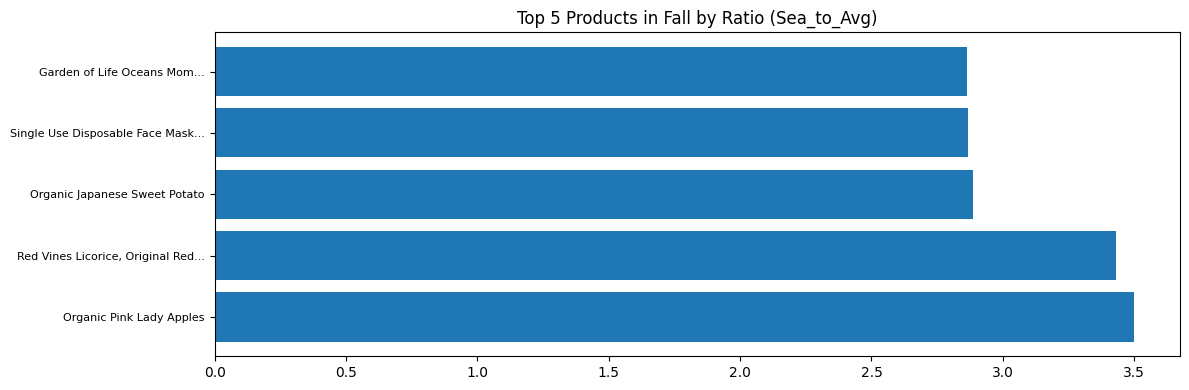

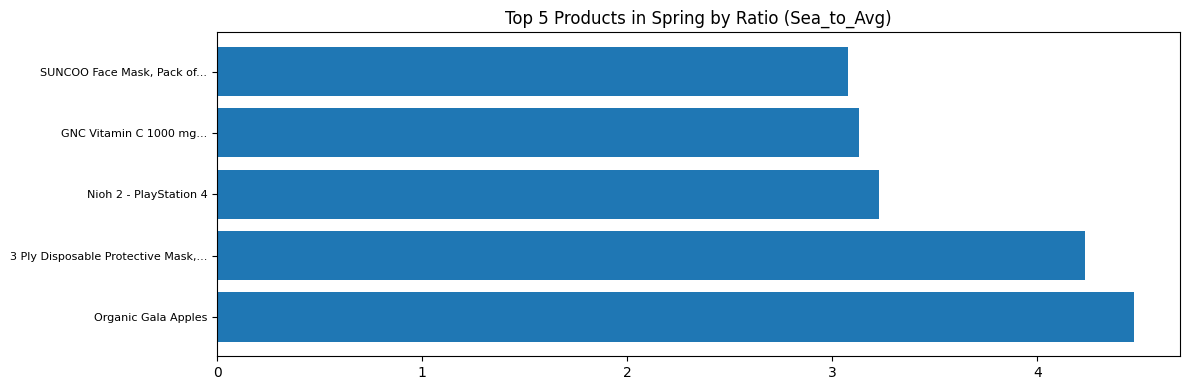

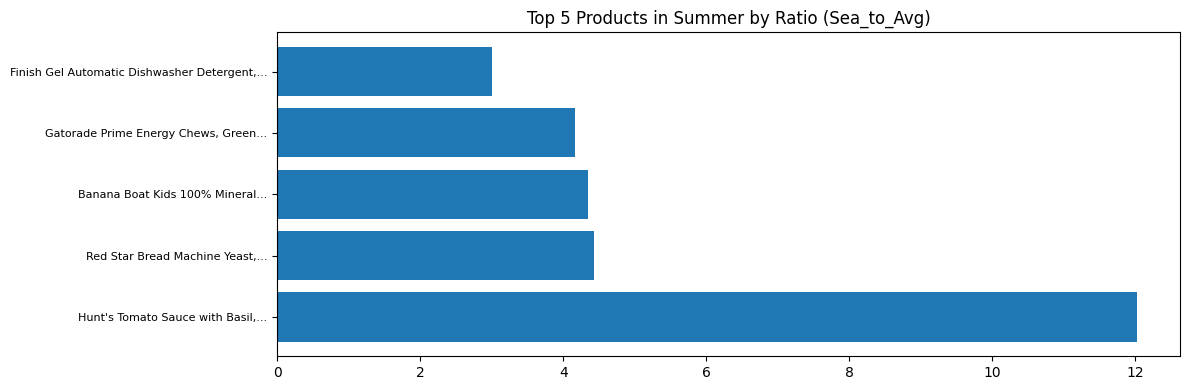

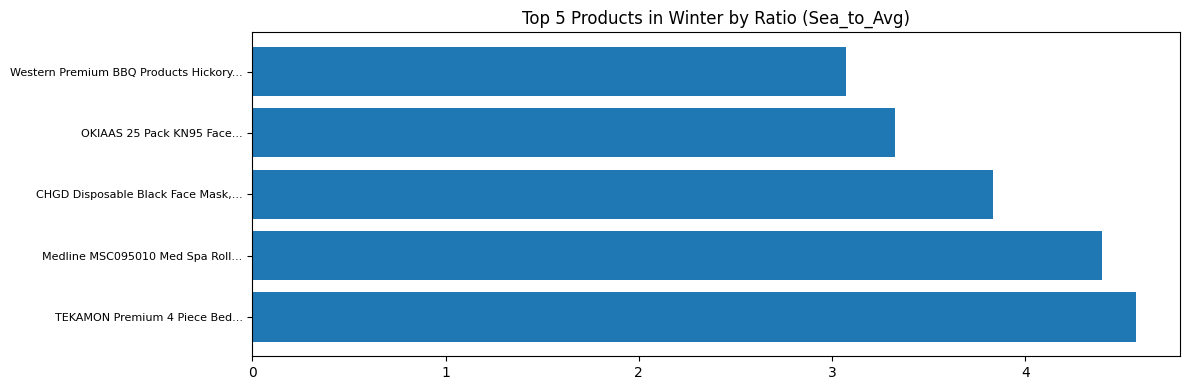

In [ ]:
set_bars = 5 # If you happen to take more products above and they have the same name, you need to adjust this as well
for season in season_cols:
  y = np.arange(set_bars)

  top_5_by_ratio = top_by_ratio[top_by_ratio['Season'] == season].copy()

  top_5_by_ratio['ShortTitle'] = top_5_by_ratio['Title'].apply(lambda t: truncate_title(t, n_words=5))

  fig, ax = plt.subplots(ncols=1, figsize=(12,4))
  ax.barh(y, top_5_by_ratio['Sea_to_Avg'], height=0.8)
  ax.set_yticks(y)
  ax.set_yticklabels(top_5_by_ratio['ShortTitle'], fontsize=8)
  ax.set_title(f"Top 5 Products in {season} by Ratio (Sea_to_Avg)")

  fig.tight_layout()
  plt.show()

In [ ]:
def demographic_breakdown_ratio(df, title_map, top5_ratio, demographic=None) -> typ.Tuple[pd.DataFrame, pd.DataFrame]:
  demographic_column_label = get_column_label_for_demographic(demographic)
  ratio_by_szn = {}

  for season in season_cols:
    print(f"\n---- {season} Demographic Breakdown ----\n")
    top_asins_ratio = top5_ratio[top5_ratio['Season']==season]['ASIN/ISBN (Product Code)']
    df_season_ratio = df[(df['Season']==season) & df['ASIN/ISBN (Product Code)'].isin(top_asins_ratio)].copy()

    df_season_ratio = df_season_ratio.merge(
            top5_ratio[top5_ratio['Season']==season][
                ['ASIN/ISBN (Product Code)','Sea_to_Avg']
            ],
            on='ASIN/ISBN (Product Code)',
            how='left'
        )
    d_ratio = (
          df_season_ratio
          .groupby(['ASIN/ISBN (Product Code)', demographic_column_label])['Sea_to_Avg']
          .sum()
          .unstack(fill_value=0)
      )

    d_ratio['Title'] = d_ratio.index.map(title_map)

    print(f"Ratio by {demographic}:")
    display(d_ratio)

    ratio_by_szn[season] = d_ratio

  return ratio_by_szn

col_lookup = {
      "Age Group": "Q-demos-age",
      "Income Bracket": "Q-demos-income",
      "Gender": "Q-demos-gender",
      "Sexual Orientation": "Q-sexual-orientation",
      "Education Level": "Q-demos-education",
      "State": "Q-demos-state"
}
demographic_stats = {}
for col in col_lookup:
  demographic_stats[col] = demographic_breakdown_ratio(df, title_map, top_by_ratio, demographic=col)





---- Fall Demographic Breakdown ----



Order Date  Purchase Price Per Unit  Quantity Shipping Address State  \
0       2018-12-04                     7.98       1.0                     NJ   
1       2018-12-22                    13.99       1.0                     NJ   
2       2018-12-24                     8.99       1.0                     NJ   
3       2018-12-25                    10.45       1.0                     NJ   
4       2018-12-25                    10.00       1.0                     NJ   
...            ...                      ...       ...                    ...   
1850712 2021-04-01                     6.99       1.0                     MA   
1850713 2021-04-14                    15.99       1.0                     MA   
1850714 2021-05-22                     6.99       4.0                     MA   
1850715 2021-12-01                     6.99       4.0                     MA   
1850716 2022-09-19                    19.99       1.0                    NaN   

                                                     Title  \
0        SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...   
1        Betron BS10 Earphones Wired Headphones in Ear ...   
2                                                      NaN   
3        Perfecto Stainless Steel Shaving Bowl. Durable...   
4                            Proraso Shaving Cream for Men   
...                                                    ...   
1850712  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850713  Sinland Microfiber Cleaning Cloth Dish Cloth K...   
1850714  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850715  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850716  Wild Mystic Oracle Card Deck: A 50-Card Deck a...   

        ASIN/ISBN (Product Code)              Category  Survey ResponseID  \
0                     B0143RTB1E          FLASH_MEMORY  R_01vNIayewjIIKMF   
1                     B01MA1MJ6H            HEADPHONES  R_01vNIayewjIIKMF   
2                     B078JZTFN3                   NaN  R_01vNIayewjIIKMF   
3                     B06XWF9HML         DISHWARE_BOWL  R_01vNIayewjIIKMF   
4                     B00837ZOI0         SHAVING_AGENT  R_01vNIayewjIIKMF   
...                          ...                   ...                ...   
1850712               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850713               B00QGCXPRG                 TOWEL  R_zfqnsBzlOAKibzb   
1850714               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850715               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850716               1441337652             ABIS_BOOK  R_zfqnsBzlOAKibzb   

           Q-demos-age Q-demos-hispanic  ... Q-personal-diabetes  \
0        35 - 44 years              Yes  ...                  No   
1        35 - 44 years              Yes  ...                  No   
2        35 - 44 years              Yes  ...                  No   
3        35 - 44 years              Yes  ...                  No   
4        35 - 44 years              Yes  ...                  No   
...                ...              ...  ...                 ...   
1850712  35 - 44 years               No  ...                  No   
1850713  35 - 44 years               No  ...                  No   
1850714  35 - 44 years               No  ...                  No   
1850715  35 - 44 years               No  ...                  No   
1850716  35 - 44 years               No  ...                  No   

        Q-personal-wheelchair Q-life-changes                 Q-sell-YOUR-data  \
0                          No            NaN  Yes if I get part of the profit   
1                          No            NaN  Yes if I get part of the profit   
2                          No            NaN  Yes if I get part of the profit   
3                          No            NaN  Yes if I get part of the profit   
4                          No            NaN  Yes if I get part of the profit   
...                       ...            ...                              

Ratio by Age Group:


Q-demos-age               18 - 24 years  25 - 34 years  35 - 44 years  \
ASIN/ISBN (Product Code)                                                
B0012NLMP6                      0.00000       3.430939       0.000000   
B0039LF25A                      0.00000       0.000000       2.861954   
B005KCIHTY                      0.00000       0.000000       6.998737   
B0788QSYHV                      2.88565       0.000000       0.000000   
B086T638CS                      0.00000       8.601415       0.000000   

Q-demos-age                                                           Title  
ASIN/ISBN (Product Code)                                                     
B0012NLMP6                Red Vines Licorice, Original Red Flavor, 5oz T...  
B0039LF25A                Garden of Life Oceans Mom Prenatal Fish Oil DH...  
B005KCIHTY                                         Organic Pink Lady Apples  
B0788QSYHV                                    Organic Japanese Sweet Potato  
B086T638CS                Single Use Disposable Face Mask (Pack of 50), ...


---- Spring Demographic Breakdown ----



Order Date  Purchase Price Per Unit  Quantity Shipping Address State  \
0       2018-12-04                     7.98       1.0                     NJ   
1       2018-12-22                    13.99       1.0                     NJ   
2       2018-12-24                     8.99       1.0                     NJ   
3       2018-12-25                    10.45       1.0                     NJ   
4       2018-12-25                    10.00       1.0                     NJ   
...            ...                      ...       ...                    ...   
1850712 2021-04-01                     6.99       1.0                     MA   
1850713 2021-04-14                    15.99       1.0                     MA   
1850714 2021-05-22                     6.99       4.0                     MA   
1850715 2021-12-01                     6.99       4.0                     MA   
1850716 2022-09-19                    19.99       1.0                    NaN   

                                                     Title  \
0        SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...   
1        Betron BS10 Earphones Wired Headphones in Ear ...   
2                                                      NaN   
3        Perfecto Stainless Steel Shaving Bowl. Durable...   
4                            Proraso Shaving Cream for Men   
...                                                    ...   
1850712  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850713  Sinland Microfiber Cleaning Cloth Dish Cloth K...   
1850714  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850715  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850716  Wild Mystic Oracle Card Deck: A 50-Card Deck a...   

        ASIN/ISBN (Product Code)              Category  Survey ResponseID  \
0                     B0143RTB1E          FLASH_MEMORY  R_01vNIayewjIIKMF   
1                     B01MA1MJ6H            HEADPHONES  R_01vNIayewjIIKMF   
2                     B078JZTFN3                   NaN  R_01vNIayewjIIKMF   
3                     B06XWF9HML         DISHWARE_BOWL  R_01vNIayewjIIKMF   
4                     B00837ZOI0         SHAVING_AGENT  R_01vNIayewjIIKMF   
...                          ...                   ...                ...   
1850712               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850713               B00QGCXPRG                 TOWEL  R_zfqnsBzlOAKibzb   
1850714               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850715               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850716               1441337652             ABIS_BOOK  R_zfqnsBzlOAKibzb   

           Q-demos-age Q-demos-hispanic  ... Q-personal-diabetes  \
0        35 - 44 years              Yes  ...                  No   
1        35 - 44 years              Yes  ...                  No   
2        35 - 44 years              Yes  ...                  No   
3        35 - 44 years              Yes  ...                  No   
4        35 - 44 years              Yes  ...                  No   
...                ...              ...  ...                 ...   
1850712  35 - 44 years               No  ...                  No   
1850713  35 - 44 years               No  ...                  No   
1850714  35 - 44 years               No  ...                  No   
1850715  35 - 44 years               No  ...                  No   
1850716  35 - 44 years               No  ...                  No   

        Q-personal-wheelchair Q-life-changes                 Q-sell-YOUR-data  \
0                          No            NaN  Yes if I get part of the profit   
1                          No            NaN  Yes if I get part of the profit   
2                          No            NaN  Yes if I get part of the profit   
3                          No            NaN  Yes if I get part of the profit   
4                          No            NaN  Yes if I get part of the profit   
...                       ...            ...                              

Ratio by Age Group:


Q-demos-age               25 - 34 years  35 - 44 years  45 - 54 years  \
ASIN/ISBN (Product Code)                                                
B001GIP5CI                     0.000000       4.471789       0.000000   
B07DK2P8P7                     3.228778       0.000000       0.000000   
B084Z5QW9C                     0.000000       0.000000       0.000000   
B0868YY9MW                     0.000000       0.000000       3.078842   
B086Y1S8C8                     4.230955       0.000000       0.000000   

Q-demos-age               65 and older  \
ASIN/ISBN (Product Code)                 
B001GIP5CI                    0.000000   
B07DK2P8P7                    0.000000   
B084Z5QW9C                    3.128326   
B0868YY9MW                    0.000000   
B086Y1S8C8                    0.000000   

Q-demos-age                                                           Title  
ASIN/ISBN (Product Code)                                                     
B001GIP5CI                                              Organic Gala Apples  
B07DK2P8P7                                           Nioh 2 - PlayStation 4  
B084Z5QW9C                GNC Vitamin C 1000 mg | Provides Immune Suppor...  
B0868YY9MW                SUNCOO Face Mask, Pack of 50 - Disposable Face...  
B086Y1S8C8                3 Ply Disposable Protective Mask, 50 Masks in ...


---- Summer Demographic Breakdown ----



Order Date  Purchase Price Per Unit  Quantity Shipping Address State  \
0       2018-12-04                     7.98       1.0                     NJ   
1       2018-12-22                    13.99       1.0                     NJ   
2       2018-12-24                     8.99       1.0                     NJ   
3       2018-12-25                    10.45       1.0                     NJ   
4       2018-12-25                    10.00       1.0                     NJ   
...            ...                      ...       ...                    ...   
1850712 2021-04-01                     6.99       1.0                     MA   
1850713 2021-04-14                    15.99       1.0                     MA   
1850714 2021-05-22                     6.99       4.0                     MA   
1850715 2021-12-01                     6.99       4.0                     MA   
1850716 2022-09-19                    19.99       1.0                    NaN   

                                                     Title  \
0        SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...   
1        Betron BS10 Earphones Wired Headphones in Ear ...   
2                                                      NaN   
3        Perfecto Stainless Steel Shaving Bowl. Durable...   
4                            Proraso Shaving Cream for Men   
...                                                    ...   
1850712  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850713  Sinland Microfiber Cleaning Cloth Dish Cloth K...   
1850714  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850715  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850716  Wild Mystic Oracle Card Deck: A 50-Card Deck a...   

        ASIN/ISBN (Product Code)              Category  Survey ResponseID  \
0                     B0143RTB1E          FLASH_MEMORY  R_01vNIayewjIIKMF   
1                     B01MA1MJ6H            HEADPHONES  R_01vNIayewjIIKMF   
2                     B078JZTFN3                   NaN  R_01vNIayewjIIKMF   
3                     B06XWF9HML         DISHWARE_BOWL  R_01vNIayewjIIKMF   
4                     B00837ZOI0         SHAVING_AGENT  R_01vNIayewjIIKMF   
...                          ...                   ...                ...   
1850712               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850713               B00QGCXPRG                 TOWEL  R_zfqnsBzlOAKibzb   
1850714               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850715               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850716               1441337652             ABIS_BOOK  R_zfqnsBzlOAKibzb   

           Q-demos-age Q-demos-hispanic  ... Q-personal-diabetes  \
0        35 - 44 years              Yes  ...                  No   
1        35 - 44 years              Yes  ...                  No   
2        35 - 44 years              Yes  ...                  No   
3        35 - 44 years              Yes  ...                  No   
4        35 - 44 years              Yes  ...                  No   
...                ...              ...  ...                 ...   
1850712  35 - 44 years               No  ...                  No   
1850713  35 - 44 years               No  ...                  No   
1850714  35 - 44 years               No  ...                  No   
1850715  35 - 44 years               No  ...                  No   
1850716  35 - 44 years               No  ...                  No   

        Q-personal-wheelchair Q-life-changes                 Q-sell-YOUR-data  \
0                          No            NaN  Yes if I get part of the profit   
1                          No            NaN  Yes if I get part of the profit   
2                          No            NaN  Yes if I get part of the profit   
3                          No            NaN  Yes if I get part of the profit   
4                          No            NaN  Yes if I get part of the profit   
...                       ...            ...                              

Ratio by Age Group:


Q-demos-age               35 - 44 years  45 - 54 years  \
ASIN/ISBN (Product Code)                                 
B000V9OVLO                     0.000000      12.022938   
B000VDX2IS                     3.010050       0.000000   
B002CIP40E                     0.000000       4.425434   
B00UA9G69U                     4.166319       0.000000   
B077HRZXVK                     4.338898       0.000000   

Q-demos-age                                                           Title  
ASIN/ISBN (Product Code)                                                     
B000V9OVLO                Hunt's Tomato Sauce with Basil, Garlic, and Or...  
B000VDX2IS                Finish Gel Automatic Dishwasher Detergent, Lem...  
B002CIP40E                               Red Star Bread Machine Yeast, 4 oz  
B00UA9G69U                Gatorade Prime Energy Chews, Green Apple - 1 O...  
B077HRZXVK                Banana Boat Kids 100% Mineral Sunscreen Lotion...


---- Winter Demographic Breakdown ----



Order Date  Purchase Price Per Unit  Quantity Shipping Address State  \
0       2018-12-04                     7.98       1.0                     NJ   
1       2018-12-22                    13.99       1.0                     NJ   
2       2018-12-24                     8.99       1.0                     NJ   
3       2018-12-25                    10.45       1.0                     NJ   
4       2018-12-25                    10.00       1.0                     NJ   
...            ...                      ...       ...                    ...   
1850712 2021-04-01                     6.99       1.0                     MA   
1850713 2021-04-14                    15.99       1.0                     MA   
1850714 2021-05-22                     6.99       4.0                     MA   
1850715 2021-12-01                     6.99       4.0                     MA   
1850716 2022-09-19                    19.99       1.0                    NaN   

                                                     Title  \
0        SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...   
1        Betron BS10 Earphones Wired Headphones in Ear ...   
2                                                      NaN   
3        Perfecto Stainless Steel Shaving Bowl. Durable...   
4                            Proraso Shaving Cream for Men   
...                                                    ...   
1850712  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850713  Sinland Microfiber Cleaning Cloth Dish Cloth K...   
1850714  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850715  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850716  Wild Mystic Oracle Card Deck: A 50-Card Deck a...   

        ASIN/ISBN (Product Code)              Category  Survey ResponseID  \
0                     B0143RTB1E          FLASH_MEMORY  R_01vNIayewjIIKMF   
1                     B01MA1MJ6H            HEADPHONES  R_01vNIayewjIIKMF   
2                     B078JZTFN3                   NaN  R_01vNIayewjIIKMF   
3                     B06XWF9HML         DISHWARE_BOWL  R_01vNIayewjIIKMF   
4                     B00837ZOI0         SHAVING_AGENT  R_01vNIayewjIIKMF   
...                          ...                   ...                ...   
1850712               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850713               B00QGCXPRG                 TOWEL  R_zfqnsBzlOAKibzb   
1850714               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850715               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850716               1441337652             ABIS_BOOK  R_zfqnsBzlOAKibzb   

           Q-demos-age Q-demos-hispanic  ... Q-personal-diabetes  \
0        35 - 44 years              Yes  ...                  No   
1        35 - 44 years              Yes  ...                  No   
2        35 - 44 years              Yes  ...                  No   
3        35 - 44 years              Yes  ...                  No   
4        35 - 44 years              Yes  ...                  No   
...                ...              ...  ...                 ...   
1850712  35 - 44 years               No  ...                  No   
1850713  35 - 44 years               No  ...                  No   
1850714  35 - 44 years               No  ...                  No   
1850715  35 - 44 years               No  ...                  No   
1850716  35 - 44 years               No  ...                  No   

        Q-personal-wheelchair Q-life-changes                 Q-sell-YOUR-data  \
0                          No            NaN  Yes if I get part of the profit   
1                          No            NaN  Yes if I get part of the profit   
2                          No            NaN  Yes if I get part of the profit   
3                          No            NaN  Yes if I get part of the profit   
4                          No            NaN  Yes if I get part of the profit   
...                       ...            ...                              

Ratio by Age Group:


Q-demos-age               18 - 24 years  25 - 34 years  35 - 44 years  \
ASIN/ISBN (Product Code)                                                
B000K6L198                     0.000000       0.000000       4.396419   
B006OD885G                     0.000000       3.073254       0.000000   
B075JGN2HQ                     0.000000       0.000000       4.572368   
B08TVHLZPX                     3.324332       3.324332       6.648663   
B09JL6Y89Q                     0.000000       3.835091       0.000000   

Q-demos-age                                                           Title  
ASIN/ISBN (Product Code)                                                     
B000K6L198                Medline MSC095010 Med Spa Roll On Antiperspira...  
B006OD885G                Western Premium BBQ Products Hickory BBQ Smoki...  
B075JGN2HQ                TEKAMON Premium 4 Piece Bed Sheet Set 1800 Thr...  
B08TVHLZPX                OKIAAS 25 Pack KN95 Face Mask, 5-Layer masks d...  
B09JL6Y89Q                CHGD Disposable Black Face Mask, 5 Layer 3D Cu...


---- Fall Demographic Breakdown ----



Order Date  Purchase Price Per Unit  Quantity Shipping Address State  \
0       2018-12-04                     7.98       1.0                     NJ   
1       2018-12-22                    13.99       1.0                     NJ   
2       2018-12-24                     8.99       1.0                     NJ   
3       2018-12-25                    10.45       1.0                     NJ   
4       2018-12-25                    10.00       1.0                     NJ   
...            ...                      ...       ...                    ...   
1850712 2021-04-01                     6.99       1.0                     MA   
1850713 2021-04-14                    15.99       1.0                     MA   
1850714 2021-05-22                     6.99       4.0                     MA   
1850715 2021-12-01                     6.99       4.0                     MA   
1850716 2022-09-19                    19.99       1.0                    NaN   

                                                     Title  \
0        SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...   
1        Betron BS10 Earphones Wired Headphones in Ear ...   
2                                                      NaN   
3        Perfecto Stainless Steel Shaving Bowl. Durable...   
4                            Proraso Shaving Cream for Men   
...                                                    ...   
1850712  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850713  Sinland Microfiber Cleaning Cloth Dish Cloth K...   
1850714  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850715  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850716  Wild Mystic Oracle Card Deck: A 50-Card Deck a...   

        ASIN/ISBN (Product Code)              Category  Survey ResponseID  \
0                     B0143RTB1E          FLASH_MEMORY  R_01vNIayewjIIKMF   
1                     B01MA1MJ6H            HEADPHONES  R_01vNIayewjIIKMF   
2                     B078JZTFN3                   NaN  R_01vNIayewjIIKMF   
3                     B06XWF9HML         DISHWARE_BOWL  R_01vNIayewjIIKMF   
4                     B00837ZOI0         SHAVING_AGENT  R_01vNIayewjIIKMF   
...                          ...                   ...                ...   
1850712               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850713               B00QGCXPRG                 TOWEL  R_zfqnsBzlOAKibzb   
1850714               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850715               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850716               1441337652             ABIS_BOOK  R_zfqnsBzlOAKibzb   

           Q-demos-age Q-demos-hispanic  ... Q-personal-diabetes  \
0        35 - 44 years              Yes  ...                  No   
1        35 - 44 years              Yes  ...                  No   
2        35 - 44 years              Yes  ...                  No   
3        35 - 44 years              Yes  ...                  No   
4        35 - 44 years              Yes  ...                  No   
...                ...              ...  ...                 ...   
1850712  35 - 44 years               No  ...                  No   
1850713  35 - 44 years               No  ...                  No   
1850714  35 - 44 years               No  ...                  No   
1850715  35 - 44 years               No  ...                  No   
1850716  35 - 44 years               No  ...                  No   

        Q-personal-wheelchair Q-life-changes                 Q-sell-YOUR-data  \
0                          No            NaN  Yes if I get part of the profit   
1                          No            NaN  Yes if I get part of the profit   
2                          No            NaN  Yes if I get part of the profit   
3                          No            NaN  Yes if I get part of the profit   
4                          No            NaN  Yes if I get part of the profit   
...                       ...            ...                              

Ratio by Income Bracket:


Q-demos-income            $100,000 - $149,999  $25,000 - $49,999  \
ASIN/ISBN (Product Code)                                           
B0012NLMP6                           3.430939           0.000000   
B0039LF25A                           0.000000           0.000000   
B005KCIHTY                           0.000000           0.000000   
B0788QSYHV                           0.000000           0.000000   
B086T638CS                           0.000000           5.734277   

Q-demos-income            $50,000 - $74,999  $75,000 - $99,999  \
ASIN/ISBN (Product Code)                                         
B0012NLMP6                         0.000000           0.000000   
B0039LF25A                         0.000000           2.861954   
B005KCIHTY                         0.000000           6.998737   
B0788QSYHV                         0.000000           2.885650   
B086T638CS                         2.867138           0.000000   

Q-demos-income                                                        Title  
ASIN/ISBN (Product Code)                                                     
B0012NLMP6                Red Vines Licorice, Original Red Flavor, 5oz T...  
B0039LF25A                Garden of Life Oceans Mom Prenatal Fish Oil DH...  
B005KCIHTY                                         Organic Pink Lady Apples  
B0788QSYHV                                    Organic Japanese Sweet Potato  
B086T638CS                Single Use Disposable Face Mask (Pack of 50), ...


---- Spring Demographic Breakdown ----



Order Date  Purchase Price Per Unit  Quantity Shipping Address State  \
0       2018-12-04                     7.98       1.0                     NJ   
1       2018-12-22                    13.99       1.0                     NJ   
2       2018-12-24                     8.99       1.0                     NJ   
3       2018-12-25                    10.45       1.0                     NJ   
4       2018-12-25                    10.00       1.0                     NJ   
...            ...                      ...       ...                    ...   
1850712 2021-04-01                     6.99       1.0                     MA   
1850713 2021-04-14                    15.99       1.0                     MA   
1850714 2021-05-22                     6.99       4.0                     MA   
1850715 2021-12-01                     6.99       4.0                     MA   
1850716 2022-09-19                    19.99       1.0                    NaN   

                                                     Title  \
0        SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...   
1        Betron BS10 Earphones Wired Headphones in Ear ...   
2                                                      NaN   
3        Perfecto Stainless Steel Shaving Bowl. Durable...   
4                            Proraso Shaving Cream for Men   
...                                                    ...   
1850712  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850713  Sinland Microfiber Cleaning Cloth Dish Cloth K...   
1850714  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850715  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850716  Wild Mystic Oracle Card Deck: A 50-Card Deck a...   

        ASIN/ISBN (Product Code)              Category  Survey ResponseID  \
0                     B0143RTB1E          FLASH_MEMORY  R_01vNIayewjIIKMF   
1                     B01MA1MJ6H            HEADPHONES  R_01vNIayewjIIKMF   
2                     B078JZTFN3                   NaN  R_01vNIayewjIIKMF   
3                     B06XWF9HML         DISHWARE_BOWL  R_01vNIayewjIIKMF   
4                     B00837ZOI0         SHAVING_AGENT  R_01vNIayewjIIKMF   
...                          ...                   ...                ...   
1850712               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850713               B00QGCXPRG                 TOWEL  R_zfqnsBzlOAKibzb   
1850714               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850715               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850716               1441337652             ABIS_BOOK  R_zfqnsBzlOAKibzb   

           Q-demos-age Q-demos-hispanic  ... Q-personal-diabetes  \
0        35 - 44 years              Yes  ...                  No   
1        35 - 44 years              Yes  ...                  No   
2        35 - 44 years              Yes  ...                  No   
3        35 - 44 years              Yes  ...                  No   
4        35 - 44 years              Yes  ...                  No   
...                ...              ...  ...                 ...   
1850712  35 - 44 years               No  ...                  No   
1850713  35 - 44 years               No  ...                  No   
1850714  35 - 44 years               No  ...                  No   
1850715  35 - 44 years               No  ...                  No   
1850716  35 - 44 years               No  ...                  No   

        Q-personal-wheelchair Q-life-changes                 Q-sell-YOUR-data  \
0                          No            NaN  Yes if I get part of the profit   
1                          No            NaN  Yes if I get part of the profit   
2                          No            NaN  Yes if I get part of the profit   
3                          No            NaN  Yes if I get part of the profit   
4                          No            NaN  Yes if I get part of the profit   
...                       ...            ...                              

Ratio by Income Bracket:


Q-demos-income            $100,000 - $149,999  $150,000 or more  \
ASIN/ISBN (Product Code)                                          
B001GIP5CI                           0.000000          4.471789   
B07DK2P8P7                           0.000000          0.000000   
B084Z5QW9C                           0.000000          0.000000   
B0868YY9MW                           0.000000          0.000000   
B086Y1S8C8                           4.230955          0.000000   

Q-demos-income            $25,000 - $49,999  $75,000 - $99,999  \
ASIN/ISBN (Product Code)                                         
B001GIP5CI                         0.000000           0.000000   
B07DK2P8P7                         0.000000           3.228778   
B084Z5QW9C                         0.000000           3.128326   
B0868YY9MW                         3.078842           0.000000   
B086Y1S8C8                         0.000000           0.000000   

Q-demos-income                                                        Title  
ASIN/ISBN (Product Code)                                                     
B001GIP5CI                                              Organic Gala Apples  
B07DK2P8P7                                           Nioh 2 - PlayStation 4  
B084Z5QW9C                GNC Vitamin C 1000 mg | Provides Immune Suppor...  
B0868YY9MW                SUNCOO Face Mask, Pack of 50 - Disposable Face...  
B086Y1S8C8                3 Ply Disposable Protective Mask, 50 Masks in ...


---- Summer Demographic Breakdown ----



Order Date  Purchase Price Per Unit  Quantity Shipping Address State  \
0       2018-12-04                     7.98       1.0                     NJ   
1       2018-12-22                    13.99       1.0                     NJ   
2       2018-12-24                     8.99       1.0                     NJ   
3       2018-12-25                    10.45       1.0                     NJ   
4       2018-12-25                    10.00       1.0                     NJ   
...            ...                      ...       ...                    ...   
1850712 2021-04-01                     6.99       1.0                     MA   
1850713 2021-04-14                    15.99       1.0                     MA   
1850714 2021-05-22                     6.99       4.0                     MA   
1850715 2021-12-01                     6.99       4.0                     MA   
1850716 2022-09-19                    19.99       1.0                    NaN   

                                                     Title  \
0        SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...   
1        Betron BS10 Earphones Wired Headphones in Ear ...   
2                                                      NaN   
3        Perfecto Stainless Steel Shaving Bowl. Durable...   
4                            Proraso Shaving Cream for Men   
...                                                    ...   
1850712  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850713  Sinland Microfiber Cleaning Cloth Dish Cloth K...   
1850714  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850715  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850716  Wild Mystic Oracle Card Deck: A 50-Card Deck a...   

        ASIN/ISBN (Product Code)              Category  Survey ResponseID  \
0                     B0143RTB1E          FLASH_MEMORY  R_01vNIayewjIIKMF   
1                     B01MA1MJ6H            HEADPHONES  R_01vNIayewjIIKMF   
2                     B078JZTFN3                   NaN  R_01vNIayewjIIKMF   
3                     B06XWF9HML         DISHWARE_BOWL  R_01vNIayewjIIKMF   
4                     B00837ZOI0         SHAVING_AGENT  R_01vNIayewjIIKMF   
...                          ...                   ...                ...   
1850712               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850713               B00QGCXPRG                 TOWEL  R_zfqnsBzlOAKibzb   
1850714               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850715               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850716               1441337652             ABIS_BOOK  R_zfqnsBzlOAKibzb   

           Q-demos-age Q-demos-hispanic  ... Q-personal-diabetes  \
0        35 - 44 years              Yes  ...                  No   
1        35 - 44 years              Yes  ...                  No   
2        35 - 44 years              Yes  ...                  No   
3        35 - 44 years              Yes  ...                  No   
4        35 - 44 years              Yes  ...                  No   
...                ...              ...  ...                 ...   
1850712  35 - 44 years               No  ...                  No   
1850713  35 - 44 years               No  ...                  No   
1850714  35 - 44 years               No  ...                  No   
1850715  35 - 44 years               No  ...                  No   
1850716  35 - 44 years               No  ...                  No   

        Q-personal-wheelchair Q-life-changes                 Q-sell-YOUR-data  \
0                          No            NaN  Yes if I get part of the profit   
1                          No            NaN  Yes if I get part of the profit   
2                          No            NaN  Yes if I get part of the profit   
3                          No            NaN  Yes if I get part of the profit   
4                          No            NaN  Yes if I get part of the profit   
...                       ...            ...                              

Ratio by Income Bracket:


Q-demos-income            $100,000 - $149,999  $25,000 - $49,999  \
ASIN/ISBN (Product Code)                                           
B000V9OVLO                          12.022938           0.000000   
B000VDX2IS                           0.000000           0.000000   
B002CIP40E                           4.425434           0.000000   
B00UA9G69U                           4.166319           0.000000   
B077HRZXVK                           0.000000           4.338898   

Q-demos-income            $75,000 - $99,999  \
ASIN/ISBN (Product Code)                      
B000V9OVLO                          0.00000   
B000VDX2IS                          3.01005   
B002CIP40E                          0.00000   
B00UA9G69U                          0.00000   
B077HRZXVK                          0.00000   

Q-demos-income                                                        Title  
ASIN/ISBN (Product Code)                                                     
B000V9OVLO                Hunt's Tomato Sauce with Basil, Garlic, and Or...  
B000VDX2IS                Finish Gel Automatic Dishwasher Detergent, Lem...  
B002CIP40E                               Red Star Bread Machine Yeast, 4 oz  
B00UA9G69U                Gatorade Prime Energy Chews, Green Apple - 1 O...  
B077HRZXVK                Banana Boat Kids 100% Mineral Sunscreen Lotion...


---- Winter Demographic Breakdown ----



Order Date  Purchase Price Per Unit  Quantity Shipping Address State  \
0       2018-12-04                     7.98       1.0                     NJ   
1       2018-12-22                    13.99       1.0                     NJ   
2       2018-12-24                     8.99       1.0                     NJ   
3       2018-12-25                    10.45       1.0                     NJ   
4       2018-12-25                    10.00       1.0                     NJ   
...            ...                      ...       ...                    ...   
1850712 2021-04-01                     6.99       1.0                     MA   
1850713 2021-04-14                    15.99       1.0                     MA   
1850714 2021-05-22                     6.99       4.0                     MA   
1850715 2021-12-01                     6.99       4.0                     MA   
1850716 2022-09-19                    19.99       1.0                    NaN   

                                                     Title  \
0        SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...   
1        Betron BS10 Earphones Wired Headphones in Ear ...   
2                                                      NaN   
3        Perfecto Stainless Steel Shaving Bowl. Durable...   
4                            Proraso Shaving Cream for Men   
...                                                    ...   
1850712  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850713  Sinland Microfiber Cleaning Cloth Dish Cloth K...   
1850714  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850715  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850716  Wild Mystic Oracle Card Deck: A 50-Card Deck a...   

        ASIN/ISBN (Product Code)              Category  Survey ResponseID  \
0                     B0143RTB1E          FLASH_MEMORY  R_01vNIayewjIIKMF   
1                     B01MA1MJ6H            HEADPHONES  R_01vNIayewjIIKMF   
2                     B078JZTFN3                   NaN  R_01vNIayewjIIKMF   
3                     B06XWF9HML         DISHWARE_BOWL  R_01vNIayewjIIKMF   
4                     B00837ZOI0         SHAVING_AGENT  R_01vNIayewjIIKMF   
...                          ...                   ...                ...   
1850712               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850713               B00QGCXPRG                 TOWEL  R_zfqnsBzlOAKibzb   
1850714               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850715               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850716               1441337652             ABIS_BOOK  R_zfqnsBzlOAKibzb   

           Q-demos-age Q-demos-hispanic  ... Q-personal-diabetes  \
0        35 - 44 years              Yes  ...                  No   
1        35 - 44 years              Yes  ...                  No   
2        35 - 44 years              Yes  ...                  No   
3        35 - 44 years              Yes  ...                  No   
4        35 - 44 years              Yes  ...                  No   
...                ...              ...  ...                 ...   
1850712  35 - 44 years               No  ...                  No   
1850713  35 - 44 years               No  ...                  No   
1850714  35 - 44 years               No  ...                  No   
1850715  35 - 44 years               No  ...                  No   
1850716  35 - 44 years               No  ...                  No   

        Q-personal-wheelchair Q-life-changes                 Q-sell-YOUR-data  \
0                          No            NaN  Yes if I get part of the profit   
1                          No            NaN  Yes if I get part of the profit   
2                          No            NaN  Yes if I get part of the profit   
3                          No            NaN  Yes if I get part of the profit   
4                          No            NaN  Yes if I get part of the profit   
...                       ...            ...                              

Ratio by Income Bracket:


Q-demos-income            $150,000 or more  $25,000 - $49,999  \
ASIN/ISBN (Product Code)                                        
B000K6L198                        4.396419           0.000000   
B006OD885G                        0.000000           0.000000   
B075JGN2HQ                        0.000000           0.000000   
B08TVHLZPX                        6.648663           6.648663   
B09JL6Y89Q                        0.000000           0.000000   

Q-demos-income            $75,000 - $99,999  Less than $25,000  \
ASIN/ISBN (Product Code)                                         
B000K6L198                         0.000000           0.000000   
B006OD885G                         3.073254           0.000000   
B075JGN2HQ                         0.000000           4.572368   
B08TVHLZPX                         0.000000           0.000000   
B09JL6Y89Q                         3.835091           0.000000   

Q-demos-income                                                        Title  
ASIN/ISBN (Product Code)                                                     
B000K6L198                Medline MSC095010 Med Spa Roll On Antiperspira...  
B006OD885G                Western Premium BBQ Products Hickory BBQ Smoki...  
B075JGN2HQ                TEKAMON Premium 4 Piece Bed Sheet Set 1800 Thr...  
B08TVHLZPX                OKIAAS 25 Pack KN95 Face Mask, 5-Layer masks d...  
B09JL6Y89Q                CHGD Disposable Black Face Mask, 5 Layer 3D Cu...


---- Fall Demographic Breakdown ----



Order Date  Purchase Price Per Unit  Quantity Shipping Address State  \
0       2018-12-04                     7.98       1.0                     NJ   
1       2018-12-22                    13.99       1.0                     NJ   
2       2018-12-24                     8.99       1.0                     NJ   
3       2018-12-25                    10.45       1.0                     NJ   
4       2018-12-25                    10.00       1.0                     NJ   
...            ...                      ...       ...                    ...   
1850712 2021-04-01                     6.99       1.0                     MA   
1850713 2021-04-14                    15.99       1.0                     MA   
1850714 2021-05-22                     6.99       4.0                     MA   
1850715 2021-12-01                     6.99       4.0                     MA   
1850716 2022-09-19                    19.99       1.0                    NaN   

                                                     Title  \
0        SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...   
1        Betron BS10 Earphones Wired Headphones in Ear ...   
2                                                      NaN   
3        Perfecto Stainless Steel Shaving Bowl. Durable...   
4                            Proraso Shaving Cream for Men   
...                                                    ...   
1850712  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850713  Sinland Microfiber Cleaning Cloth Dish Cloth K...   
1850714  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850715  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850716  Wild Mystic Oracle Card Deck: A 50-Card Deck a...   

        ASIN/ISBN (Product Code)              Category  Survey ResponseID  \
0                     B0143RTB1E          FLASH_MEMORY  R_01vNIayewjIIKMF   
1                     B01MA1MJ6H            HEADPHONES  R_01vNIayewjIIKMF   
2                     B078JZTFN3                   NaN  R_01vNIayewjIIKMF   
3                     B06XWF9HML         DISHWARE_BOWL  R_01vNIayewjIIKMF   
4                     B00837ZOI0         SHAVING_AGENT  R_01vNIayewjIIKMF   
...                          ...                   ...                ...   
1850712               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850713               B00QGCXPRG                 TOWEL  R_zfqnsBzlOAKibzb   
1850714               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850715               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850716               1441337652             ABIS_BOOK  R_zfqnsBzlOAKibzb   

           Q-demos-age Q-demos-hispanic  ... Q-personal-diabetes  \
0        35 - 44 years              Yes  ...                  No   
1        35 - 44 years              Yes  ...                  No   
2        35 - 44 years              Yes  ...                  No   
3        35 - 44 years              Yes  ...                  No   
4        35 - 44 years              Yes  ...                  No   
...                ...              ...  ...                 ...   
1850712  35 - 44 years               No  ...                  No   
1850713  35 - 44 years               No  ...                  No   
1850714  35 - 44 years               No  ...                  No   
1850715  35 - 44 years               No  ...                  No   
1850716  35 - 44 years               No  ...                  No   

        Q-personal-wheelchair Q-life-changes                 Q-sell-YOUR-data  \
0                          No            NaN  Yes if I get part of the profit   
1                          No            NaN  Yes if I get part of the profit   
2                          No            NaN  Yes if I get part of the profit   
3                          No            NaN  Yes if I get part of the profit   
4                          No            NaN  Yes if I get part of the profit   
...                       ...            ...                              

Ratio by Gender:


Q-demos-gender              Female      Male  \
ASIN/ISBN (Product Code)                       
B0012NLMP6                3.430939  0.000000   
B0039LF25A                2.861954  0.000000   
B005KCIHTY                6.998737  0.000000   
B0788QSYHV                0.000000  2.885650   
B086T638CS                2.867138  5.734277   

Q-demos-gender                                                        Title  
ASIN/ISBN (Product Code)                                                     
B0012NLMP6                Red Vines Licorice, Original Red Flavor, 5oz T...  
B0039LF25A                Garden of Life Oceans Mom Prenatal Fish Oil DH...  
B005KCIHTY                                         Organic Pink Lady Apples  
B0788QSYHV                                    Organic Japanese Sweet Potato  
B086T638CS                Single Use Disposable Face Mask (Pack of 50), ...


---- Spring Demographic Breakdown ----



Order Date  Purchase Price Per Unit  Quantity Shipping Address State  \
0       2018-12-04                     7.98       1.0                     NJ   
1       2018-12-22                    13.99       1.0                     NJ   
2       2018-12-24                     8.99       1.0                     NJ   
3       2018-12-25                    10.45       1.0                     NJ   
4       2018-12-25                    10.00       1.0                     NJ   
...            ...                      ...       ...                    ...   
1850712 2021-04-01                     6.99       1.0                     MA   
1850713 2021-04-14                    15.99       1.0                     MA   
1850714 2021-05-22                     6.99       4.0                     MA   
1850715 2021-12-01                     6.99       4.0                     MA   
1850716 2022-09-19                    19.99       1.0                    NaN   

                                                     Title  \
0        SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...   
1        Betron BS10 Earphones Wired Headphones in Ear ...   
2                                                      NaN   
3        Perfecto Stainless Steel Shaving Bowl. Durable...   
4                            Proraso Shaving Cream for Men   
...                                                    ...   
1850712  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850713  Sinland Microfiber Cleaning Cloth Dish Cloth K...   
1850714  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850715  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850716  Wild Mystic Oracle Card Deck: A 50-Card Deck a...   

        ASIN/ISBN (Product Code)              Category  Survey ResponseID  \
0                     B0143RTB1E          FLASH_MEMORY  R_01vNIayewjIIKMF   
1                     B01MA1MJ6H            HEADPHONES  R_01vNIayewjIIKMF   
2                     B078JZTFN3                   NaN  R_01vNIayewjIIKMF   
3                     B06XWF9HML         DISHWARE_BOWL  R_01vNIayewjIIKMF   
4                     B00837ZOI0         SHAVING_AGENT  R_01vNIayewjIIKMF   
...                          ...                   ...                ...   
1850712               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850713               B00QGCXPRG                 TOWEL  R_zfqnsBzlOAKibzb   
1850714               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850715               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850716               1441337652             ABIS_BOOK  R_zfqnsBzlOAKibzb   

           Q-demos-age Q-demos-hispanic  ... Q-personal-diabetes  \
0        35 - 44 years              Yes  ...                  No   
1        35 - 44 years              Yes  ...                  No   
2        35 - 44 years              Yes  ...                  No   
3        35 - 44 years              Yes  ...                  No   
4        35 - 44 years              Yes  ...                  No   
...                ...              ...  ...                 ...   
1850712  35 - 44 years               No  ...                  No   
1850713  35 - 44 years               No  ...                  No   
1850714  35 - 44 years               No  ...                  No   
1850715  35 - 44 years               No  ...                  No   
1850716  35 - 44 years               No  ...                  No   

        Q-personal-wheelchair Q-life-changes                 Q-sell-YOUR-data  \
0                          No            NaN  Yes if I get part of the profit   
1                          No            NaN  Yes if I get part of the profit   
2                          No            NaN  Yes if I get part of the profit   
3                          No            NaN  Yes if I get part of the profit   
4                          No            NaN  Yes if I get part of the profit   
...                       ...            ...                              

Ratio by Gender:


Q-demos-gender              Female      Male  \
ASIN/ISBN (Product Code)                       
B001GIP5CI                0.000000  4.471789   
B07DK2P8P7                0.000000  3.228778   
B084Z5QW9C                0.000000  3.128326   
B0868YY9MW                3.078842  0.000000   
B086Y1S8C8                0.000000  4.230955   

Q-demos-gender                                                        Title  
ASIN/ISBN (Product Code)                                                     
B001GIP5CI                                              Organic Gala Apples  
B07DK2P8P7                                           Nioh 2 - PlayStation 4  
B084Z5QW9C                GNC Vitamin C 1000 mg | Provides Immune Suppor...  
B0868YY9MW                SUNCOO Face Mask, Pack of 50 - Disposable Face...  
B086Y1S8C8                3 Ply Disposable Protective Mask, 50 Masks in ...


---- Summer Demographic Breakdown ----



Order Date  Purchase Price Per Unit  Quantity Shipping Address State  \
0       2018-12-04                     7.98       1.0                     NJ   
1       2018-12-22                    13.99       1.0                     NJ   
2       2018-12-24                     8.99       1.0                     NJ   
3       2018-12-25                    10.45       1.0                     NJ   
4       2018-12-25                    10.00       1.0                     NJ   
...            ...                      ...       ...                    ...   
1850712 2021-04-01                     6.99       1.0                     MA   
1850713 2021-04-14                    15.99       1.0                     MA   
1850714 2021-05-22                     6.99       4.0                     MA   
1850715 2021-12-01                     6.99       4.0                     MA   
1850716 2022-09-19                    19.99       1.0                    NaN   

                                                     Title  \
0        SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...   
1        Betron BS10 Earphones Wired Headphones in Ear ...   
2                                                      NaN   
3        Perfecto Stainless Steel Shaving Bowl. Durable...   
4                            Proraso Shaving Cream for Men   
...                                                    ...   
1850712  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850713  Sinland Microfiber Cleaning Cloth Dish Cloth K...   
1850714  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850715  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850716  Wild Mystic Oracle Card Deck: A 50-Card Deck a...   

        ASIN/ISBN (Product Code)              Category  Survey ResponseID  \
0                     B0143RTB1E          FLASH_MEMORY  R_01vNIayewjIIKMF   
1                     B01MA1MJ6H            HEADPHONES  R_01vNIayewjIIKMF   
2                     B078JZTFN3                   NaN  R_01vNIayewjIIKMF   
3                     B06XWF9HML         DISHWARE_BOWL  R_01vNIayewjIIKMF   
4                     B00837ZOI0         SHAVING_AGENT  R_01vNIayewjIIKMF   
...                          ...                   ...                ...   
1850712               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850713               B00QGCXPRG                 TOWEL  R_zfqnsBzlOAKibzb   
1850714               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850715               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850716               1441337652             ABIS_BOOK  R_zfqnsBzlOAKibzb   

           Q-demos-age Q-demos-hispanic  ... Q-personal-diabetes  \
0        35 - 44 years              Yes  ...                  No   
1        35 - 44 years              Yes  ...                  No   
2        35 - 44 years              Yes  ...                  No   
3        35 - 44 years              Yes  ...                  No   
4        35 - 44 years              Yes  ...                  No   
...                ...              ...  ...                 ...   
1850712  35 - 44 years               No  ...                  No   
1850713  35 - 44 years               No  ...                  No   
1850714  35 - 44 years               No  ...                  No   
1850715  35 - 44 years               No  ...                  No   
1850716  35 - 44 years               No  ...                  No   

        Q-personal-wheelchair Q-life-changes                 Q-sell-YOUR-data  \
0                          No            NaN  Yes if I get part of the profit   
1                          No            NaN  Yes if I get part of the profit   
2                          No            NaN  Yes if I get part of the profit   
3                          No            NaN  Yes if I get part of the profit   
4                          No            NaN  Yes if I get part of the profit   
...                       ...            ...                              

Ratio by Gender:


Q-demos-gender               Female      Male  \
ASIN/ISBN (Product Code)                        
B000V9OVLO                12.022938  0.000000   
B000VDX2IS                 3.010050  0.000000   
B002CIP40E                 0.000000  4.425434   
B00UA9G69U                 4.166319  0.000000   
B077HRZXVK                 0.000000  4.338898   

Q-demos-gender                                                        Title  
ASIN/ISBN (Product Code)                                                     
B000V9OVLO                Hunt's Tomato Sauce with Basil, Garlic, and Or...  
B000VDX2IS                Finish Gel Automatic Dishwasher Detergent, Lem...  
B002CIP40E                               Red Star Bread Machine Yeast, 4 oz  
B00UA9G69U                Gatorade Prime Energy Chews, Green Apple - 1 O...  
B077HRZXVK                Banana Boat Kids 100% Mineral Sunscreen Lotion...


---- Winter Demographic Breakdown ----



Order Date  Purchase Price Per Unit  Quantity Shipping Address State  \
0       2018-12-04                     7.98       1.0                     NJ   
1       2018-12-22                    13.99       1.0                     NJ   
2       2018-12-24                     8.99       1.0                     NJ   
3       2018-12-25                    10.45       1.0                     NJ   
4       2018-12-25                    10.00       1.0                     NJ   
...            ...                      ...       ...                    ...   
1850712 2021-04-01                     6.99       1.0                     MA   
1850713 2021-04-14                    15.99       1.0                     MA   
1850714 2021-05-22                     6.99       4.0                     MA   
1850715 2021-12-01                     6.99       4.0                     MA   
1850716 2022-09-19                    19.99       1.0                    NaN   

                                                     Title  \
0        SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...   
1        Betron BS10 Earphones Wired Headphones in Ear ...   
2                                                      NaN   
3        Perfecto Stainless Steel Shaving Bowl. Durable...   
4                            Proraso Shaving Cream for Men   
...                                                    ...   
1850712  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850713  Sinland Microfiber Cleaning Cloth Dish Cloth K...   
1850714  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850715  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850716  Wild Mystic Oracle Card Deck: A 50-Card Deck a...   

        ASIN/ISBN (Product Code)              Category  Survey ResponseID  \
0                     B0143RTB1E          FLASH_MEMORY  R_01vNIayewjIIKMF   
1                     B01MA1MJ6H            HEADPHONES  R_01vNIayewjIIKMF   
2                     B078JZTFN3                   NaN  R_01vNIayewjIIKMF   
3                     B06XWF9HML         DISHWARE_BOWL  R_01vNIayewjIIKMF   
4                     B00837ZOI0         SHAVING_AGENT  R_01vNIayewjIIKMF   
...                          ...                   ...                ...   
1850712               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850713               B00QGCXPRG                 TOWEL  R_zfqnsBzlOAKibzb   
1850714               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850715               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850716               1441337652             ABIS_BOOK  R_zfqnsBzlOAKibzb   

           Q-demos-age Q-demos-hispanic  ... Q-personal-diabetes  \
0        35 - 44 years              Yes  ...                  No   
1        35 - 44 years              Yes  ...                  No   
2        35 - 44 years              Yes  ...                  No   
3        35 - 44 years              Yes  ...                  No   
4        35 - 44 years              Yes  ...                  No   
...                ...              ...  ...                 ...   
1850712  35 - 44 years               No  ...                  No   
1850713  35 - 44 years               No  ...                  No   
1850714  35 - 44 years               No  ...                  No   
1850715  35 - 44 years               No  ...                  No   
1850716  35 - 44 years               No  ...                  No   

        Q-personal-wheelchair Q-life-changes                 Q-sell-YOUR-data  \
0                          No            NaN  Yes if I get part of the profit   
1                          No            NaN  Yes if I get part of the profit   
2                          No            NaN  Yes if I get part of the profit   
3                          No            NaN  Yes if I get part of the profit   
4                          No            NaN  Yes if I get part of the profit   
...                       ...            ...                              

Ratio by Gender:


Q-demos-gender              Female      Male  \
ASIN/ISBN (Product Code)                       
B000K6L198                0.000000  4.396419   
B006OD885G                0.000000  3.073254   
B075JGN2HQ                0.000000  4.572368   
B08TVHLZPX                9.972995  3.324332   
B09JL6Y89Q                3.835091  0.000000   

Q-demos-gender                                                        Title  
ASIN/ISBN (Product Code)                                                     
B000K6L198                Medline MSC095010 Med Spa Roll On Antiperspira...  
B006OD885G                Western Premium BBQ Products Hickory BBQ Smoki...  
B075JGN2HQ                TEKAMON Premium 4 Piece Bed Sheet Set 1800 Thr...  
B08TVHLZPX                OKIAAS 25 Pack KN95 Face Mask, 5-Layer masks d...  
B09JL6Y89Q                CHGD Disposable Black Face Mask, 5 Layer 3D Cu...


---- Fall Demographic Breakdown ----



Order Date  Purchase Price Per Unit  Quantity Shipping Address State  \
0       2018-12-04                     7.98       1.0                     NJ   
1       2018-12-22                    13.99       1.0                     NJ   
2       2018-12-24                     8.99       1.0                     NJ   
3       2018-12-25                    10.45       1.0                     NJ   
4       2018-12-25                    10.00       1.0                     NJ   
...            ...                      ...       ...                    ...   
1850712 2021-04-01                     6.99       1.0                     MA   
1850713 2021-04-14                    15.99       1.0                     MA   
1850714 2021-05-22                     6.99       4.0                     MA   
1850715 2021-12-01                     6.99       4.0                     MA   
1850716 2022-09-19                    19.99       1.0                    NaN   

                                                     Title  \
0        SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...   
1        Betron BS10 Earphones Wired Headphones in Ear ...   
2                                                      NaN   
3        Perfecto Stainless Steel Shaving Bowl. Durable...   
4                            Proraso Shaving Cream for Men   
...                                                    ...   
1850712  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850713  Sinland Microfiber Cleaning Cloth Dish Cloth K...   
1850714  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850715  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850716  Wild Mystic Oracle Card Deck: A 50-Card Deck a...   

        ASIN/ISBN (Product Code)              Category  Survey ResponseID  \
0                     B0143RTB1E          FLASH_MEMORY  R_01vNIayewjIIKMF   
1                     B01MA1MJ6H            HEADPHONES  R_01vNIayewjIIKMF   
2                     B078JZTFN3                   NaN  R_01vNIayewjIIKMF   
3                     B06XWF9HML         DISHWARE_BOWL  R_01vNIayewjIIKMF   
4                     B00837ZOI0         SHAVING_AGENT  R_01vNIayewjIIKMF   
...                          ...                   ...                ...   
1850712               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850713               B00QGCXPRG                 TOWEL  R_zfqnsBzlOAKibzb   
1850714               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850715               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850716               1441337652             ABIS_BOOK  R_zfqnsBzlOAKibzb   

           Q-demos-age Q-demos-hispanic  ... Q-personal-diabetes  \
0        35 - 44 years              Yes  ...                  No   
1        35 - 44 years              Yes  ...                  No   
2        35 - 44 years              Yes  ...                  No   
3        35 - 44 years              Yes  ...                  No   
4        35 - 44 years              Yes  ...                  No   
...                ...              ...  ...                 ...   
1850712  35 - 44 years               No  ...                  No   
1850713  35 - 44 years               No  ...                  No   
1850714  35 - 44 years               No  ...                  No   
1850715  35 - 44 years               No  ...                  No   
1850716  35 - 44 years               No  ...                  No   

        Q-personal-wheelchair Q-life-changes                 Q-sell-YOUR-data  \
0                          No            NaN  Yes if I get part of the profit   
1                          No            NaN  Yes if I get part of the profit   
2                          No            NaN  Yes if I get part of the profit   
3                          No            NaN  Yes if I get part of the profit   
4                          No            NaN  Yes if I get part of the profit   
...                       ...            ...                              

Ratio by Sexual Orientation:


Q-sexual-orientation        LGBTQ+  heterosexual (straight)  \
ASIN/ISBN (Product Code)                                      
B0012NLMP6                0.000000                 3.430939   
B0039LF25A                0.000000                 2.861954   
B005KCIHTY                6.998737                 0.000000   
B0788QSYHV                0.000000                 0.000000   
B086T638CS                2.867138                 5.734277   

Q-sexual-orientation      prefer not to say  \
ASIN/ISBN (Product Code)                      
B0012NLMP6                          0.00000   
B0039LF25A                          0.00000   
B005KCIHTY                          0.00000   
B0788QSYHV                          2.88565   
B086T638CS                          0.00000   

Q-sexual-orientation                                                  Title  
ASIN/ISBN (Product Code)                                                     
B0012NLMP6                Red Vines Licorice, Original Red Flavor, 5oz T...  
B0039LF25A                Garden of Life Oceans Mom Prenatal Fish Oil DH...  
B005KCIHTY                                         Organic Pink Lady Apples  
B0788QSYHV                                    Organic Japanese Sweet Potato  
B086T638CS                Single Use Disposable Face Mask (Pack of 50), ...


---- Spring Demographic Breakdown ----



Order Date  Purchase Price Per Unit  Quantity Shipping Address State  \
0       2018-12-04                     7.98       1.0                     NJ   
1       2018-12-22                    13.99       1.0                     NJ   
2       2018-12-24                     8.99       1.0                     NJ   
3       2018-12-25                    10.45       1.0                     NJ   
4       2018-12-25                    10.00       1.0                     NJ   
...            ...                      ...       ...                    ...   
1850712 2021-04-01                     6.99       1.0                     MA   
1850713 2021-04-14                    15.99       1.0                     MA   
1850714 2021-05-22                     6.99       4.0                     MA   
1850715 2021-12-01                     6.99       4.0                     MA   
1850716 2022-09-19                    19.99       1.0                    NaN   

                                                     Title  \
0        SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...   
1        Betron BS10 Earphones Wired Headphones in Ear ...   
2                                                      NaN   
3        Perfecto Stainless Steel Shaving Bowl. Durable...   
4                            Proraso Shaving Cream for Men   
...                                                    ...   
1850712  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850713  Sinland Microfiber Cleaning Cloth Dish Cloth K...   
1850714  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850715  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850716  Wild Mystic Oracle Card Deck: A 50-Card Deck a...   

        ASIN/ISBN (Product Code)              Category  Survey ResponseID  \
0                     B0143RTB1E          FLASH_MEMORY  R_01vNIayewjIIKMF   
1                     B01MA1MJ6H            HEADPHONES  R_01vNIayewjIIKMF   
2                     B078JZTFN3                   NaN  R_01vNIayewjIIKMF   
3                     B06XWF9HML         DISHWARE_BOWL  R_01vNIayewjIIKMF   
4                     B00837ZOI0         SHAVING_AGENT  R_01vNIayewjIIKMF   
...                          ...                   ...                ...   
1850712               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850713               B00QGCXPRG                 TOWEL  R_zfqnsBzlOAKibzb   
1850714               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850715               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850716               1441337652             ABIS_BOOK  R_zfqnsBzlOAKibzb   

           Q-demos-age Q-demos-hispanic  ... Q-personal-diabetes  \
0        35 - 44 years              Yes  ...                  No   
1        35 - 44 years              Yes  ...                  No   
2        35 - 44 years              Yes  ...                  No   
3        35 - 44 years              Yes  ...                  No   
4        35 - 44 years              Yes  ...                  No   
...                ...              ...  ...                 ...   
1850712  35 - 44 years               No  ...                  No   
1850713  35 - 44 years               No  ...                  No   
1850714  35 - 44 years               No  ...                  No   
1850715  35 - 44 years               No  ...                  No   
1850716  35 - 44 years               No  ...                  No   

        Q-personal-wheelchair Q-life-changes                 Q-sell-YOUR-data  \
0                          No            NaN  Yes if I get part of the profit   
1                          No            NaN  Yes if I get part of the profit   
2                          No            NaN  Yes if I get part of the profit   
3                          No            NaN  Yes if I get part of the profit   
4                          No            NaN  Yes if I get part of the profit   
...                       ...            ...                              

Ratio by Sexual Orientation:


Q-sexual-orientation        LGBTQ+  heterosexual (straight)  \
ASIN/ISBN (Product Code)                                      
B001GIP5CI                0.000000                 4.471789   
B07DK2P8P7                0.000000                 3.228778   
B084Z5QW9C                0.000000                 3.128326   
B0868YY9MW                0.000000                 3.078842   
B086Y1S8C8                4.230955                 0.000000   

Q-sexual-orientation                                                  Title  
ASIN/ISBN (Product Code)                                                     
B001GIP5CI                                              Organic Gala Apples  
B07DK2P8P7                                           Nioh 2 - PlayStation 4  
B084Z5QW9C                GNC Vitamin C 1000 mg | Provides Immune Suppor...  
B0868YY9MW                SUNCOO Face Mask, Pack of 50 - Disposable Face...  
B086Y1S8C8                3 Ply Disposable Protective Mask, 50 Masks in ...


---- Summer Demographic Breakdown ----



Order Date  Purchase Price Per Unit  Quantity Shipping Address State  \
0       2018-12-04                     7.98       1.0                     NJ   
1       2018-12-22                    13.99       1.0                     NJ   
2       2018-12-24                     8.99       1.0                     NJ   
3       2018-12-25                    10.45       1.0                     NJ   
4       2018-12-25                    10.00       1.0                     NJ   
...            ...                      ...       ...                    ...   
1850712 2021-04-01                     6.99       1.0                     MA   
1850713 2021-04-14                    15.99       1.0                     MA   
1850714 2021-05-22                     6.99       4.0                     MA   
1850715 2021-12-01                     6.99       4.0                     MA   
1850716 2022-09-19                    19.99       1.0                    NaN   

                                                     Title  \
0        SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...   
1        Betron BS10 Earphones Wired Headphones in Ear ...   
2                                                      NaN   
3        Perfecto Stainless Steel Shaving Bowl. Durable...   
4                            Proraso Shaving Cream for Men   
...                                                    ...   
1850712  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850713  Sinland Microfiber Cleaning Cloth Dish Cloth K...   
1850714  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850715  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850716  Wild Mystic Oracle Card Deck: A 50-Card Deck a...   

        ASIN/ISBN (Product Code)              Category  Survey ResponseID  \
0                     B0143RTB1E          FLASH_MEMORY  R_01vNIayewjIIKMF   
1                     B01MA1MJ6H            HEADPHONES  R_01vNIayewjIIKMF   
2                     B078JZTFN3                   NaN  R_01vNIayewjIIKMF   
3                     B06XWF9HML         DISHWARE_BOWL  R_01vNIayewjIIKMF   
4                     B00837ZOI0         SHAVING_AGENT  R_01vNIayewjIIKMF   
...                          ...                   ...                ...   
1850712               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850713               B00QGCXPRG                 TOWEL  R_zfqnsBzlOAKibzb   
1850714               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850715               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850716               1441337652             ABIS_BOOK  R_zfqnsBzlOAKibzb   

           Q-demos-age Q-demos-hispanic  ... Q-personal-diabetes  \
0        35 - 44 years              Yes  ...                  No   
1        35 - 44 years              Yes  ...                  No   
2        35 - 44 years              Yes  ...                  No   
3        35 - 44 years              Yes  ...                  No   
4        35 - 44 years              Yes  ...                  No   
...                ...              ...  ...                 ...   
1850712  35 - 44 years               No  ...                  No   
1850713  35 - 44 years               No  ...                  No   
1850714  35 - 44 years               No  ...                  No   
1850715  35 - 44 years               No  ...                  No   
1850716  35 - 44 years               No  ...                  No   

        Q-personal-wheelchair Q-life-changes                 Q-sell-YOUR-data  \
0                          No            NaN  Yes if I get part of the profit   
1                          No            NaN  Yes if I get part of the profit   
2                          No            NaN  Yes if I get part of the profit   
3                          No            NaN  Yes if I get part of the profit   
4                          No            NaN  Yes if I get part of the profit   
...                       ...            ...                              

Ratio by Sexual Orientation:


Q-sexual-orientation      heterosexual (straight)  \
ASIN/ISBN (Product Code)                            
B000V9OVLO                              12.022938   
B000VDX2IS                               3.010050   
B002CIP40E                               4.425434   
B00UA9G69U                               4.166319   
B077HRZXVK                               4.338898   

Q-sexual-orientation                                                  Title  
ASIN/ISBN (Product Code)                                                     
B000V9OVLO                Hunt's Tomato Sauce with Basil, Garlic, and Or...  
B000VDX2IS                Finish Gel Automatic Dishwasher Detergent, Lem...  
B002CIP40E                               Red Star Bread Machine Yeast, 4 oz  
B00UA9G69U                Gatorade Prime Energy Chews, Green Apple - 1 O...  
B077HRZXVK                Banana Boat Kids 100% Mineral Sunscreen Lotion...


---- Winter Demographic Breakdown ----



Order Date  Purchase Price Per Unit  Quantity Shipping Address State  \
0       2018-12-04                     7.98       1.0                     NJ   
1       2018-12-22                    13.99       1.0                     NJ   
2       2018-12-24                     8.99       1.0                     NJ   
3       2018-12-25                    10.45       1.0                     NJ   
4       2018-12-25                    10.00       1.0                     NJ   
...            ...                      ...       ...                    ...   
1850712 2021-04-01                     6.99       1.0                     MA   
1850713 2021-04-14                    15.99       1.0                     MA   
1850714 2021-05-22                     6.99       4.0                     MA   
1850715 2021-12-01                     6.99       4.0                     MA   
1850716 2022-09-19                    19.99       1.0                    NaN   

                                                     Title  \
0        SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...   
1        Betron BS10 Earphones Wired Headphones in Ear ...   
2                                                      NaN   
3        Perfecto Stainless Steel Shaving Bowl. Durable...   
4                            Proraso Shaving Cream for Men   
...                                                    ...   
1850712  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850713  Sinland Microfiber Cleaning Cloth Dish Cloth K...   
1850714  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850715  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850716  Wild Mystic Oracle Card Deck: A 50-Card Deck a...   

        ASIN/ISBN (Product Code)              Category  Survey ResponseID  \
0                     B0143RTB1E          FLASH_MEMORY  R_01vNIayewjIIKMF   
1                     B01MA1MJ6H            HEADPHONES  R_01vNIayewjIIKMF   
2                     B078JZTFN3                   NaN  R_01vNIayewjIIKMF   
3                     B06XWF9HML         DISHWARE_BOWL  R_01vNIayewjIIKMF   
4                     B00837ZOI0         SHAVING_AGENT  R_01vNIayewjIIKMF   
...                          ...                   ...                ...   
1850712               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850713               B00QGCXPRG                 TOWEL  R_zfqnsBzlOAKibzb   
1850714               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850715               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850716               1441337652             ABIS_BOOK  R_zfqnsBzlOAKibzb   

           Q-demos-age Q-demos-hispanic  ... Q-personal-diabetes  \
0        35 - 44 years              Yes  ...                  No   
1        35 - 44 years              Yes  ...                  No   
2        35 - 44 years              Yes  ...                  No   
3        35 - 44 years              Yes  ...                  No   
4        35 - 44 years              Yes  ...                  No   
...                ...              ...  ...                 ...   
1850712  35 - 44 years               No  ...                  No   
1850713  35 - 44 years               No  ...                  No   
1850714  35 - 44 years               No  ...                  No   
1850715  35 - 44 years               No  ...                  No   
1850716  35 - 44 years               No  ...                  No   

        Q-personal-wheelchair Q-life-changes                 Q-sell-YOUR-data  \
0                          No            NaN  Yes if I get part of the profit   
1                          No            NaN  Yes if I get part of the profit   
2                          No            NaN  Yes if I get part of the profit   
3                          No            NaN  Yes if I get part of the profit   
4                          No            NaN  Yes if I get part of the profit   
...                       ...            ...                              

Ratio by Sexual Orientation:


Q-sexual-orientation        LGBTQ+  heterosexual (straight)  \
ASIN/ISBN (Product Code)                                      
B000K6L198                0.000000                 4.396419   
B006OD885G                3.073254                 0.000000   
B075JGN2HQ                0.000000                 4.572368   
B08TVHLZPX                6.648663                 3.324332   
B09JL6Y89Q                0.000000                 3.835091   

Q-sexual-orientation      prefer not to say  \
ASIN/ISBN (Product Code)                      
B000K6L198                         0.000000   
B006OD885G                         0.000000   
B075JGN2HQ                         0.000000   
B08TVHLZPX                         3.324332   
B09JL6Y89Q                         0.000000   

Q-sexual-orientation                                                  Title  
ASIN/ISBN (Product Code)                                                     
B000K6L198                Medline MSC095010 Med Spa Roll On Antiperspira...  
B006OD885G                Western Premium BBQ Products Hickory BBQ Smoki...  
B075JGN2HQ                TEKAMON Premium 4 Piece Bed Sheet Set 1800 Thr...  
B08TVHLZPX                OKIAAS 25 Pack KN95 Face Mask, 5-Layer masks d...  
B09JL6Y89Q                CHGD Disposable Black Face Mask, 5 Layer 3D Cu...


---- Fall Demographic Breakdown ----



Order Date  Purchase Price Per Unit  Quantity Shipping Address State  \
0       2018-12-04                     7.98       1.0                     NJ   
1       2018-12-22                    13.99       1.0                     NJ   
2       2018-12-24                     8.99       1.0                     NJ   
3       2018-12-25                    10.45       1.0                     NJ   
4       2018-12-25                    10.00       1.0                     NJ   
...            ...                      ...       ...                    ...   
1850712 2021-04-01                     6.99       1.0                     MA   
1850713 2021-04-14                    15.99       1.0                     MA   
1850714 2021-05-22                     6.99       4.0                     MA   
1850715 2021-12-01                     6.99       4.0                     MA   
1850716 2022-09-19                    19.99       1.0                    NaN   

                                                     Title  \
0        SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...   
1        Betron BS10 Earphones Wired Headphones in Ear ...   
2                                                      NaN   
3        Perfecto Stainless Steel Shaving Bowl. Durable...   
4                            Proraso Shaving Cream for Men   
...                                                    ...   
1850712  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850713  Sinland Microfiber Cleaning Cloth Dish Cloth K...   
1850714  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850715  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850716  Wild Mystic Oracle Card Deck: A 50-Card Deck a...   

        ASIN/ISBN (Product Code)              Category  Survey ResponseID  \
0                     B0143RTB1E          FLASH_MEMORY  R_01vNIayewjIIKMF   
1                     B01MA1MJ6H            HEADPHONES  R_01vNIayewjIIKMF   
2                     B078JZTFN3                   NaN  R_01vNIayewjIIKMF   
3                     B06XWF9HML         DISHWARE_BOWL  R_01vNIayewjIIKMF   
4                     B00837ZOI0         SHAVING_AGENT  R_01vNIayewjIIKMF   
...                          ...                   ...                ...   
1850712               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850713               B00QGCXPRG                 TOWEL  R_zfqnsBzlOAKibzb   
1850714               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850715               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850716               1441337652             ABIS_BOOK  R_zfqnsBzlOAKibzb   

           Q-demos-age Q-demos-hispanic  ... Q-personal-diabetes  \
0        35 - 44 years              Yes  ...                  No   
1        35 - 44 years              Yes  ...                  No   
2        35 - 44 years              Yes  ...                  No   
3        35 - 44 years              Yes  ...                  No   
4        35 - 44 years              Yes  ...                  No   
...                ...              ...  ...                 ...   
1850712  35 - 44 years               No  ...                  No   
1850713  35 - 44 years               No  ...                  No   
1850714  35 - 44 years               No  ...                  No   
1850715  35 - 44 years               No  ...                  No   
1850716  35 - 44 years               No  ...                  No   

        Q-personal-wheelchair Q-life-changes                 Q-sell-YOUR-data  \
0                          No            NaN  Yes if I get part of the profit   
1                          No            NaN  Yes if I get part of the profit   
2                          No            NaN  Yes if I get part of the profit   
3                          No            NaN  Yes if I get part of the profit   
4                          No            NaN  Yes if I get part of the profit   
...                       ...            ...                              

Ratio by Education Level:


Q-demos-education         Bachelor's degree  \
ASIN/ISBN (Product Code)                      
B0012NLMP6                         0.000000   
B0039LF25A                         0.000000   
B005KCIHTY                         6.998737   
B0788QSYHV                         0.000000   
B086T638CS                         5.734277   

Q-demos-education         Graduate or professional degree (MA, MS, MBA, PhD, JD, MD, DDS, etc)  \
ASIN/ISBN (Product Code)                                                                         
B0012NLMP6                                                         3.430939                      
B0039LF25A                                                         0.000000                      
B005KCIHTY                                                         0.000000                      
B0788QSYHV                                                         0.000000                      
B086T638CS                                                         2.867138                      

Q-demos-education         High school diploma or GED  \
ASIN/ISBN (Product Code)                               
B0012NLMP6                                  0.000000   
B0039LF25A                                  2.861954   
B005KCIHTY                                  0.000000   
B0788QSYHV                                  2.885650   
B086T638CS                                  0.000000   

Q-demos-education                                                     Title  
ASIN/ISBN (Product Code)                                                     
B0012NLMP6                Red Vines Licorice, Original Red Flavor, 5oz T...  
B0039LF25A                Garden of Life Oceans Mom Prenatal Fish Oil DH...  
B005KCIHTY                                         Organic Pink Lady Apples  
B0788QSYHV                                    Organic Japanese Sweet Potato  
B086T638CS                Single Use Disposable Face Mask (Pack of 50), ...


---- Spring Demographic Breakdown ----



Order Date  Purchase Price Per Unit  Quantity Shipping Address State  \
0       2018-12-04                     7.98       1.0                     NJ   
1       2018-12-22                    13.99       1.0                     NJ   
2       2018-12-24                     8.99       1.0                     NJ   
3       2018-12-25                    10.45       1.0                     NJ   
4       2018-12-25                    10.00       1.0                     NJ   
...            ...                      ...       ...                    ...   
1850712 2021-04-01                     6.99       1.0                     MA   
1850713 2021-04-14                    15.99       1.0                     MA   
1850714 2021-05-22                     6.99       4.0                     MA   
1850715 2021-12-01                     6.99       4.0                     MA   
1850716 2022-09-19                    19.99       1.0                    NaN   

                                                     Title  \
0        SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...   
1        Betron BS10 Earphones Wired Headphones in Ear ...   
2                                                      NaN   
3        Perfecto Stainless Steel Shaving Bowl. Durable...   
4                            Proraso Shaving Cream for Men   
...                                                    ...   
1850712  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850713  Sinland Microfiber Cleaning Cloth Dish Cloth K...   
1850714  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850715  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850716  Wild Mystic Oracle Card Deck: A 50-Card Deck a...   

        ASIN/ISBN (Product Code)              Category  Survey ResponseID  \
0                     B0143RTB1E          FLASH_MEMORY  R_01vNIayewjIIKMF   
1                     B01MA1MJ6H            HEADPHONES  R_01vNIayewjIIKMF   
2                     B078JZTFN3                   NaN  R_01vNIayewjIIKMF   
3                     B06XWF9HML         DISHWARE_BOWL  R_01vNIayewjIIKMF   
4                     B00837ZOI0         SHAVING_AGENT  R_01vNIayewjIIKMF   
...                          ...                   ...                ...   
1850712               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850713               B00QGCXPRG                 TOWEL  R_zfqnsBzlOAKibzb   
1850714               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850715               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850716               1441337652             ABIS_BOOK  R_zfqnsBzlOAKibzb   

           Q-demos-age Q-demos-hispanic  ... Q-personal-diabetes  \
0        35 - 44 years              Yes  ...                  No   
1        35 - 44 years              Yes  ...                  No   
2        35 - 44 years              Yes  ...                  No   
3        35 - 44 years              Yes  ...                  No   
4        35 - 44 years              Yes  ...                  No   
...                ...              ...  ...                 ...   
1850712  35 - 44 years               No  ...                  No   
1850713  35 - 44 years               No  ...                  No   
1850714  35 - 44 years               No  ...                  No   
1850715  35 - 44 years               No  ...                  No   
1850716  35 - 44 years               No  ...                  No   

        Q-personal-wheelchair Q-life-changes                 Q-sell-YOUR-data  \
0                          No            NaN  Yes if I get part of the profit   
1                          No            NaN  Yes if I get part of the profit   
2                          No            NaN  Yes if I get part of the profit   
3                          No            NaN  Yes if I get part of the profit   
4                          No            NaN  Yes if I get part of the profit   
...                       ...            ...                              

Ratio by Education Level:


Q-demos-education         Bachelor's degree  \
ASIN/ISBN (Product Code)                      
B001GIP5CI                         4.471789   
B07DK2P8P7                         0.000000   
B084Z5QW9C                         0.000000   
B0868YY9MW                         3.078842   
B086Y1S8C8                         0.000000   

Q-demos-education         Graduate or professional degree (MA, MS, MBA, PhD, JD, MD, DDS, etc)  \
ASIN/ISBN (Product Code)                                                                         
B001GIP5CI                                                         0.000000                      
B07DK2P8P7                                                         0.000000                      
B084Z5QW9C                                                         3.128326                      
B0868YY9MW                                                         0.000000                      
B086Y1S8C8                                                         4.230955                      

Q-demos-education         High school diploma or GED  \
ASIN/ISBN (Product Code)                               
B001GIP5CI                                  0.000000   
B07DK2P8P7                                  3.228778   
B084Z5QW9C                                  0.000000   
B0868YY9MW                                  0.000000   
B086Y1S8C8                                  0.000000   

Q-demos-education                                                     Title  
ASIN/ISBN (Product Code)                                                     
B001GIP5CI                                              Organic Gala Apples  
B07DK2P8P7                                           Nioh 2 - PlayStation 4  
B084Z5QW9C                GNC Vitamin C 1000 mg | Provides Immune Suppor...  
B0868YY9MW                SUNCOO Face Mask, Pack of 50 - Disposable Face...  
B086Y1S8C8                3 Ply Disposable Protective Mask, 50 Masks in ...


---- Summer Demographic Breakdown ----



Order Date  Purchase Price Per Unit  Quantity Shipping Address State  \
0       2018-12-04                     7.98       1.0                     NJ   
1       2018-12-22                    13.99       1.0                     NJ   
2       2018-12-24                     8.99       1.0                     NJ   
3       2018-12-25                    10.45       1.0                     NJ   
4       2018-12-25                    10.00       1.0                     NJ   
...            ...                      ...       ...                    ...   
1850712 2021-04-01                     6.99       1.0                     MA   
1850713 2021-04-14                    15.99       1.0                     MA   
1850714 2021-05-22                     6.99       4.0                     MA   
1850715 2021-12-01                     6.99       4.0                     MA   
1850716 2022-09-19                    19.99       1.0                    NaN   

                                                     Title  \
0        SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...   
1        Betron BS10 Earphones Wired Headphones in Ear ...   
2                                                      NaN   
3        Perfecto Stainless Steel Shaving Bowl. Durable...   
4                            Proraso Shaving Cream for Men   
...                                                    ...   
1850712  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850713  Sinland Microfiber Cleaning Cloth Dish Cloth K...   
1850714  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850715  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850716  Wild Mystic Oracle Card Deck: A 50-Card Deck a...   

        ASIN/ISBN (Product Code)              Category  Survey ResponseID  \
0                     B0143RTB1E          FLASH_MEMORY  R_01vNIayewjIIKMF   
1                     B01MA1MJ6H            HEADPHONES  R_01vNIayewjIIKMF   
2                     B078JZTFN3                   NaN  R_01vNIayewjIIKMF   
3                     B06XWF9HML         DISHWARE_BOWL  R_01vNIayewjIIKMF   
4                     B00837ZOI0         SHAVING_AGENT  R_01vNIayewjIIKMF   
...                          ...                   ...                ...   
1850712               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850713               B00QGCXPRG                 TOWEL  R_zfqnsBzlOAKibzb   
1850714               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850715               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850716               1441337652             ABIS_BOOK  R_zfqnsBzlOAKibzb   

           Q-demos-age Q-demos-hispanic  ... Q-personal-diabetes  \
0        35 - 44 years              Yes  ...                  No   
1        35 - 44 years              Yes  ...                  No   
2        35 - 44 years              Yes  ...                  No   
3        35 - 44 years              Yes  ...                  No   
4        35 - 44 years              Yes  ...                  No   
...                ...              ...  ...                 ...   
1850712  35 - 44 years               No  ...                  No   
1850713  35 - 44 years               No  ...                  No   
1850714  35 - 44 years               No  ...                  No   
1850715  35 - 44 years               No  ...                  No   
1850716  35 - 44 years               No  ...                  No   

        Q-personal-wheelchair Q-life-changes                 Q-sell-YOUR-data  \
0                          No            NaN  Yes if I get part of the profit   
1                          No            NaN  Yes if I get part of the profit   
2                          No            NaN  Yes if I get part of the profit   
3                          No            NaN  Yes if I get part of the profit   
4                          No            NaN  Yes if I get part of the profit   
...                       ...            ...                              

Ratio by Education Level:


Q-demos-education         Bachelor's degree  \
ASIN/ISBN (Product Code)                      
B000V9OVLO                         0.000000   
B000VDX2IS                         0.000000   
B002CIP40E                         4.425434   
B00UA9G69U                         0.000000   
B077HRZXVK                         0.000000   

Q-demos-education         Graduate or professional degree (MA, MS, MBA, PhD, JD, MD, DDS, etc)  \
ASIN/ISBN (Product Code)                                                                         
B000V9OVLO                                                         0.000000                      
B000VDX2IS                                                         0.000000                      
B002CIP40E                                                         0.000000                      
B00UA9G69U                                                         4.166319                      
B077HRZXVK                                                         0.000000                      

Q-demos-education         High school diploma or GED  \
ASIN/ISBN (Product Code)                               
B000V9OVLO                                 12.022938   
B000VDX2IS                                  3.010050   
B002CIP40E                                  0.000000   
B00UA9G69U                                  0.000000   
B077HRZXVK                                  4.338898   

Q-demos-education                                                     Title  
ASIN/ISBN (Product Code)                                                     
B000V9OVLO                Hunt's Tomato Sauce with Basil, Garlic, and Or...  
B000VDX2IS                Finish Gel Automatic Dishwasher Detergent, Lem...  
B002CIP40E                               Red Star Bread Machine Yeast, 4 oz  
B00UA9G69U                Gatorade Prime Energy Chews, Green Apple - 1 O...  
B077HRZXVK                Banana Boat Kids 100% Mineral Sunscreen Lotion...


---- Winter Demographic Breakdown ----



Order Date  Purchase Price Per Unit  Quantity Shipping Address State  \
0       2018-12-04                     7.98       1.0                     NJ   
1       2018-12-22                    13.99       1.0                     NJ   
2       2018-12-24                     8.99       1.0                     NJ   
3       2018-12-25                    10.45       1.0                     NJ   
4       2018-12-25                    10.00       1.0                     NJ   
...            ...                      ...       ...                    ...   
1850712 2021-04-01                     6.99       1.0                     MA   
1850713 2021-04-14                    15.99       1.0                     MA   
1850714 2021-05-22                     6.99       4.0                     MA   
1850715 2021-12-01                     6.99       4.0                     MA   
1850716 2022-09-19                    19.99       1.0                    NaN   

                                                     Title  \
0        SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...   
1        Betron BS10 Earphones Wired Headphones in Ear ...   
2                                                      NaN   
3        Perfecto Stainless Steel Shaving Bowl. Durable...   
4                            Proraso Shaving Cream for Men   
...                                                    ...   
1850712  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850713  Sinland Microfiber Cleaning Cloth Dish Cloth K...   
1850714  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850715  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850716  Wild Mystic Oracle Card Deck: A 50-Card Deck a...   

        ASIN/ISBN (Product Code)              Category  Survey ResponseID  \
0                     B0143RTB1E          FLASH_MEMORY  R_01vNIayewjIIKMF   
1                     B01MA1MJ6H            HEADPHONES  R_01vNIayewjIIKMF   
2                     B078JZTFN3                   NaN  R_01vNIayewjIIKMF   
3                     B06XWF9HML         DISHWARE_BOWL  R_01vNIayewjIIKMF   
4                     B00837ZOI0         SHAVING_AGENT  R_01vNIayewjIIKMF   
...                          ...                   ...                ...   
1850712               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850713               B00QGCXPRG                 TOWEL  R_zfqnsBzlOAKibzb   
1850714               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850715               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850716               1441337652             ABIS_BOOK  R_zfqnsBzlOAKibzb   

           Q-demos-age Q-demos-hispanic  ... Q-personal-diabetes  \
0        35 - 44 years              Yes  ...                  No   
1        35 - 44 years              Yes  ...                  No   
2        35 - 44 years              Yes  ...                  No   
3        35 - 44 years              Yes  ...                  No   
4        35 - 44 years              Yes  ...                  No   
...                ...              ...  ...                 ...   
1850712  35 - 44 years               No  ...                  No   
1850713  35 - 44 years               No  ...                  No   
1850714  35 - 44 years               No  ...                  No   
1850715  35 - 44 years               No  ...                  No   
1850716  35 - 44 years               No  ...                  No   

        Q-personal-wheelchair Q-life-changes                 Q-sell-YOUR-data  \
0                          No            NaN  Yes if I get part of the profit   
1                          No            NaN  Yes if I get part of the profit   
2                          No            NaN  Yes if I get part of the profit   
3                          No            NaN  Yes if I get part of the profit   
4                          No            NaN  Yes if I get part of the profit   
...                       ...            ...                              

Ratio by Education Level:


Q-demos-education         Bachelor's degree  \
ASIN/ISBN (Product Code)                      
B000K6L198                         4.396419   
B006OD885G                         0.000000   
B075JGN2HQ                         4.572368   
B08TVHLZPX                         6.648663   
B09JL6Y89Q                         0.000000   

Q-demos-education         Graduate or professional degree (MA, MS, MBA, PhD, JD, MD, DDS, etc)  \
ASIN/ISBN (Product Code)                                                                         
B000K6L198                                                         0.000000                      
B006OD885G                                                         0.000000                      
B075JGN2HQ                                                         0.000000                      
B08TVHLZPX                                                         3.324332                      
B09JL6Y89Q                                                         0.000000                      

Q-demos-education         High school diploma or GED  \
ASIN/ISBN (Product Code)                               
B000K6L198                                  0.000000   
B006OD885G                                  3.073254   
B075JGN2HQ                                  0.000000   
B08TVHLZPX                                  3.324332   
B09JL6Y89Q                                  3.835091   

Q-demos-education                                                     Title  
ASIN/ISBN (Product Code)                                                     
B000K6L198                Medline MSC095010 Med Spa Roll On Antiperspira...  
B006OD885G                Western Premium BBQ Products Hickory BBQ Smoki...  
B075JGN2HQ                TEKAMON Premium 4 Piece Bed Sheet Set 1800 Thr...  
B08TVHLZPX                OKIAAS 25 Pack KN95 Face Mask, 5-Layer masks d...  
B09JL6Y89Q                CHGD Disposable Black Face Mask, 5 Layer 3D Cu...


---- Fall Demographic Breakdown ----



Order Date  Purchase Price Per Unit  Quantity Shipping Address State  \
0       2018-12-04                     7.98       1.0                     NJ   
1       2018-12-22                    13.99       1.0                     NJ   
2       2018-12-24                     8.99       1.0                     NJ   
3       2018-12-25                    10.45       1.0                     NJ   
4       2018-12-25                    10.00       1.0                     NJ   
...            ...                      ...       ...                    ...   
1850712 2021-04-01                     6.99       1.0                     MA   
1850713 2021-04-14                    15.99       1.0                     MA   
1850714 2021-05-22                     6.99       4.0                     MA   
1850715 2021-12-01                     6.99       4.0                     MA   
1850716 2022-09-19                    19.99       1.0                    NaN   

                                                     Title  \
0        SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...   
1        Betron BS10 Earphones Wired Headphones in Ear ...   
2                                                      NaN   
3        Perfecto Stainless Steel Shaving Bowl. Durable...   
4                            Proraso Shaving Cream for Men   
...                                                    ...   
1850712  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850713  Sinland Microfiber Cleaning Cloth Dish Cloth K...   
1850714  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850715  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850716  Wild Mystic Oracle Card Deck: A 50-Card Deck a...   

        ASIN/ISBN (Product Code)              Category  Survey ResponseID  \
0                     B0143RTB1E          FLASH_MEMORY  R_01vNIayewjIIKMF   
1                     B01MA1MJ6H            HEADPHONES  R_01vNIayewjIIKMF   
2                     B078JZTFN3                   NaN  R_01vNIayewjIIKMF   
3                     B06XWF9HML         DISHWARE_BOWL  R_01vNIayewjIIKMF   
4                     B00837ZOI0         SHAVING_AGENT  R_01vNIayewjIIKMF   
...                          ...                   ...                ...   
1850712               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850713               B00QGCXPRG                 TOWEL  R_zfqnsBzlOAKibzb   
1850714               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850715               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850716               1441337652             ABIS_BOOK  R_zfqnsBzlOAKibzb   

           Q-demos-age Q-demos-hispanic  ... Q-personal-diabetes  \
0        35 - 44 years              Yes  ...                  No   
1        35 - 44 years              Yes  ...                  No   
2        35 - 44 years              Yes  ...                  No   
3        35 - 44 years              Yes  ...                  No   
4        35 - 44 years              Yes  ...                  No   
...                ...              ...  ...                 ...   
1850712  35 - 44 years               No  ...                  No   
1850713  35 - 44 years               No  ...                  No   
1850714  35 - 44 years               No  ...                  No   
1850715  35 - 44 years               No  ...                  No   
1850716  35 - 44 years               No  ...                  No   

        Q-personal-wheelchair Q-life-changes                 Q-sell-YOUR-data  \
0                          No            NaN  Yes if I get part of the profit   
1                          No            NaN  Yes if I get part of the profit   
2                          No            NaN  Yes if I get part of the profit   
3                          No            NaN  Yes if I get part of the profit   
4                          No            NaN  Yes if I get part of the profit   
...                       ...            ...                              

Ratio by State:


Q-demos-state             California   Florida   Indiana  Massachusetts  \
ASIN/ISBN (Product Code)                                                  
B0012NLMP6                  0.000000  0.000000  0.000000        0.00000   
B0039LF25A                  0.000000  0.000000  0.000000        0.00000   
B005KCIHTY                  0.000000  0.000000  6.998737        0.00000   
B0788QSYHV                  0.000000  0.000000  0.000000        2.88565   
B086T638CS                  2.867138  2.867138  0.000000        0.00000   

Q-demos-state             New Jersey  Tennessee     Texas  \
ASIN/ISBN (Product Code)                                    
B0012NLMP6                  3.430939   0.000000  0.000000   
B0039LF25A                  0.000000   0.000000  2.861954   
B005KCIHTY                  0.000000   0.000000  0.000000   
B0788QSYHV                  0.000000   0.000000  0.000000   
B086T638CS                  0.000000   2.867138  0.000000   

Q-demos-state                                                         Title  
ASIN/ISBN (Product Code)                                                     
B0012NLMP6                Red Vines Licorice, Original Red Flavor, 5oz T...  
B0039LF25A                Garden of Life Oceans Mom Prenatal Fish Oil DH...  
B005KCIHTY                                         Organic Pink Lady Apples  
B0788QSYHV                                    Organic Japanese Sweet Potato  
B086T638CS                Single Use Disposable Face Mask (Pack of 50), ...


---- Spring Demographic Breakdown ----



Order Date  Purchase Price Per Unit  Quantity Shipping Address State  \
0       2018-12-04                     7.98       1.0                     NJ   
1       2018-12-22                    13.99       1.0                     NJ   
2       2018-12-24                     8.99       1.0                     NJ   
3       2018-12-25                    10.45       1.0                     NJ   
4       2018-12-25                    10.00       1.0                     NJ   
...            ...                      ...       ...                    ...   
1850712 2021-04-01                     6.99       1.0                     MA   
1850713 2021-04-14                    15.99       1.0                     MA   
1850714 2021-05-22                     6.99       4.0                     MA   
1850715 2021-12-01                     6.99       4.0                     MA   
1850716 2022-09-19                    19.99       1.0                    NaN   

                                                     Title  \
0        SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...   
1        Betron BS10 Earphones Wired Headphones in Ear ...   
2                                                      NaN   
3        Perfecto Stainless Steel Shaving Bowl. Durable...   
4                            Proraso Shaving Cream for Men   
...                                                    ...   
1850712  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850713  Sinland Microfiber Cleaning Cloth Dish Cloth K...   
1850714  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850715  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850716  Wild Mystic Oracle Card Deck: A 50-Card Deck a...   

        ASIN/ISBN (Product Code)              Category  Survey ResponseID  \
0                     B0143RTB1E          FLASH_MEMORY  R_01vNIayewjIIKMF   
1                     B01MA1MJ6H            HEADPHONES  R_01vNIayewjIIKMF   
2                     B078JZTFN3                   NaN  R_01vNIayewjIIKMF   
3                     B06XWF9HML         DISHWARE_BOWL  R_01vNIayewjIIKMF   
4                     B00837ZOI0         SHAVING_AGENT  R_01vNIayewjIIKMF   
...                          ...                   ...                ...   
1850712               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850713               B00QGCXPRG                 TOWEL  R_zfqnsBzlOAKibzb   
1850714               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850715               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850716               1441337652             ABIS_BOOK  R_zfqnsBzlOAKibzb   

           Q-demos-age Q-demos-hispanic  ... Q-personal-diabetes  \
0        35 - 44 years              Yes  ...                  No   
1        35 - 44 years              Yes  ...                  No   
2        35 - 44 years              Yes  ...                  No   
3        35 - 44 years              Yes  ...                  No   
4        35 - 44 years              Yes  ...                  No   
...                ...              ...  ...                 ...   
1850712  35 - 44 years               No  ...                  No   
1850713  35 - 44 years               No  ...                  No   
1850714  35 - 44 years               No  ...                  No   
1850715  35 - 44 years               No  ...                  No   
1850716  35 - 44 years               No  ...                  No   

        Q-personal-wheelchair Q-life-changes                 Q-sell-YOUR-data  \
0                          No            NaN  Yes if I get part of the profit   
1                          No            NaN  Yes if I get part of the profit   
2                          No            NaN  Yes if I get part of the profit   
3                          No            NaN  Yes if I get part of the profit   
4                          No            NaN  Yes if I get part of the profit   
...                       ...            ...                              

Ratio by State:


Q-demos-state              Arizona   Florida  Nebraska  New York  Wisconsin  \
ASIN/ISBN (Product Code)                                                      
B001GIP5CI                0.000000  0.000000  0.000000  4.471789   0.000000   
B07DK2P8P7                0.000000  3.228778  0.000000  0.000000   0.000000   
B084Z5QW9C                3.128326  0.000000  0.000000  0.000000   0.000000   
B0868YY9MW                0.000000  0.000000  3.078842  0.000000   0.000000   
B086Y1S8C8                0.000000  0.000000  0.000000  0.000000   4.230955   

Q-demos-state                                                         Title  
ASIN/ISBN (Product Code)                                                     
B001GIP5CI                                              Organic Gala Apples  
B07DK2P8P7                                           Nioh 2 - PlayStation 4  
B084Z5QW9C                GNC Vitamin C 1000 mg | Provides Immune Suppor...  
B0868YY9MW                SUNCOO Face Mask, Pack of 50 - Disposable Face...  
B086Y1S8C8                3 Ply Disposable Protective Mask, 50 Masks in ...


---- Summer Demographic Breakdown ----



Order Date  Purchase Price Per Unit  Quantity Shipping Address State  \
0       2018-12-04                     7.98       1.0                     NJ   
1       2018-12-22                    13.99       1.0                     NJ   
2       2018-12-24                     8.99       1.0                     NJ   
3       2018-12-25                    10.45       1.0                     NJ   
4       2018-12-25                    10.00       1.0                     NJ   
...            ...                      ...       ...                    ...   
1850712 2021-04-01                     6.99       1.0                     MA   
1850713 2021-04-14                    15.99       1.0                     MA   
1850714 2021-05-22                     6.99       4.0                     MA   
1850715 2021-12-01                     6.99       4.0                     MA   
1850716 2022-09-19                    19.99       1.0                    NaN   

                                                     Title  \
0        SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...   
1        Betron BS10 Earphones Wired Headphones in Ear ...   
2                                                      NaN   
3        Perfecto Stainless Steel Shaving Bowl. Durable...   
4                            Proraso Shaving Cream for Men   
...                                                    ...   
1850712  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850713  Sinland Microfiber Cleaning Cloth Dish Cloth K...   
1850714  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850715  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850716  Wild Mystic Oracle Card Deck: A 50-Card Deck a...   

        ASIN/ISBN (Product Code)              Category  Survey ResponseID  \
0                     B0143RTB1E          FLASH_MEMORY  R_01vNIayewjIIKMF   
1                     B01MA1MJ6H            HEADPHONES  R_01vNIayewjIIKMF   
2                     B078JZTFN3                   NaN  R_01vNIayewjIIKMF   
3                     B06XWF9HML         DISHWARE_BOWL  R_01vNIayewjIIKMF   
4                     B00837ZOI0         SHAVING_AGENT  R_01vNIayewjIIKMF   
...                          ...                   ...                ...   
1850712               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850713               B00QGCXPRG                 TOWEL  R_zfqnsBzlOAKibzb   
1850714               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850715               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850716               1441337652             ABIS_BOOK  R_zfqnsBzlOAKibzb   

           Q-demos-age Q-demos-hispanic  ... Q-personal-diabetes  \
0        35 - 44 years              Yes  ...                  No   
1        35 - 44 years              Yes  ...                  No   
2        35 - 44 years              Yes  ...                  No   
3        35 - 44 years              Yes  ...                  No   
4        35 - 44 years              Yes  ...                  No   
...                ...              ...  ...                 ...   
1850712  35 - 44 years               No  ...                  No   
1850713  35 - 44 years               No  ...                  No   
1850714  35 - 44 years               No  ...                  No   
1850715  35 - 44 years               No  ...                  No   
1850716  35 - 44 years               No  ...                  No   

        Q-personal-wheelchair Q-life-changes                 Q-sell-YOUR-data  \
0                          No            NaN  Yes if I get part of the profit   
1                          No            NaN  Yes if I get part of the profit   
2                          No            NaN  Yes if I get part of the profit   
3                          No            NaN  Yes if I get part of the profit   
4                          No            NaN  Yes if I get part of the profit   
...                       ...            ...                              

Ratio by State:


Q-demos-state              Florida  Illinois  Massachusetts  North Carolina  \
ASIN/ISBN (Product Code)                                                      
B000V9OVLO                0.000000  0.000000        0.00000       12.022938   
B000VDX2IS                0.000000  0.000000        3.01005        0.000000   
B002CIP40E                0.000000  0.000000        0.00000        0.000000   
B00UA9G69U                4.166319  0.000000        0.00000        0.000000   
B077HRZXVK                0.000000  4.338898        0.00000        0.000000   

Q-demos-state             Wisconsin  \
ASIN/ISBN (Product Code)              
B000V9OVLO                 0.000000   
B000VDX2IS                 0.000000   
B002CIP40E                 4.425434   
B00UA9G69U                 0.000000   
B077HRZXVK                 0.000000   

Q-demos-state                                                         Title  
ASIN/ISBN (Product Code)                                                     
B000V9OVLO                Hunt's Tomato Sauce with Basil, Garlic, and Or...  
B000VDX2IS                Finish Gel Automatic Dishwasher Detergent, Lem...  
B002CIP40E                               Red Star Bread Machine Yeast, 4 oz  
B00UA9G69U                Gatorade Prime Energy Chews, Green Apple - 1 O...  
B077HRZXVK                Banana Boat Kids 100% Mineral Sunscreen Lotion...


---- Winter Demographic Breakdown ----



Order Date  Purchase Price Per Unit  Quantity Shipping Address State  \
0       2018-12-04                     7.98       1.0                     NJ   
1       2018-12-22                    13.99       1.0                     NJ   
2       2018-12-24                     8.99       1.0                     NJ   
3       2018-12-25                    10.45       1.0                     NJ   
4       2018-12-25                    10.00       1.0                     NJ   
...            ...                      ...       ...                    ...   
1850712 2021-04-01                     6.99       1.0                     MA   
1850713 2021-04-14                    15.99       1.0                     MA   
1850714 2021-05-22                     6.99       4.0                     MA   
1850715 2021-12-01                     6.99       4.0                     MA   
1850716 2022-09-19                    19.99       1.0                    NaN   

                                                     Title  \
0        SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...   
1        Betron BS10 Earphones Wired Headphones in Ear ...   
2                                                      NaN   
3        Perfecto Stainless Steel Shaving Bowl. Durable...   
4                            Proraso Shaving Cream for Men   
...                                                    ...   
1850712  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850713  Sinland Microfiber Cleaning Cloth Dish Cloth K...   
1850714  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850715  Tanner's Tasty Paste Vanilla Bling - Anticavit...   
1850716  Wild Mystic Oracle Card Deck: A 50-Card Deck a...   

        ASIN/ISBN (Product Code)              Category  Survey ResponseID  \
0                     B0143RTB1E          FLASH_MEMORY  R_01vNIayewjIIKMF   
1                     B01MA1MJ6H            HEADPHONES  R_01vNIayewjIIKMF   
2                     B078JZTFN3                   NaN  R_01vNIayewjIIKMF   
3                     B06XWF9HML         DISHWARE_BOWL  R_01vNIayewjIIKMF   
4                     B00837ZOI0         SHAVING_AGENT  R_01vNIayewjIIKMF   
...                          ...                   ...                ...   
1850712               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850713               B00QGCXPRG                 TOWEL  R_zfqnsBzlOAKibzb   
1850714               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850715               B015ZRTHVA  TOOTH_CLEANING_AGENT  R_zfqnsBzlOAKibzb   
1850716               1441337652             ABIS_BOOK  R_zfqnsBzlOAKibzb   

           Q-demos-age Q-demos-hispanic  ... Q-personal-diabetes  \
0        35 - 44 years              Yes  ...                  No   
1        35 - 44 years              Yes  ...                  No   
2        35 - 44 years              Yes  ...                  No   
3        35 - 44 years              Yes  ...                  No   
4        35 - 44 years              Yes  ...                  No   
...                ...              ...  ...                 ...   
1850712  35 - 44 years               No  ...                  No   
1850713  35 - 44 years               No  ...                  No   
1850714  35 - 44 years               No  ...                  No   
1850715  35 - 44 years               No  ...                  No   
1850716  35 - 44 years               No  ...                  No   

        Q-personal-wheelchair Q-life-changes                 Q-sell-YOUR-data  \
0                          No            NaN  Yes if I get part of the profit   
1                          No            NaN  Yes if I get part of the profit   
2                          No            NaN  Yes if I get part of the profit   
3                          No            NaN  Yes if I get part of the profit   
4                          No            NaN  Yes if I get part of the profit   
...                       ...            ...                              

Ratio by State:


Q-demos-state             California   Florida  Maryland  New York  \
ASIN/ISBN (Product Code)                                             
B000K6L198                  4.396419  0.000000  0.000000  0.000000   
B006OD885G                  3.073254  0.000000  0.000000  0.000000   
B075JGN2HQ                  0.000000  4.572368  0.000000  0.000000   
B08TVHLZPX                  0.000000  0.000000  3.324332  3.324332   
B09JL6Y89Q                  0.000000  0.000000  3.835091  0.000000   

Q-demos-state             North Carolina  Virginia  \
ASIN/ISBN (Product Code)                             
B000K6L198                      0.000000  0.000000   
B006OD885G                      0.000000  0.000000   
B075JGN2HQ                      0.000000  0.000000   
B08TVHLZPX                      3.324332  3.324332   
B09JL6Y89Q                      0.000000  0.000000   

Q-demos-state                                                         Title  
ASIN/ISBN (Product Code)                                                     
B000K6L198                Medline MSC095010 Med Spa Roll On Antiperspira...  
B006OD885G                Western Premium BBQ Products Hickory BBQ Smoki...  
B075JGN2HQ                TEKAMON Premium 4 Piece Bed Sheet Set 1800 Thr...  
B08TVHLZPX                OKIAAS 25 Pack KN95 Face Mask, 5-Layer masks d...  
B09JL6Y89Q                CHGD Disposable Black Face Mask, 5 Layer 3D Cu...

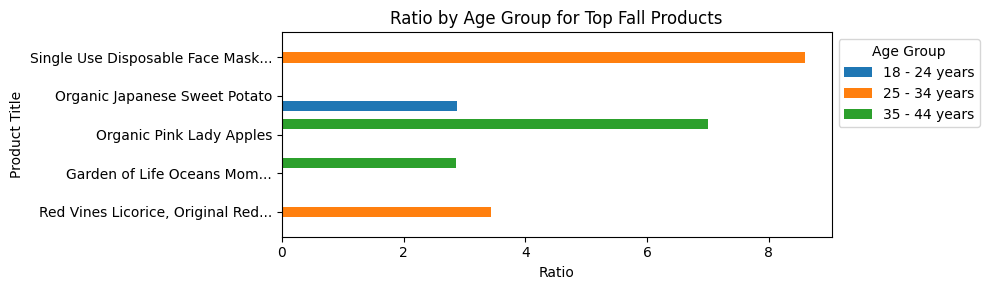

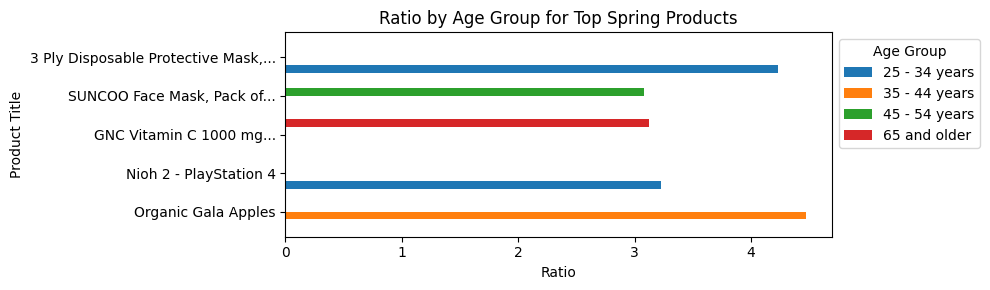

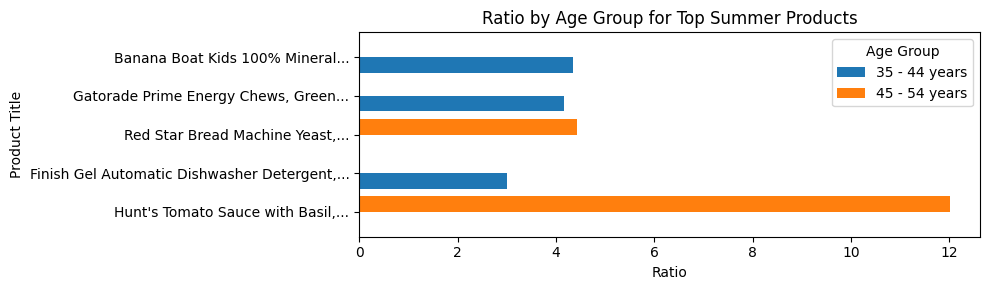

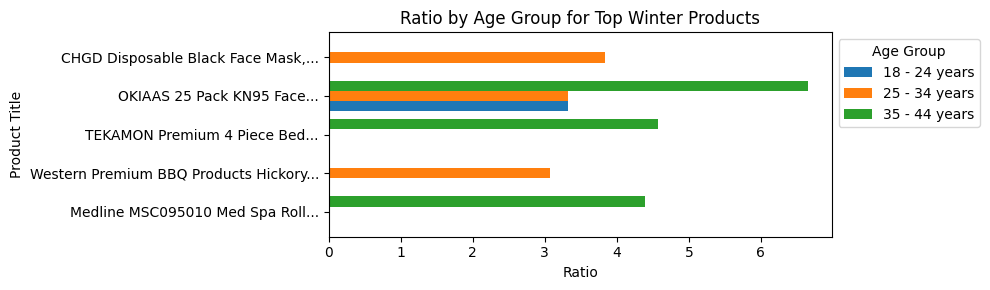

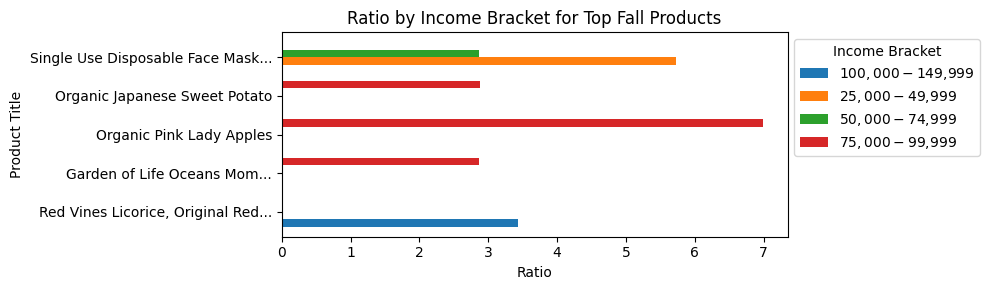

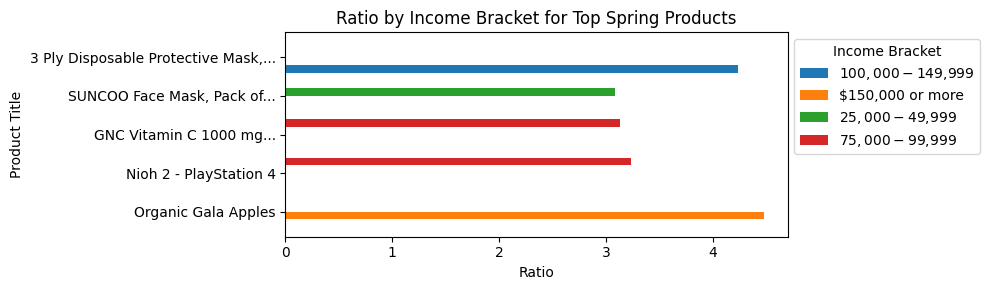

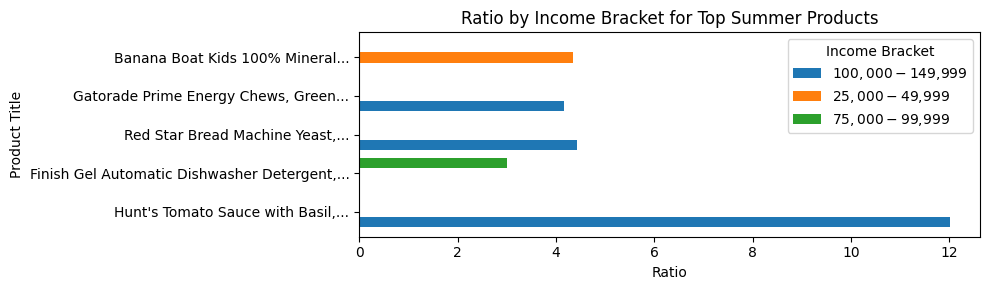

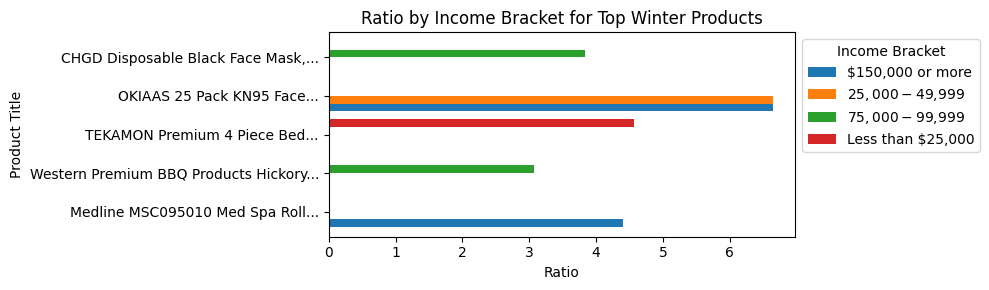

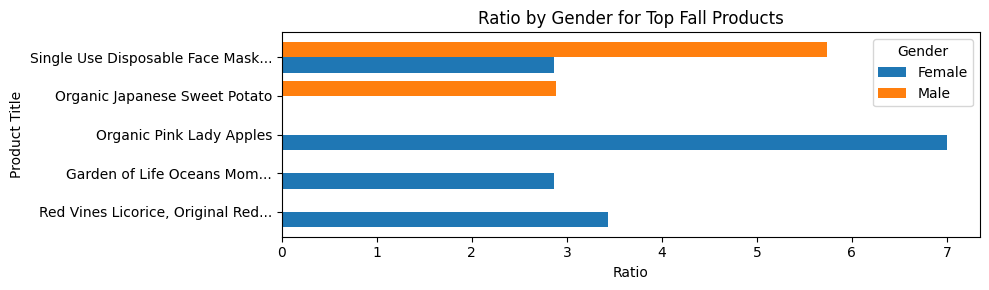

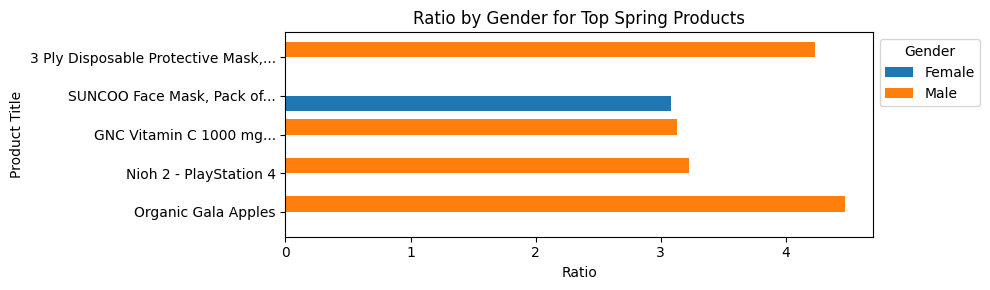

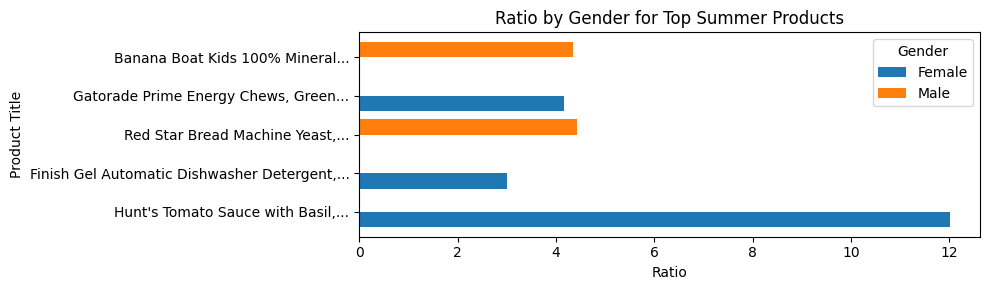

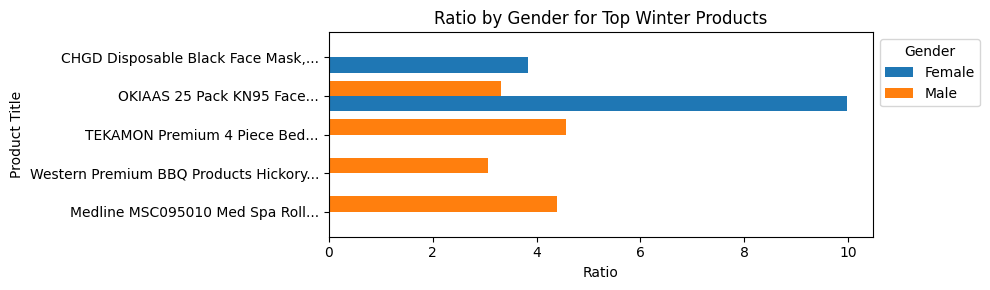

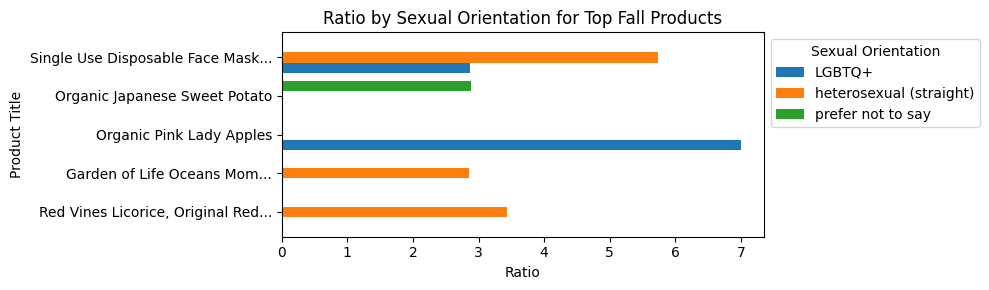

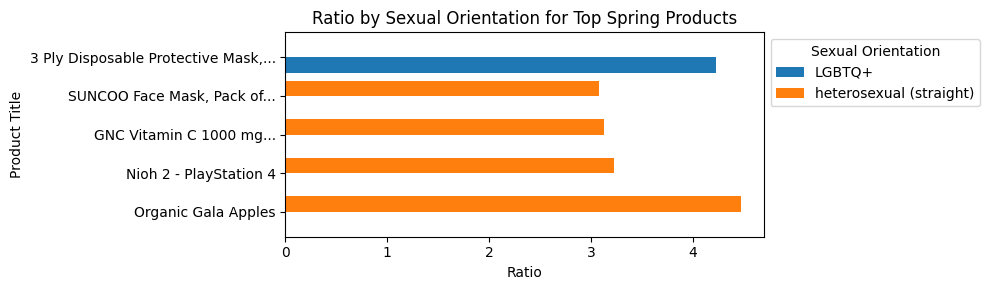

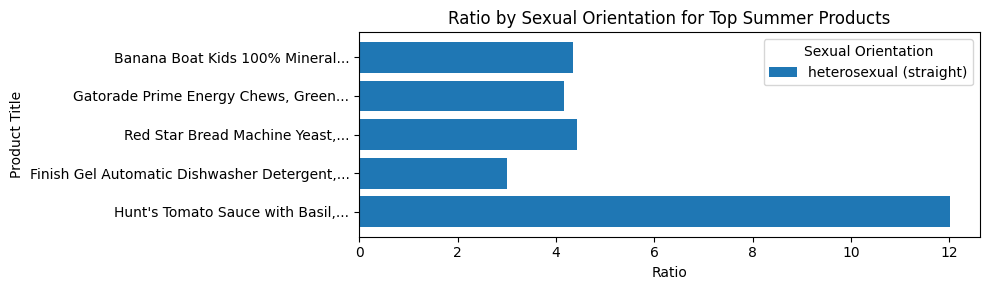

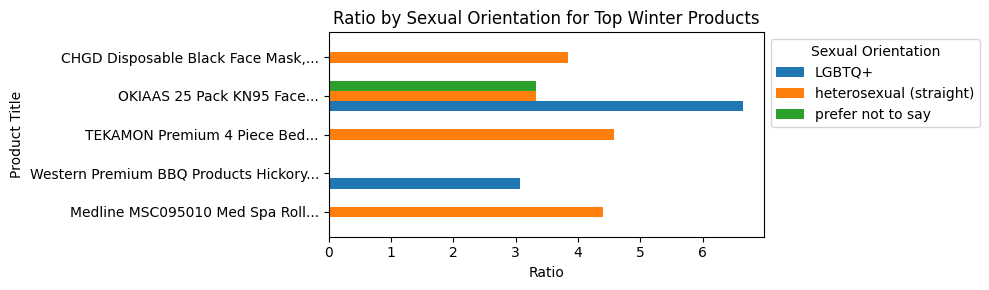

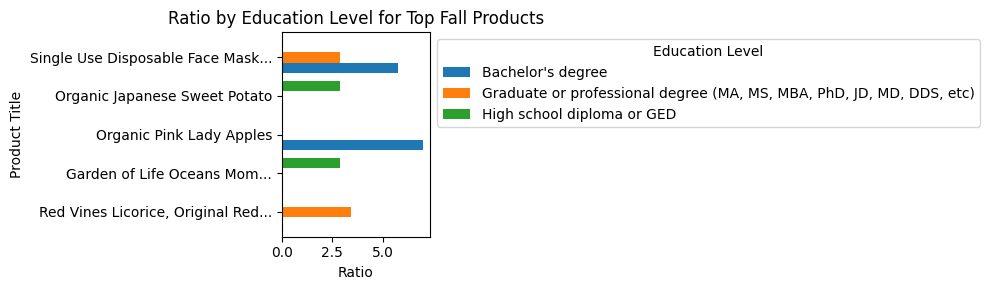

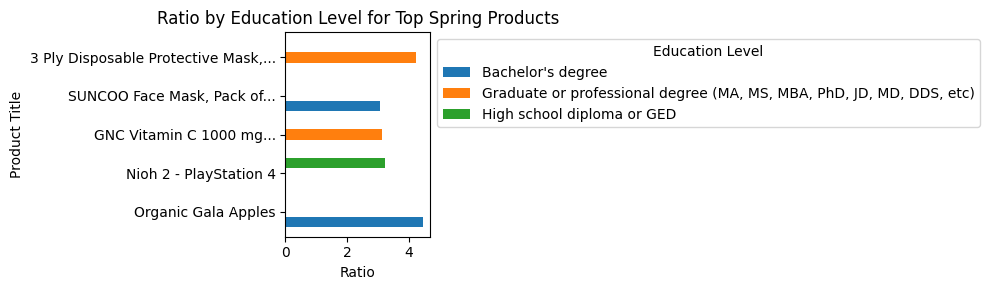

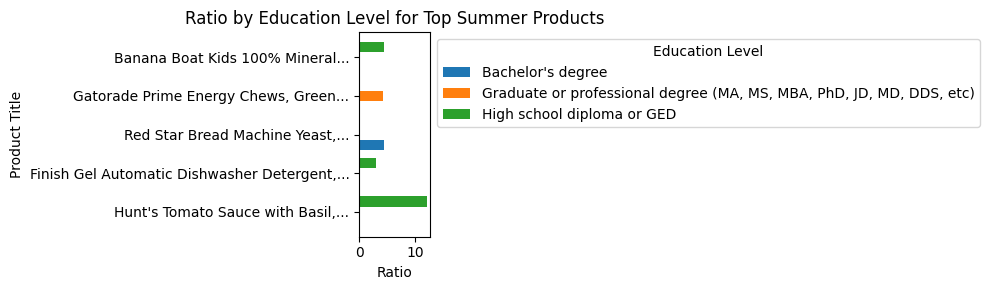

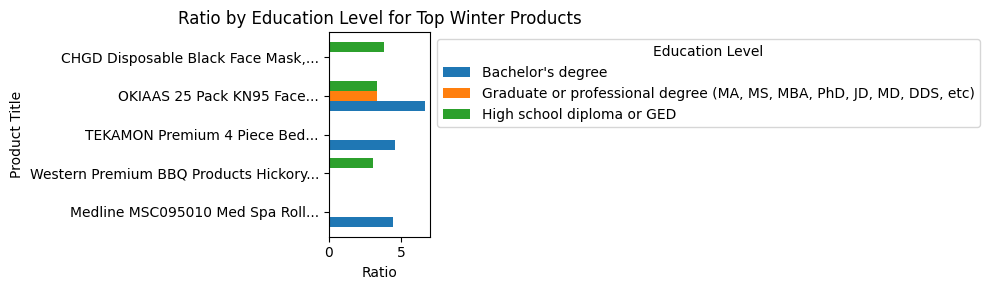

In [ ]:
for demographic, val in demographic_stats.items():
  if demographic == "State":
    continue
  for season, curated_df in val.items():
    fig, ax = plot_by_group(
    curated_df,
    value_type="Ratio",
    demographic=demographic
    )
    # override the title to include the season
    ax.set_title(f"Ratio by {demographic} for Top {season} Products")
    plt.tight_layout()
    plt.show()
